# Тестовое задание по скоринг-анализу

**Задачи:**

- Провести исследовательский анализ данных по анкетным признакам клиентов.
- Найти по анкетным признакам сегмент клиентов, у которых дефолтность за весь период менее 25% (количество клиентов в сегменте должно быть больше 1000).
- Взять, найденный в предыдущем задании, сегмент клиентов и построить по нему таблицу, в которой будет отображены дефолтность и доходность по каждой неделе.
Результат сохранить как excel-файл.


- Построить ML-модель бинарной классификации, целевым событием для которой является наступление дефолта с просрочкой в 30 дней. 

Результат оцените метрикой качества Gini.
Результат работы следует предоставить как тетрадку Jupyter Notebook с последовательно выполненными ячейками.

 

**Описание:**

Дефолтность – показатель, который характеризует какой процент клиентов ничего не заплатил до определённого дня просрочки. Для выполнения задания исследуйте дефолтность на 30-ый день просрочки.

Доходность – отношение того сколько собрали денег с клиентов к тому, сколько выдали.

Известно, что преимущественно обращаются за кредитом мужчины

 

**Описание данных:**

Вам предоставлены данные по первичным клиентам за первую половину 21-го года.

Данные представлены в трёх таблицах:

1. Anket:

- DraftId – уникальный индентификатор заявки

- formula_id – номер модели, которая скорила заявку

- flagFC – флаг наличия ответа от партнера1

- flagEF– флаг наличия ответа от партнера2

- flagCKB– флаг наличия ответа от партнера3

- Amount – сумма займа, которую выдали клиенту

- ActivityType – вид деятельности

- Education – образование

- Gender – пол

- LoanPurpose – цель займа

- MaritalStatus – семейное положение

- MonthlyIncome – ежемесячный доход клиента

- Post – занимаемая должность

 

2. Payments:

- DraftId – уникальный индентификатор заявки

- ApprovalCreateTime – время, когда заявка была подана

- ApprovalAmount – одобренная сумма займа

- RequestAmount – запрашиваемая сумма займа

- FormulaId - номер модели, которая скорила заявку

- Answer – ответ по скорингу

- LoanAmount – сумма выданного займа

- IssueDate – дата выдачи займа

- Duration – количество дней на сколько выдан займ

- RetireDate – дата погашения по договору

- RealRetireDate – реальная дата погашения

- LoanStatus – статус займа

- Balance – сумма задолженность по займу

- Payment – сумма всех выплат по займу

- DayOfDelay – количество дней просрочки по займу

- Amount00 – сумма, выплаченная клиентом до нулевого дня просрочки

- Amount15 – сумма, выплаченная клиентом между 0 и 15 днем просрочки

- Amount30 – сумма, выплаченная клиентом между 15 и 30 днем просрочки


3. Данные в таблице ML являются признаками из кредитной истории клиента, которые помогут при построении модель


https://disk.yandex.ru/d/F0ahKaDg_4P7tg

**План работы**

1. [Загрузка данных](#view)
2. [Исследовательский анализ и предобработка данных](#analiz1)
3. [Объединение данных](#combining)
4. [ Исследовательский анализ и предобработка данных объединённого датафрейма](#analiz)
5. [Подготовка данных](#preprocessing)
6. [Обучение моделей машинного обучения](#learning)
7. [ОБЩИЕ ВЫВОДЫ](#resumefinal)


## Загрузка данных<a name="view"></a>

In [1]:
#Загрузим необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.interpolate
import scipy.integrate
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import matplotlib
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.options.display.max_colwidth = 110
%config InlineBackend.figure_format = 'retina' 
matplotlib.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))
import warnings
warnings.filterwarnings('ignore')

from time import time

try:
    import phik
except:
    !pip install phik -q

    
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  (
    f1_score, 
    roc_auc_score,
    RocCurveDisplay, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    make_scorer,
    classification_report)
from phik import phik_matrix, report
from phik.report import plot_correlation_matrix
from sklearn.dummy import DummyClassifier

pd.set_option('display.float_format', '{:.2f}'.format)

### Загрузим Anket

In [2]:
anket = pd.read_csv(r"C:\Users\user\Downloads\Anket.csv", sep='\;',decimal=",",thousands=".")

In [3]:
def descr (df):
    display(df.head(5))
    print('---------------------------------------------------------------------------------------------------------')
    display(df.info()) 
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Количество пропусков:  {df.isna().sum()}')
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Описание: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(f'Размер: {df.shape}')

In [4]:
anket.head()

,Unnamed: 0,DraftId,formula_id,flagFC,flagEF,flagCKB,Amount,ActivityType,Education,Gender,LoanPurpose,MaritalStatus,MonthlyIncome,Post
0,0,3ac9e896-80a7-4d07-af43-a3b775b30739,55,1,1,0,60000,торговля,высшее,2,непредвиденные расходы,30,450000,начальник / руководитель
1,4,f76f3e80-946e-46df-9db6-795d112e63b4,54,1,1,0,60000,NaN,среднее специальное,1,непредвиденные расходы,0,370000,NaN
2,7,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,55,1,1,0,50000,другое,среднее специальное,1,подарки,0,250000,служащий / специалист
3,20,6df8c019-7172-4733-bab1-51d2400e0ec5,55,1,1,0,66000,торговля,среднее,2,другое,10,250000,рабочий
4,23,d160dd00-075b-4e5a-a106-9704d3458261,55,1,1,0,60000,промышленность,среднее специальное,1,непредвиденные расходы,30,350000,служащий / специалист


In [5]:
anket.columns = [c.lower().replace(' ','_') for c in anket.columns]
anket.columns = ['unnamed:_0', 'draft_id', 'formula_id', 'flag_fc', 'flag_ef', 'flag_ckb',
       'amount', 'activity_type', 'education', 'gender', 'loan_purpose',
       'marital_status', 'monthly_income', 'post']
anket.drop( 'unnamed:_0', axis= 1 , inplace= True )
anket.columns

Index(['draft_id', 'formula_id', 'flag_fc', 'flag_ef', 'flag_ckb', 'amount',
       'activity_type', 'education', 'gender', 'loan_purpose',
       'marital_status', 'monthly_income', 'post'],
      dtype='object')

In [6]:
descr (anket)

,draft_id,formula_id,flag_fc,flag_ef,flag_ckb,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
0,3ac9e896-80a7-4d07-af43-a3b775b30739,55,1,1,0,60000,торговля,высшее,2,непредвиденные расходы,30,450000,начальник / руководитель
1,f76f3e80-946e-46df-9db6-795d112e63b4,54,1,1,0,60000,NaN,среднее специальное,1,непредвиденные расходы,0,370000,NaN
2,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,55,1,1,0,50000,другое,среднее специальное,1,подарки,0,250000,служащий / специалист
3,6df8c019-7172-4733-bab1-51d2400e0ec5,55,1,1,0,66000,торговля,среднее,2,другое,10,250000,рабочий
4,d160dd00-075b-4e5a-a106-9704d3458261,55,1,1,0,60000,промышленность,среднее специальное,1,непредвиденные расходы,30,350000,служащий / специалист


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182007 entries, 0 to 182006
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   draft_id        182007 non-null  object
 1   formula_id      182007 non-null  int64 
 2   flag_fc         182007 non-null  int64 
 3   flag_ef         182007 non-null  int64 
 4   flag_ckb        182007 non-null  int64 
 5   amount          182007 non-null  int64 
 6   activity_type   165498 non-null  object
 7   education       181852 non-null  object
 8   gender          182007 non-null  int64 
 9   loan_purpose    181852 non-null  object
 10  marital_status  182007 non-null  int64 
 11  monthly_income  182007 non-null  int64 
 12  post            165649 non-null  object
dtypes: int64(8), object(5)
memory usage: 18.1+ MB


None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 2
---------------------------------------------------------------------------------------------------------
Количество пропусков:  draft_id              0
formula_id            0
flag_fc               0
flag_ef               0
flag_ckb              0
amount                0
activity_type     16509
education           155
gender                0
loan_purpose        155
marital_status        0
monthly_income        0
post              16358
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,formula_id,flag_fc,flag_ef,flag_ckb,amount,gender,marital_status,monthly_income
count,182007.00,182007.00,182007.00,182007.00,182007.00,182007.00,182007.00,182007.00
mean,54.32,0.93,0.99,0.00,53369.49,1.42,9.84,1144939.72
std,1.68,0.25,0.11,0.00,14990.26,0.50,12.78,215154767.99
min,30.00,0.00,0.00,0.00,20000.00,1.00,0.00,0.00
25%,54.00,1.00,1.00,0.00,46000.00,1.00,0.00,280000.00
50%,55.00,1.00,1.00,0.00,60000.00,1.00,10.00,370000.00
75%,55.00,1.00,1.00,0.00,60000.00,2.00,10.00,500000.00
max,60.00,1.00,1.00,0.00,300000.00,4.00,40.00,80000900000.00


---------------------------------------------------------------------------------------------------------
Размер: (182007, 13)


Мы загрузили датасет, переименовали столбцы по правилам PEP8, удалили неизвестную колонку.
Размер датасета: (182007, 13)

### Загрузим Payments

In [7]:
payments = pd.read_csv(r"C:\Users\user\Downloads\Payments.csv", sep='\;',decimal=",",thousands=".")

In [8]:
payments.head()

,DraftId,ApprovalCreateTime,ApprovalAmount,RequestAmount,FormulaId,Answer,LoanAmount,IssueDate,Duration,RetireDate,...,Balance,Payment,DayOfDelay,Amount00,Amount15,Amount30,Amount45,Amount60,Amount90,Amount91
0,3ac9e896-80a7-4d07-af43-a3b775b30739,2021-02-14 09:22:21.985028900,6000,60000,550,Отказ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f76f3e80-946e-46df-9db6-795d112e63b4,2021-02-22 22:11:32.802797500,6000,60000,540,Одобрено,60000.00,2021-02-24,310.00,2021-03-27,...,0.00,64800.00,0.00,64800.00,NaN,NaN,NaN,NaN,NaN,NaN
2,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,2021-04-12 15:55:27.301849,5000,50000,550,Отказ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13 16:47:05.329747100,6600,60000,550,Одобрено,66000.00,2021-05-13,310.00,2021-06-13,...,163201.00,1799.00,3610.00,NaN,NaN,NaN,NaN,NaN,NaN,1799.00
4,d160dd00-075b-4e5a-a106-9704d3458261,2021-01-25 18:17:06.242752500,6000,60000,550,Отказ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
payments.columns = [c.lower().replace(' ','_') for c in payments.columns]
payments.columns

Index(['draftid', 'approvalcreatetime', 'approvalamount', 'requestamount',
       'formulaid', 'answer', 'loanamount', 'issuedate', 'duration',
       'retiredate', 'loanstatus', 'realretiredate', 'balance', 'payment',
       'dayofdelay', 'amount00', 'amount15', 'amount30', 'amount45',
       'amount60', 'amount90', 'amount91'],
      dtype='object')

In [10]:
payments.columns = ['draft_id', 'approval_create_time', 'approval_amount', 'request_amount',
       'formula_id', 'answer', 'loan_amount', 'issue_date', 'duration',
       'retire_date', 'loan_status', 'real_retire_date', 'balance', 'payment',
       'day_of_delay', 'amount_00', 'amount_15', 'amount_30', 'amount_45',
       'amount_60', 'amount_90', 'amount_91']
payments.columns

Index(['draft_id', 'approval_create_time', 'approval_amount', 'request_amount',
       'formula_id', 'answer', 'loan_amount', 'issue_date', 'duration',
       'retire_date', 'loan_status', 'real_retire_date', 'balance', 'payment',
       'day_of_delay', 'amount_00', 'amount_15', 'amount_30', 'amount_45',
       'amount_60', 'amount_90', 'amount_91'],
      dtype='object')

In [11]:
payments['approval_create_time'] = pd.to_datetime(payments['approval_create_time'])
payments['issue_date'] = pd.to_datetime(payments['issue_date'])
payments['retire_date'] = pd.to_datetime(payments['retire_date'])
payments['real_retire_date'] = pd.to_datetime(payments['real_retire_date'])

In [12]:
descr(payments)

,draft_id,approval_create_time,approval_amount,request_amount,formula_id,answer,loan_amount,issue_date,duration,retire_date,...,balance,payment,day_of_delay,amount_00,amount_15,amount_30,amount_45,amount_60,amount_90,amount_91
0,3ac9e896-80a7-4d07-af43-a3b775b30739,2021-02-14 09:22:21.985028900,6000,60000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f76f3e80-946e-46df-9db6-795d112e63b4,2021-02-22 22:11:32.802797500,6000,60000,540,Одобрено,60000.00,2021-02-24,310.00,2021-03-27,...,0.00,64800.00,0.00,64800.00,NaN,NaN,NaN,NaN,NaN,NaN
2,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,2021-04-12 15:55:27.301849000,5000,50000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13 16:47:05.329747100,6600,60000,550,Одобрено,66000.00,2021-05-13,310.00,2021-06-13,...,163201.00,1799.00,3610.00,NaN,NaN,NaN,NaN,NaN,NaN,1799.00
4,d160dd00-075b-4e5a-a106-9704d3458261,2021-01-25 18:17:06.242752500,6000,60000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182007 entries, 0 to 182006
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   draft_id              182007 non-null  object        
 1   approval_create_time  182007 non-null  datetime64[ns]
 2   approval_amount       182007 non-null  int64         
 3   request_amount        182007 non-null  int64         
 4   formula_id            182007 non-null  int64         
 5   answer                182007 non-null  object        
 6   loan_amount           41420 non-null   float64       
 7   issue_date            41420 non-null   datetime64[ns]
 8   duration              41420 non-null   float64       
 9   retire_date           41420 non-null   datetime64[ns]
 10  loan_status           41420 non-null   object        
 11  real_retire

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  draft_id                     0
approval_create_time         0
approval_amount              0
request_amount               0
formula_id                   0
answer                       0
loan_amount             140587
issue_date              140587
duration                140587
retire_date             140587
loan_status             140587
real_retire_date        153201
balance                 140587
payment                 140587
day_of_delay            140587
amount_00               160552
amount_15               178065
amount_30               180563
amount_45               181007
amount_60               181470
amount_90               181483
amount_91               176397
dtype: int64
---------------------------------------------

,approval_amount,request_amount,formula_id,loan_amount,duration,balance,payment,day_of_delay,amount_00,amount_15,amount_30,amount_45,amount_60,amount_90,amount_91
count,182007.00,182007.00,182007.00,41420.00,41420.00,41420.00,41420.00,41420.00,21455.00,3942.00,1444.00,1000.00,537.00,524.00,5610.00
mean,5336.93,52513.04,543.25,59803.45,261.00,131006.14,77933.84,1395.88,69972.77,85370.86,95829.67,102690.03,119389.53,112742.88,211036.89
std,1499.03,15106.71,16.81,13326.73,74.47,358640.92,147217.80,1908.45,53473.43,97068.67,124032.41,143416.24,253603.43,204530.21,371692.60
min,2000.00,20000.00,300.00,30000.00,70.00,0.00,0.00,0.00,1.00,1.00,2.00,4.00,1.00,1.00,1.00
25%,4600.00,40000.00,540.00,60000.00,210.00,0.00,16224.50,0.00,61800.00,65500.00,54097.50,57712.50,50000.00,21606.25,4002.00
50%,6000.00,60000.00,550.00,65000.00,310.00,0.00,67690.00,0.00,69550.00,79860.00,90350.00,97900.00,103950.00,109890.00,92000.00
75%,6000.00,60000.00,550.00,66000.00,310.00,140000.00,81067.50,3660.00,77880.00,87120.00,99000.00,108240.00,118140.00,129360.00,168300.00
max,30000.00,300000.00,600.00,300000.00,310.00,7498951.00,5701248.00,5160.00,2960007.00,947325.00,1128481.00,2177955.00,4685312.00,2947185.00,3844186.00


---------------------------------------------------------------------------------------------------------
Размер: (182007, 22)


Мы загрузили датасет, переименовали столбцы по правилам PEP8, удалили неизвестную колонку. Размер датасета: (182007, 22)

### Загрузим ML

In [13]:
#ml = pd.read_csv(r"C:\Users\user\Downloads\ML.csv", sep='\;',decimal=",",thousands=".")

In [14]:
#ml.head()

In [15]:
#descr(ml)

Мы загрузили датасет, переименовали столбцы по правилам PEP8, удалили неизвестную колонку. Размер датасета: (182007, 151)

## Исследовательский анализ и предобработка данных<a name="analiz1"></a>

### Анализ Anket

In [16]:
anket.head()

,draft_id,formula_id,flag_fc,flag_ef,flag_ckb,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
0,3ac9e896-80a7-4d07-af43-a3b775b30739,55,1,1,0,60000,торговля,высшее,2,непредвиденные расходы,30,450000,начальник / руководитель
1,f76f3e80-946e-46df-9db6-795d112e63b4,54,1,1,0,60000,NaN,среднее специальное,1,непредвиденные расходы,0,370000,NaN
2,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,55,1,1,0,50000,другое,среднее специальное,1,подарки,0,250000,служащий / специалист
3,6df8c019-7172-4733-bab1-51d2400e0ec5,55,1,1,0,66000,торговля,среднее,2,другое,10,250000,рабочий
4,d160dd00-075b-4e5a-a106-9704d3458261,55,1,1,0,60000,промышленность,среднее специальное,1,непредвиденные расходы,30,350000,служащий / специалист


In [17]:
anket = anket.drop_duplicates().reset_index(drop = True)
print(anket.duplicated().sum())


0


In [18]:
print(anket.isna().sum())
pd.DataFrame(round(anket.isna().mean()*100,1)).style.background_gradient('coolwarm')

draft_id              0
formula_id            0
flag_fc               0
flag_ef               0
flag_ckb              0
amount                0
activity_type     16509
education           155
gender                0
loan_purpose        155
marital_status        0
monthly_income        0
post              16358
dtype: int64


,0
draft_id,0.000000
formula_id,0.000000
flag_fc,0.000000
flag_ef,0.000000
flag_ckb,0.000000
amount,0.000000
activity_type,9.100000
education,0.100000
gender,0.000000
loan_purpose,0.100000


Изучим категориальные признаки

In [19]:
anket.columns

Index(['draft_id', 'formula_id', 'flag_fc', 'flag_ef', 'flag_ckb', 'amount',
       'activity_type', 'education', 'gender', 'loan_purpose',
       'marital_status', 'monthly_income', 'post'],
      dtype='object')

### Анализ Payments

In [20]:
payments.head()

,draft_id,approval_create_time,approval_amount,request_amount,formula_id,answer,loan_amount,issue_date,duration,retire_date,...,balance,payment,day_of_delay,amount_00,amount_15,amount_30,amount_45,amount_60,amount_90,amount_91
0,3ac9e896-80a7-4d07-af43-a3b775b30739,2021-02-14 09:22:21.985028900,6000,60000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f76f3e80-946e-46df-9db6-795d112e63b4,2021-02-22 22:11:32.802797500,6000,60000,540,Одобрено,60000.00,2021-02-24,310.00,2021-03-27,...,0.00,64800.00,0.00,64800.00,NaN,NaN,NaN,NaN,NaN,NaN
2,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,2021-04-12 15:55:27.301849000,5000,50000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13 16:47:05.329747100,6600,60000,550,Одобрено,66000.00,2021-05-13,310.00,2021-06-13,...,163201.00,1799.00,3610.00,NaN,NaN,NaN,NaN,NaN,NaN,1799.00
4,d160dd00-075b-4e5a-a106-9704d3458261,2021-01-25 18:17:06.242752500,6000,60000,550,Отказ,NaN,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
payments=payments.query('loan_amount>0')

In [22]:
print(payments.isna().sum())
pd.DataFrame(round(payments.isna().mean()*100,1)).style.background_gradient('coolwarm')

draft_id                    0
approval_create_time        0
approval_amount             0
request_amount              0
formula_id                  0
answer                      0
loan_amount                 0
issue_date                  0
duration                    0
retire_date                 0
loan_status                 0
real_retire_date        12614
balance                     0
payment                     0
day_of_delay                0
amount_00               19965
amount_15               37478
amount_30               39976
amount_45               40420
amount_60               40883
amount_90               40896
amount_91               35810
dtype: int64


,0
draft_id,0.000000
approval_create_time,0.000000
approval_amount,0.000000
request_amount,0.000000
formula_id,0.000000
answer,0.000000
loan_amount,0.000000
issue_date,0.000000
duration,0.000000
retire_date,0.000000


In [23]:
len(payments)

41420

Мы оставили в датасете значения loan_amount больше ноля - только клиентов которые получили займ. Видим, что в датасете 6 колонок с пропусками где количество пропусков превышает 90%, они являются мало информативными для нашего исследования, удалим их

In [24]:
payments.columns

Index(['draft_id', 'approval_create_time', 'approval_amount', 'request_amount',
       'formula_id', 'answer', 'loan_amount', 'issue_date', 'duration',
       'retire_date', 'loan_status', 'real_retire_date', 'balance', 'payment',
       'day_of_delay', 'amount_00', 'amount_15', 'amount_30', 'amount_45',
       'amount_60', 'amount_90', 'amount_91'],
      dtype='object')

In [25]:
payments.drop(['approval_create_time','formula_id', 'answer','amount_00', 'amount_15', 'amount_30', 'amount_45',
       'amount_60', 'amount_90', 'amount_91'], axis= 1 , inplace= True )

In [26]:
payments.head()

,draft_id,approval_amount,request_amount,loan_amount,issue_date,duration,retire_date,loan_status,real_retire_date,balance,payment,day_of_delay
1,f76f3e80-946e-46df-9db6-795d112e63b4,6000,60000,60000.00,2021-02-24,310.00,2021-03-27,Погашен,2021-03-04,0.00,64800.00,0.00
3,6df8c019-7172-4733-bab1-51d2400e0ec5,6600,60000,66000.00,2021-05-13,310.00,2021-06-13,Просрочен,NaT,163201.00,1799.00,3610.00
11,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,5000,50000,50000.00,2021-05-08,310.00,2021-06-08,Просрочен,NaT,364518.00,885482.00,3660.00
12,0ebf262a-d27f-4d88-bae8-1e09322fb12f,6500,60000,65000.00,2021-02-03,310.00,2021-03-06,Погашен,2021-05-31,0.00,141050.00,860.00
18,adc23c19-d21b-4bb5-ad2b-6faccae5a045,6000,60000,60000.00,2021-02-24,140.00,2021-03-10,Погашен,2021-03-10,0.00,68400.00,0.00


Мы провели поверхностный анализ датасетов. Предварительные выводы следующие:
1. Анализ Anket:
- были два явных дубликата, мы их удалили;
- незначительное число пропусков в activity_type и post , пока их оставим;
- в столбце monthly_income были выбросы, мы их удалили.

2. Анализ Payments:
- Мы оставили в датасете значения loan_amount больше ноля - только клиентов которые получили займ. 
- В датасете 6 колонок с пропусками где количество пропусков превышает 90%, они являются мало информативными для нашего исследования, удалим их


## Объединение данных<a name="combining"></a>

In [27]:
data =  payments.merge(anket, on='draft_id', how='inner')

In [28]:
data.head()

,draft_id,approval_amount,request_amount,loan_amount,issue_date,duration,retire_date,loan_status,real_retire_date,balance,...,flag_ef,flag_ckb,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
0,f76f3e80-946e-46df-9db6-795d112e63b4,6000,60000,60000.00,2021-02-24,310.00,2021-03-27,Погашен,2021-03-04,0.00,...,1,0,60000,NaN,среднее специальное,1,непредвиденные расходы,0,370000,NaN
1,6df8c019-7172-4733-bab1-51d2400e0ec5,6600,60000,66000.00,2021-05-13,310.00,2021-06-13,Просрочен,NaT,163201.00,...,1,0,66000,торговля,среднее,2,другое,10,250000,рабочий
2,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,5000,50000,50000.00,2021-05-08,310.00,2021-06-08,Просрочен,NaT,364518.00,...,1,0,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,0ebf262a-d27f-4d88-bae8-1e09322fb12f,6500,60000,65000.00,2021-02-03,310.00,2021-03-06,Погашен,2021-05-31,0.00,...,1,0,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,adc23c19-d21b-4bb5-ad2b-6faccae5a045,6000,60000,60000.00,2021-02-24,140.00,2021-03-10,Погашен,2021-03-10,0.00,...,1,0,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист


In [29]:
data.columns

Index(['draft_id', 'approval_amount', 'request_amount', 'loan_amount',
       'issue_date', 'duration', 'retire_date', 'loan_status',
       'real_retire_date', 'balance', 'payment', 'day_of_delay', 'formula_id',
       'flag_fc', 'flag_ef', 'flag_ckb', 'amount', 'activity_type',
       'education', 'gender', 'loan_purpose', 'marital_status',
       'monthly_income', 'post'],
      dtype='object')

Удалим нерелевантные признаки

In [30]:
data.drop(['approval_amount', 'request_amount', 'loan_amount','real_retire_date','flag_fc', 'flag_ef', 'flag_ckb', ], axis= 1 , inplace= True )

In [31]:
print(data.isna().sum())
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

draft_id             0
issue_date           0
duration             0
retire_date          0
loan_status          0
balance              0
payment              0
day_of_delay         0
formula_id           0
amount               0
activity_type     3220
education           30
gender               0
loan_purpose        30
marital_status       0
monthly_income       0
post              3190
dtype: int64


,0
draft_id,0.000000
issue_date,0.000000
duration,0.000000
retire_date,0.000000
loan_status,0.000000
balance,0.000000
payment,0.000000
day_of_delay,0.000000
formula_id,0.000000
amount,0.000000


In [32]:
data = data.dropna ()
data.isna().sum()

draft_id          0
issue_date        0
duration          0
retire_date       0
loan_status       0
balance           0
payment           0
day_of_delay      0
formula_id        0
amount            0
activity_type     0
education         0
gender            0
loan_purpose      0
marital_status    0
monthly_income    0
post              0
dtype: int64

In [33]:
descr(data)

,draft_id,issue_date,duration,retire_date,loan_status,balance,payment,day_of_delay,formula_id,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
1,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13,310.00,2021-06-13,Просрочен,163201.00,1799.00,3610.00,55,66000,торговля,среднее,2,другое,10,250000,рабочий
2,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,2021-05-08,310.00,2021-06-08,Просрочен,364518.00,885482.00,3660.00,55,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,0ebf262a-d27f-4d88-bae8-1e09322fb12f,2021-02-03,310.00,2021-03-06,Погашен,0.00,141050.00,860.00,54,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,adc23c19-d21b-4bb5-ad2b-6faccae5a045,2021-02-24,140.00,2021-03-10,Погашен,0.00,68400.00,0.00,54,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист
5,58c07d52-a219-4e0e-b04b-2437b5c10046,2021-02-06,310.00,2021-03-09,Погашен,0.00,78600.00,0.00,55,60000,строительство и недвижимость,среднее специальное,1,непредвиденные расходы,0,600000,рабочий


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38199 entries, 1 to 41418
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   draft_id        38199 non-null  object        
 1   issue_date      38199 non-null  datetime64[ns]
 2   duration        38199 non-null  float64       
 3   retire_date     38199 non-null  datetime64[ns]
 4   loan_status     38199 non-null  object        
 5   balance         38199 non-null  float64       
 6   payment         38199 non-null  float64       
 7   day_of_delay    38199 non-null  float64       
 8   formula_id      38199 non-null  int64         
 9   amount          38199 non-null  int64         
 10  activity_type   38199 non-null  object        
 11  education       38199 non-null  object        
 12  gender          38199 non-null  int64         
 13  

None

---------------------------------------------------------------------------------------------------------
Количество дубликатов: 0
---------------------------------------------------------------------------------------------------------
Количество пропусков:  draft_id          0
issue_date        0
duration          0
retire_date       0
loan_status       0
balance           0
payment           0
day_of_delay      0
formula_id        0
amount            0
activity_type     0
education         0
gender            0
loan_purpose      0
marital_status    0
monthly_income    0
post              0
dtype: int64
---------------------------------------------------------------------------------------------------------
Описание: 


,duration,balance,payment,day_of_delay,formula_id,amount,gender,marital_status,monthly_income
count,38199.00,38199.00,38199.00,38199.00,38199.00,38199.00,38199.00,38199.00,38199.00
mean,261.14,128502.17,77531.91,1387.79,54.45,59929.13,1.51,10.08,3806188.66
std,74.33,354856.18,143678.44,1905.47,1.32,13125.39,0.51,12.43,469633196.46
min,70.00,0.00,0.00,0.00,48.00,30000.00,1.00,0.00,0.00
25%,210.00,0.00,17573.00,0.00,54.00,60000.00,1.00,0.00,300000.00
50%,310.00,0.00,67800.00,0.00,55.00,65000.00,2.00,10.00,430000.00
75%,310.00,140000.00,81180.00,3650.00,55.00,66000.00,2.00,10.00,600000.00
max,310.00,7498951.00,4685312.00,5160.00,60.00,300000.00,4.00,40.00,80000900000.00


---------------------------------------------------------------------------------------------------------
Размер: (38199, 17)


Мы объединили датасет и удалили ненужные и дублирующие признаки. 
Также удалили пропуски. В конечном итоге у нас остался датасет размера: (36377, 17)

## Исследовательский анализ и предобработка данных объединённого датафрейма<a name="analiz"></a>

In [34]:
data.head()

,draft_id,issue_date,duration,retire_date,loan_status,balance,payment,day_of_delay,formula_id,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
1,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13,310.00,2021-06-13,Просрочен,163201.00,1799.00,3610.00,55,66000,торговля,среднее,2,другое,10,250000,рабочий
2,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,2021-05-08,310.00,2021-06-08,Просрочен,364518.00,885482.00,3660.00,55,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,0ebf262a-d27f-4d88-bae8-1e09322fb12f,2021-02-03,310.00,2021-03-06,Погашен,0.00,141050.00,860.00,54,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,adc23c19-d21b-4bb5-ad2b-6faccae5a045,2021-02-24,140.00,2021-03-10,Погашен,0.00,68400.00,0.00,54,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист
5,58c07d52-a219-4e0e-b04b-2437b5c10046,2021-02-06,310.00,2021-03-09,Погашен,0.00,78600.00,0.00,55,60000,строительство и недвижимость,среднее специальное,1,непредвиденные расходы,0,600000,рабочий


In [35]:
data.columns

Index(['draft_id', 'issue_date', 'duration', 'retire_date', 'loan_status',
       'balance', 'payment', 'day_of_delay', 'formula_id', 'amount',
       'activity_type', 'education', 'gender', 'loan_purpose',
       'marital_status', 'monthly_income', 'post'],
      dtype='object')

In [36]:
# создадим список с числовыми переменными
num_col=['duration', 'balance', 'payment', 'day_of_delay', 'amount', 'monthly_income']
titles_num=['длительность займа', 'баланс','сумма выплат','количество дней просрочки', 'сумма займа', 'ежемесячный доход']

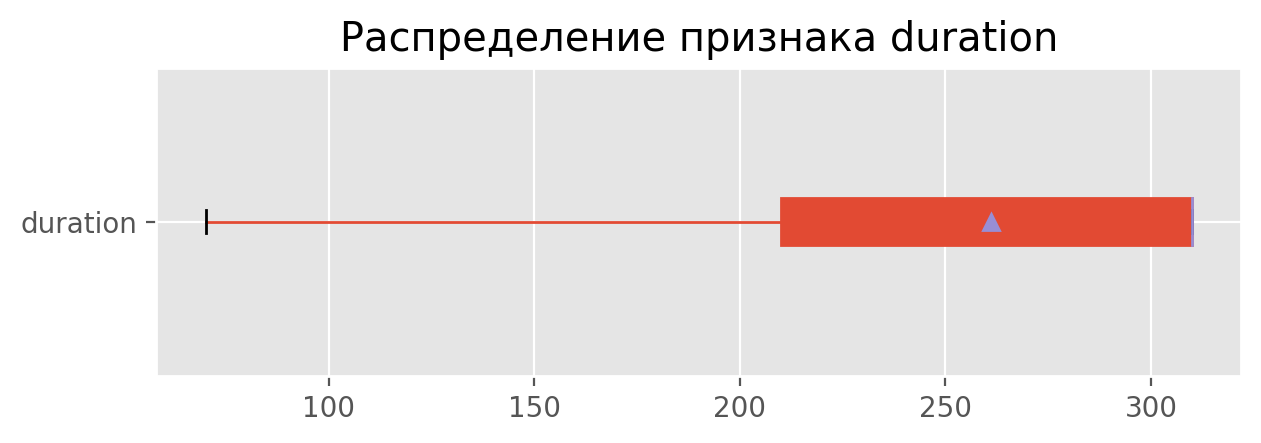

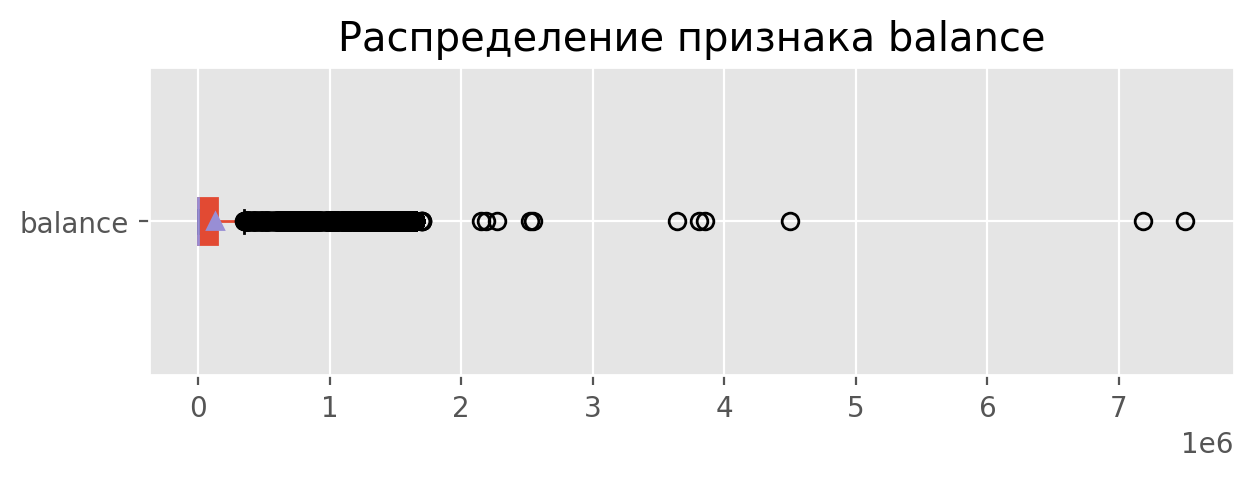

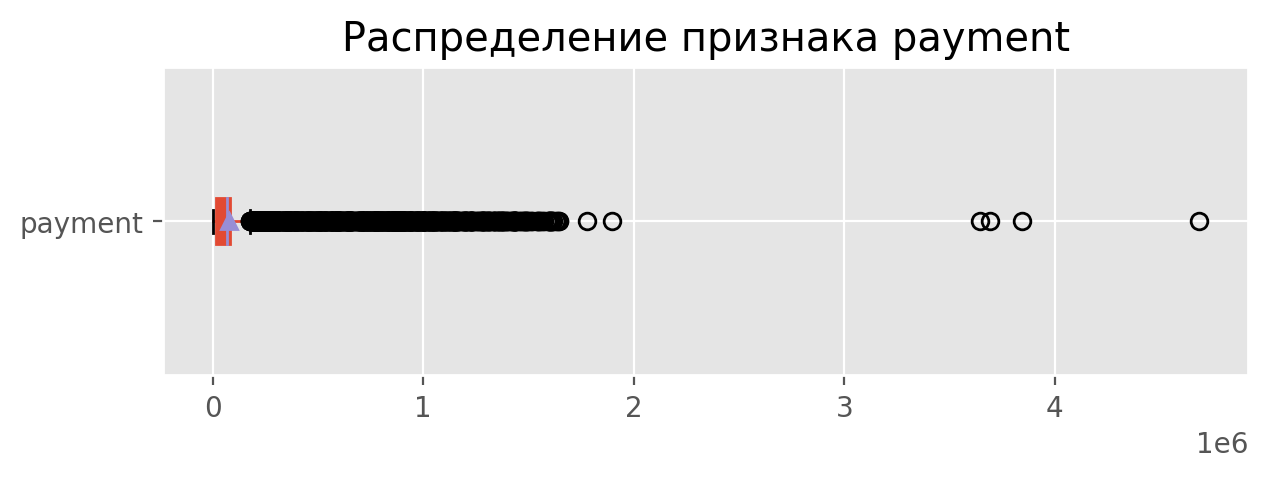

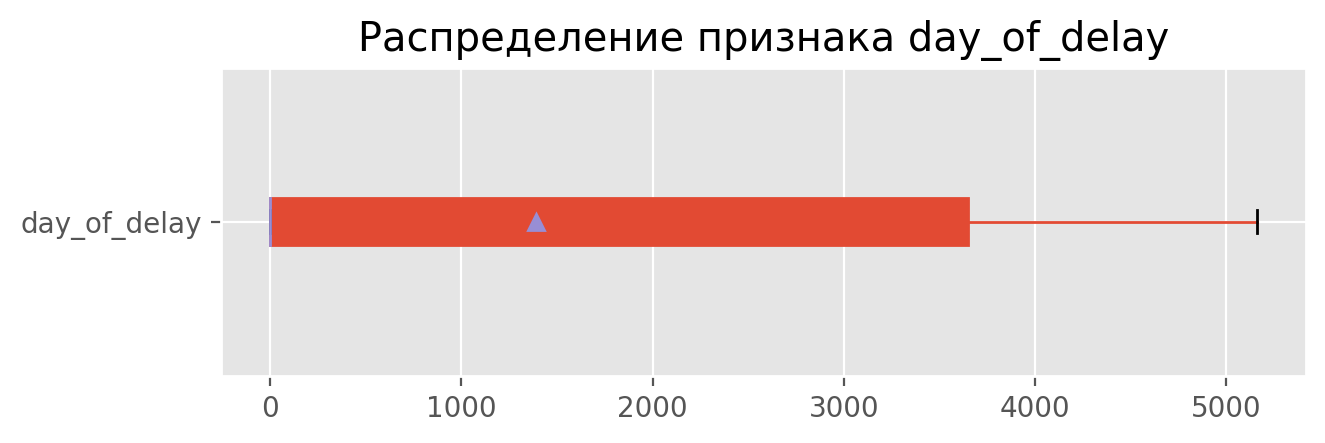

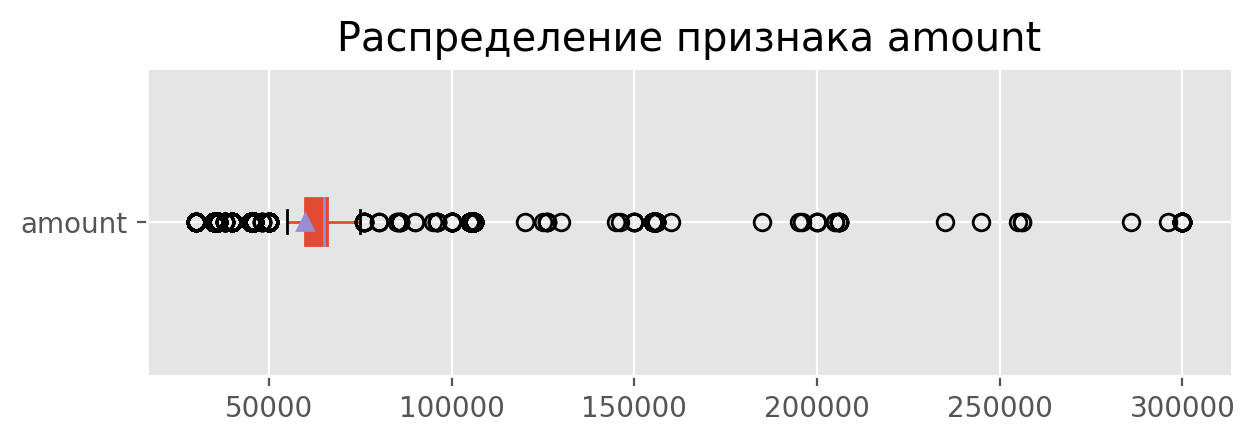

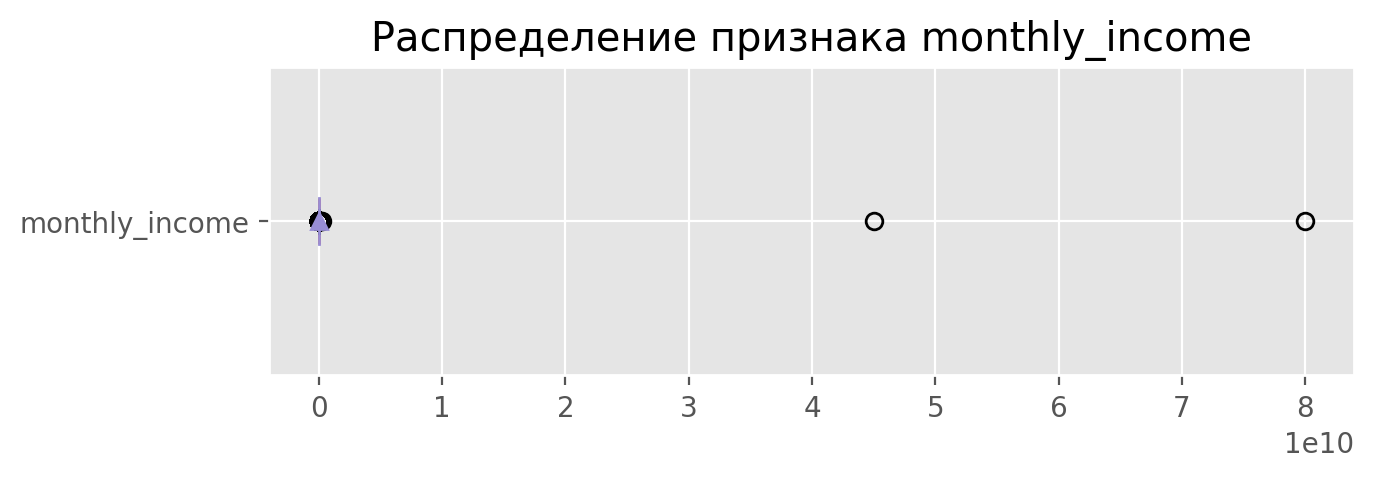

In [37]:
for i in range(len(num_col)):
    plt.figure(figsize=(7, 2))
    data.boxplot(num_col[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {num_col[i]}")
   
    plt.show()

При просмотре количественных признаков, видим что есть много выбросов. Часть ихз них уберем. 

In [38]:
data = data.query('balance <=5000000')
data = data.query('monthly_income <=1000000')
len(data)

36375

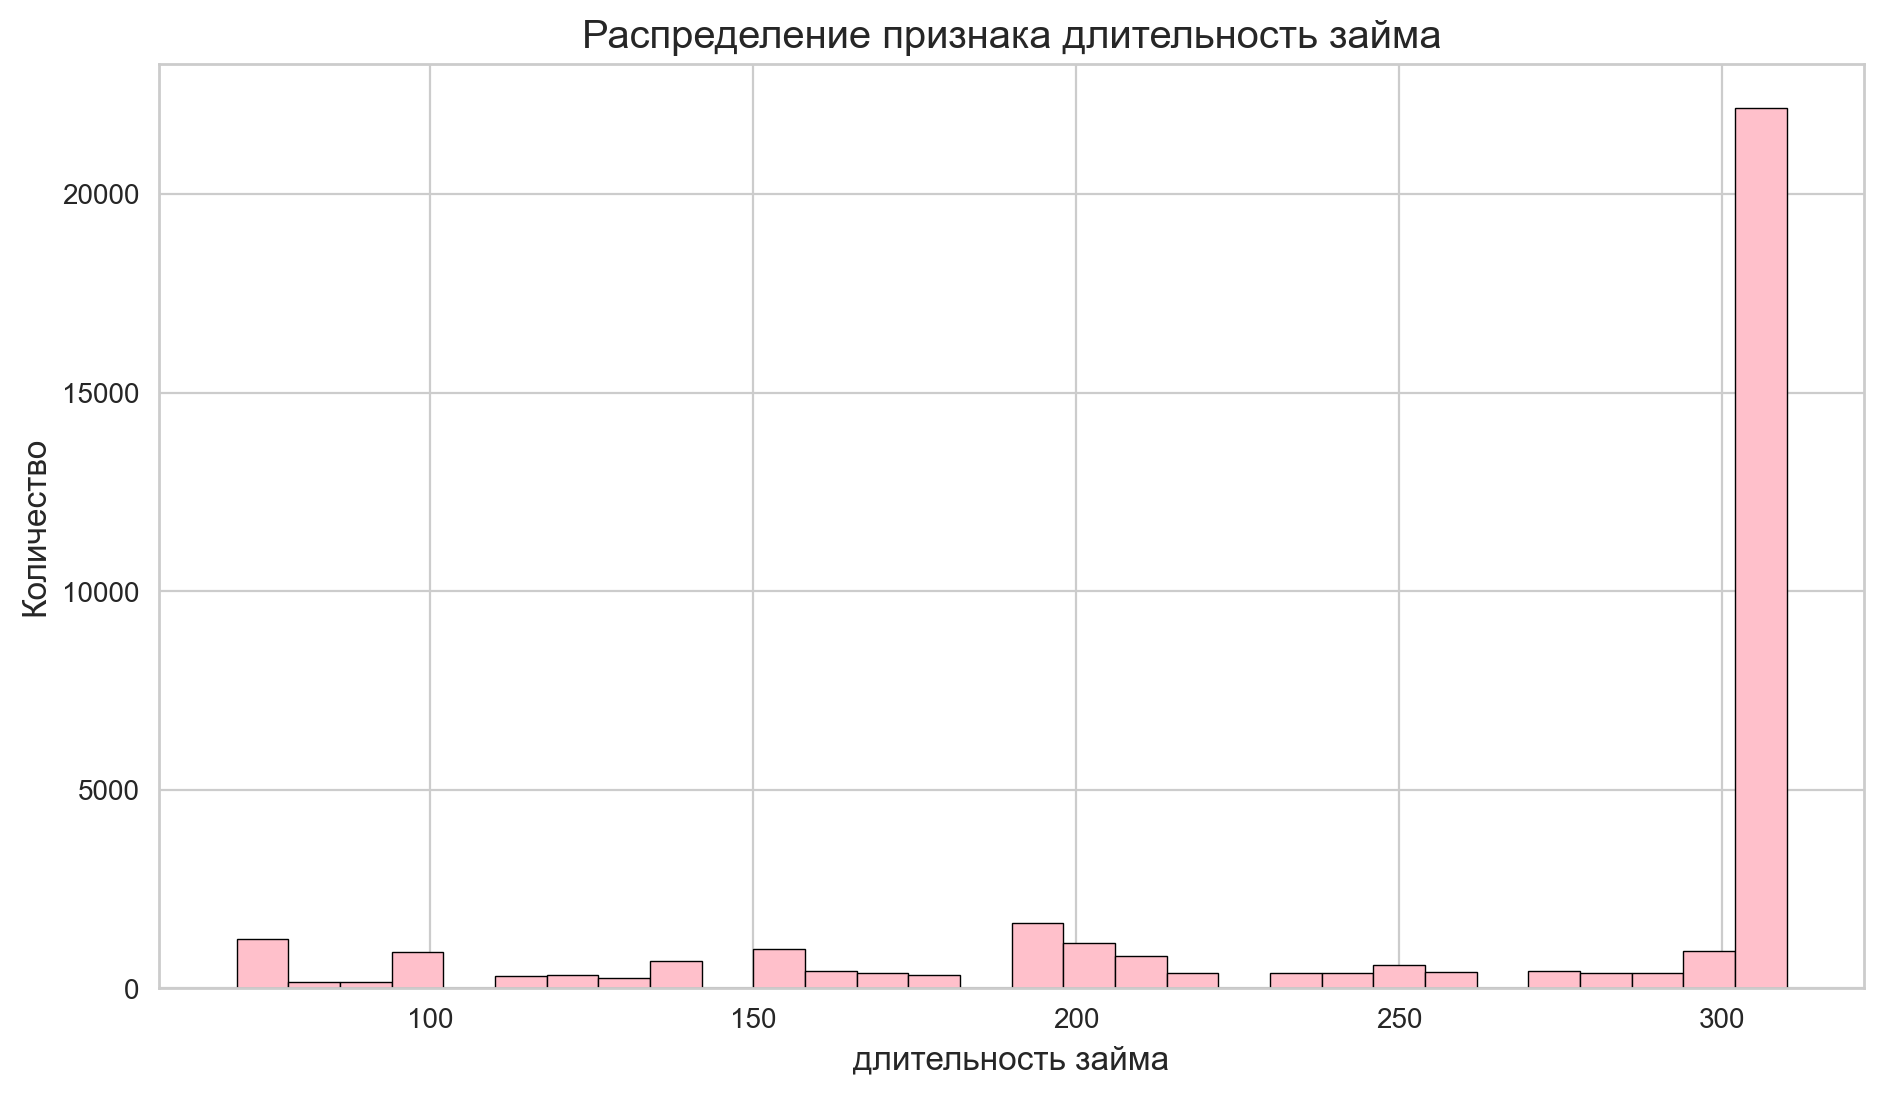

count   36375.00
mean      261.04
std        74.33
min        70.00
25%       210.00
50%       310.00
75%       310.00
max       310.00
Name: duration, dtype: float64


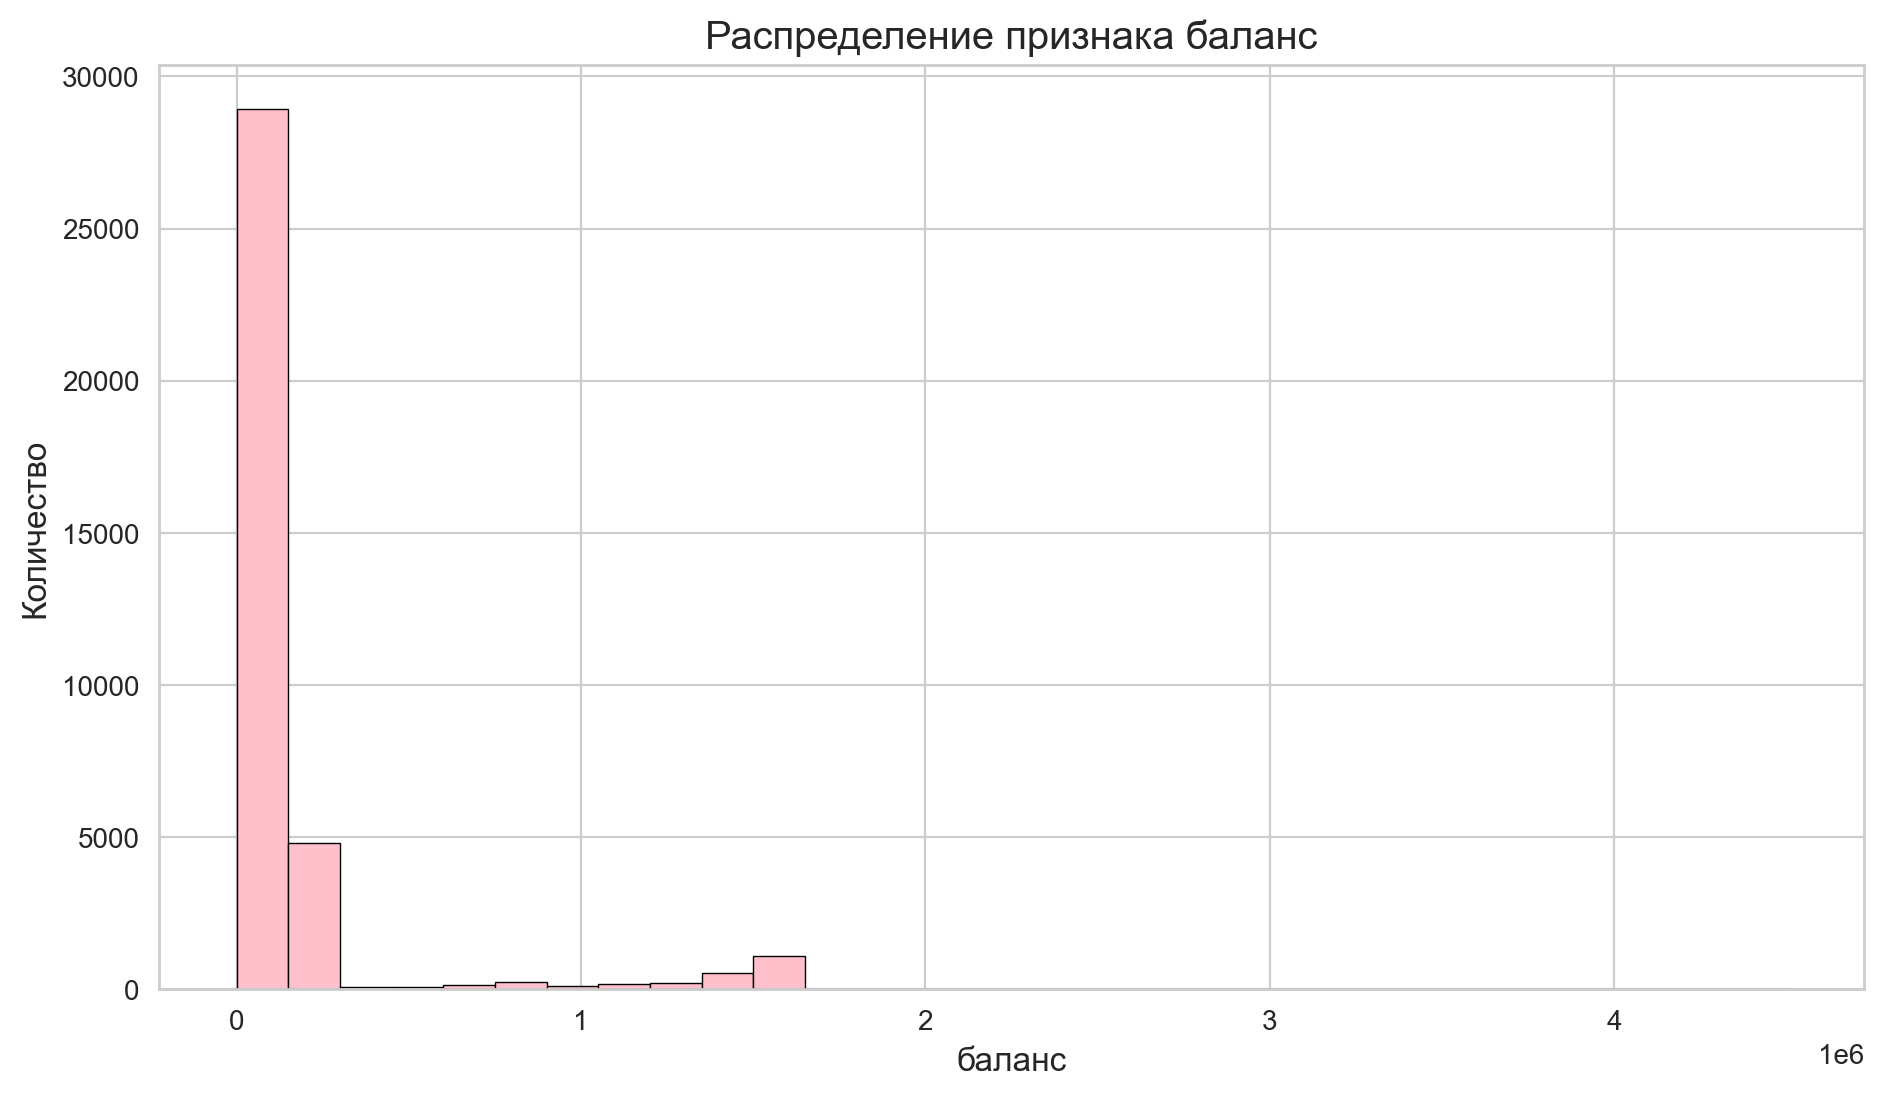

count     36375.00
mean     131158.61
std      355329.92
min           0.00
25%           0.00
50%           0.00
75%      140000.00
max     4501131.00
Name: balance, dtype: float64


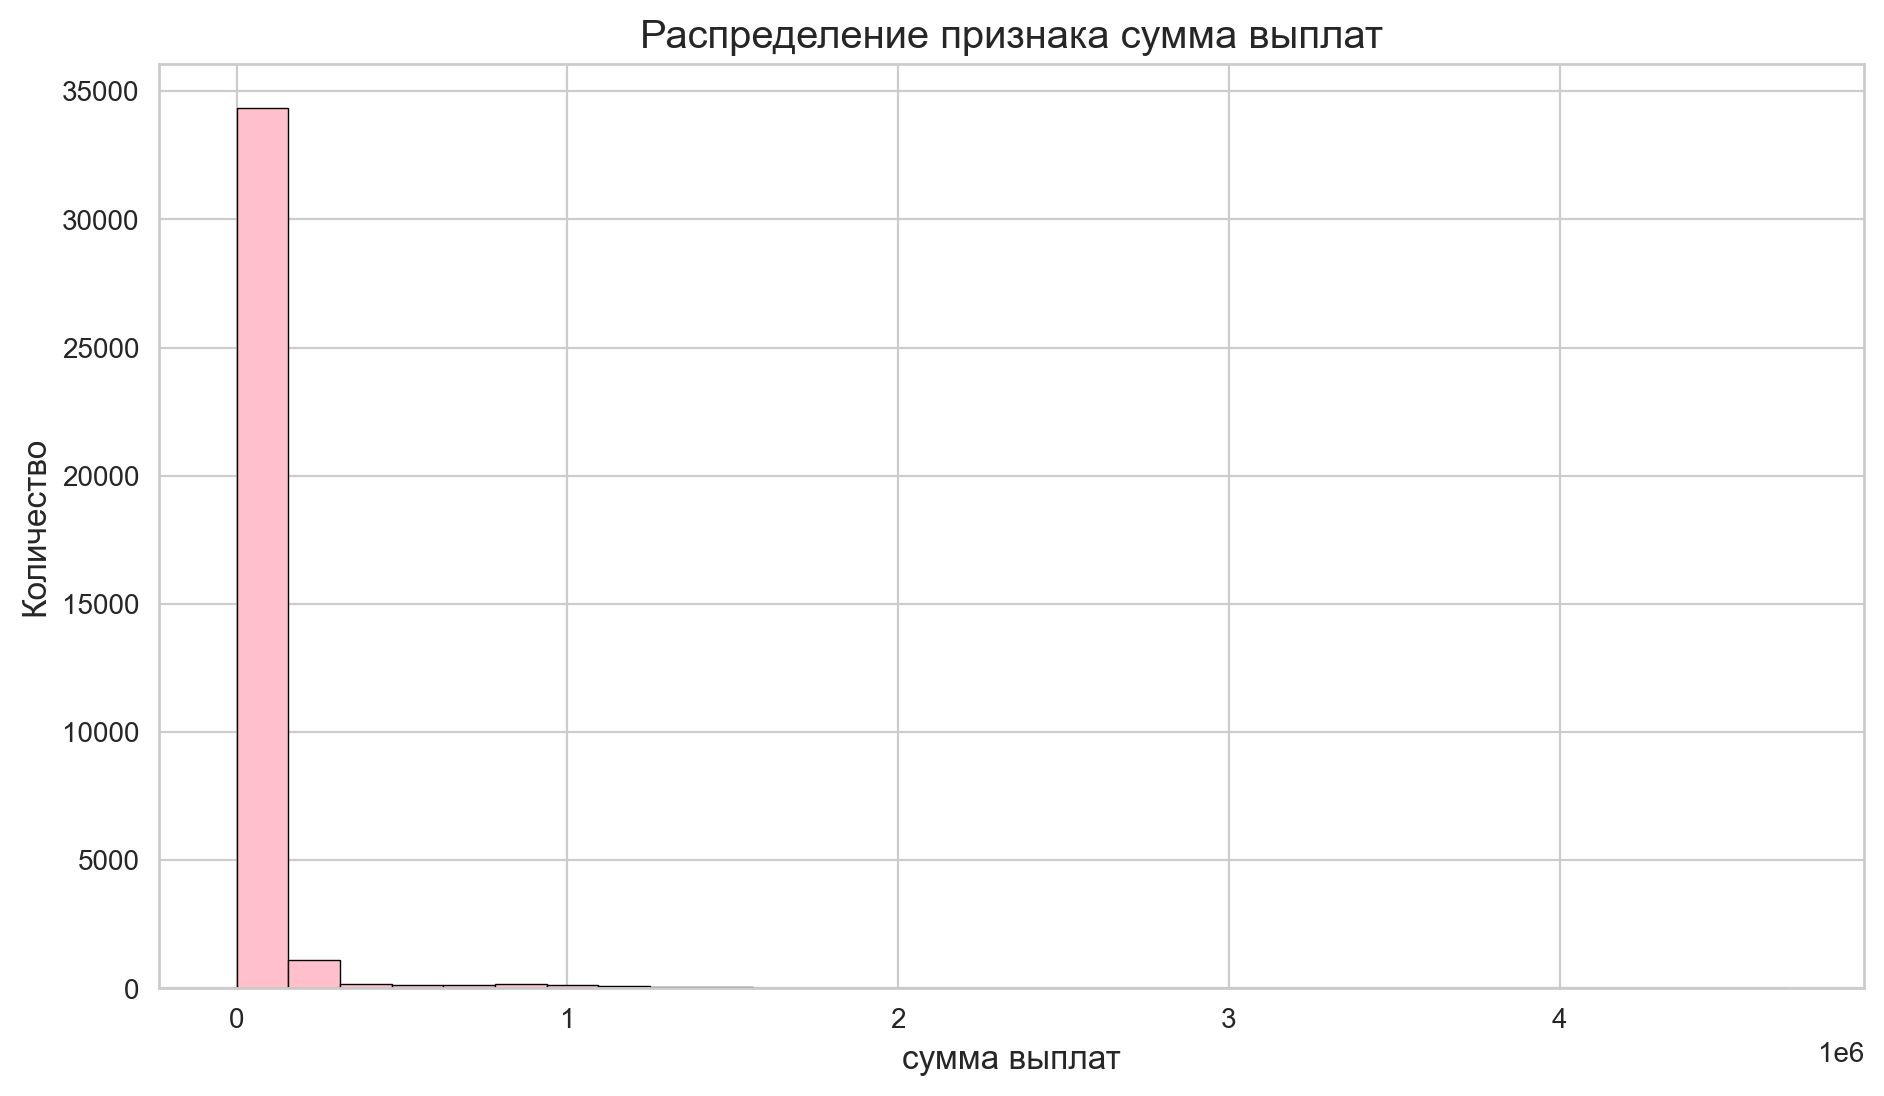

count     36375.00
mean      77429.46
std      144994.29
min           0.00
25%       12308.00
50%       67500.00
75%       81180.00
max     4685312.00
Name: payment, dtype: float64


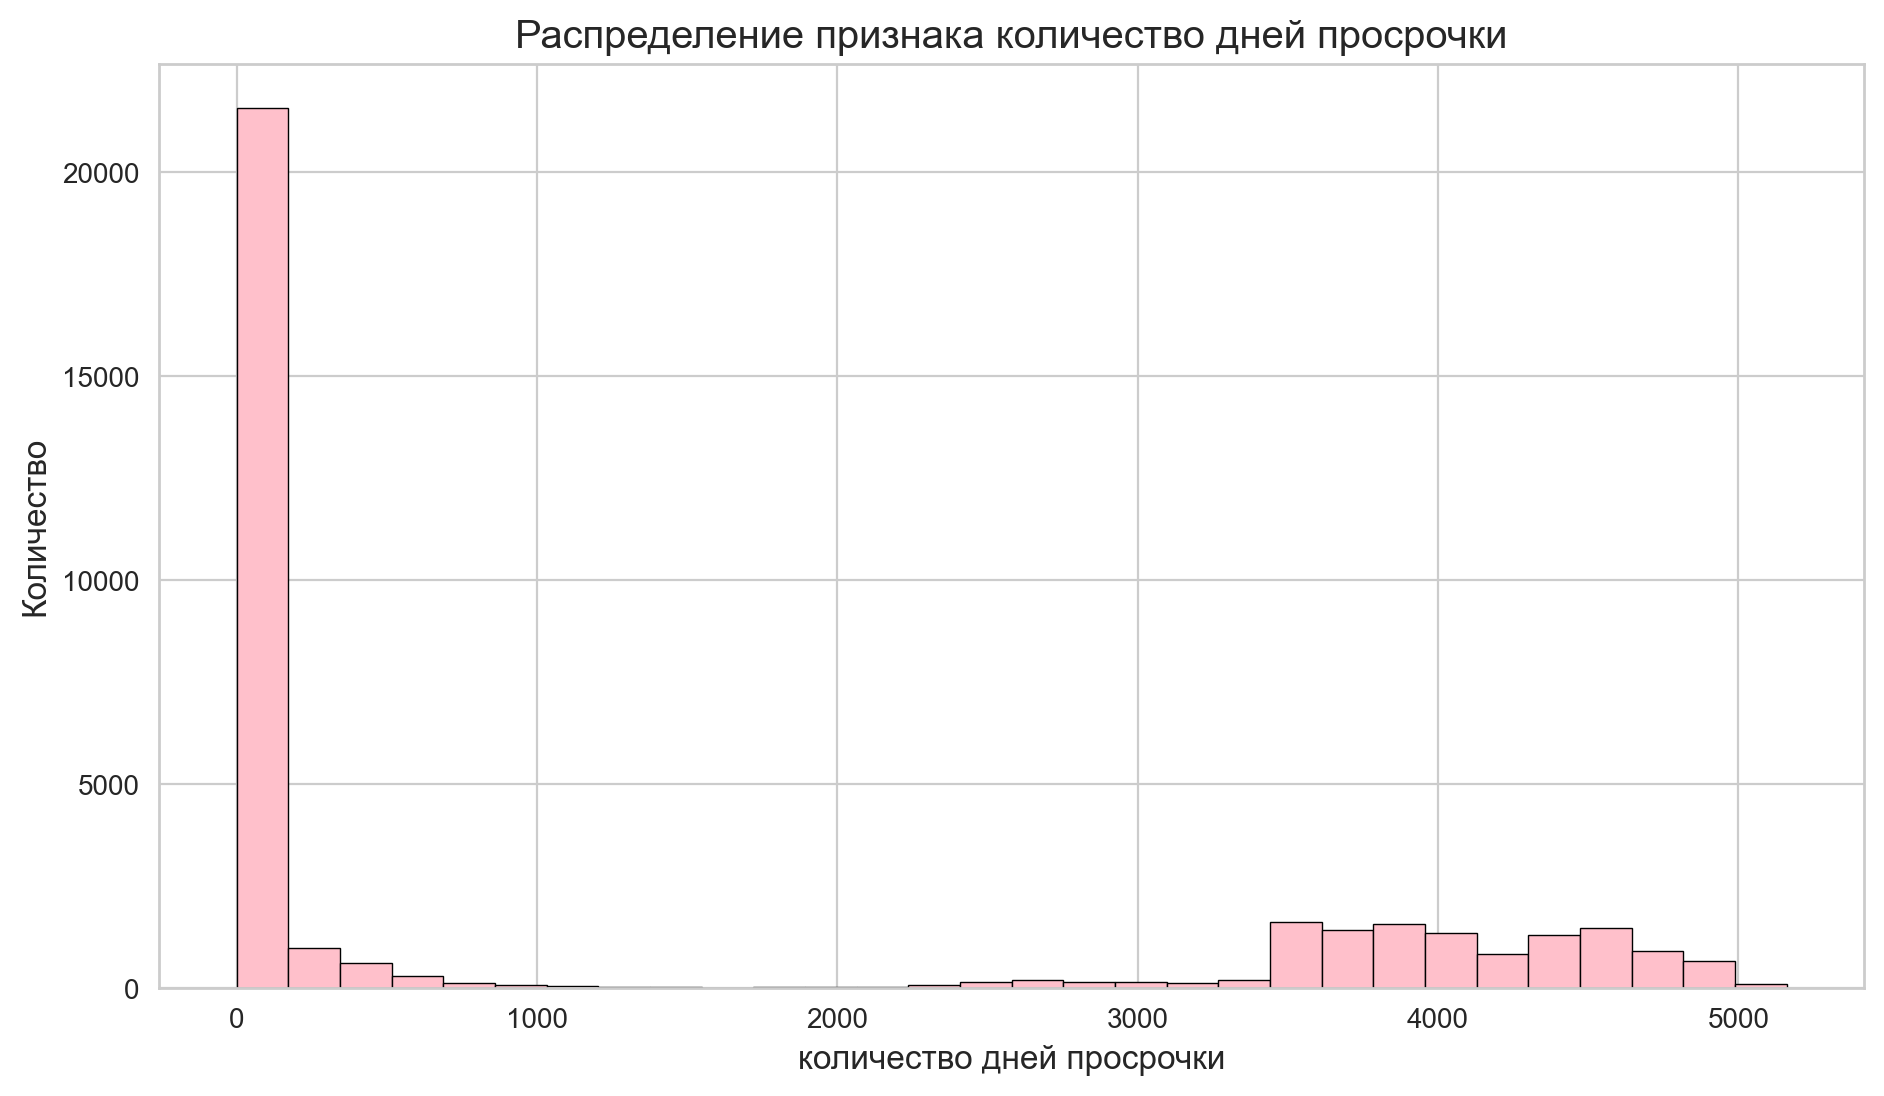

count   36375.00
mean     1412.06
std      1913.47
min         0.00
25%         0.00
50%         0.00
75%      3670.00
max      5160.00
Name: day_of_delay, dtype: float64


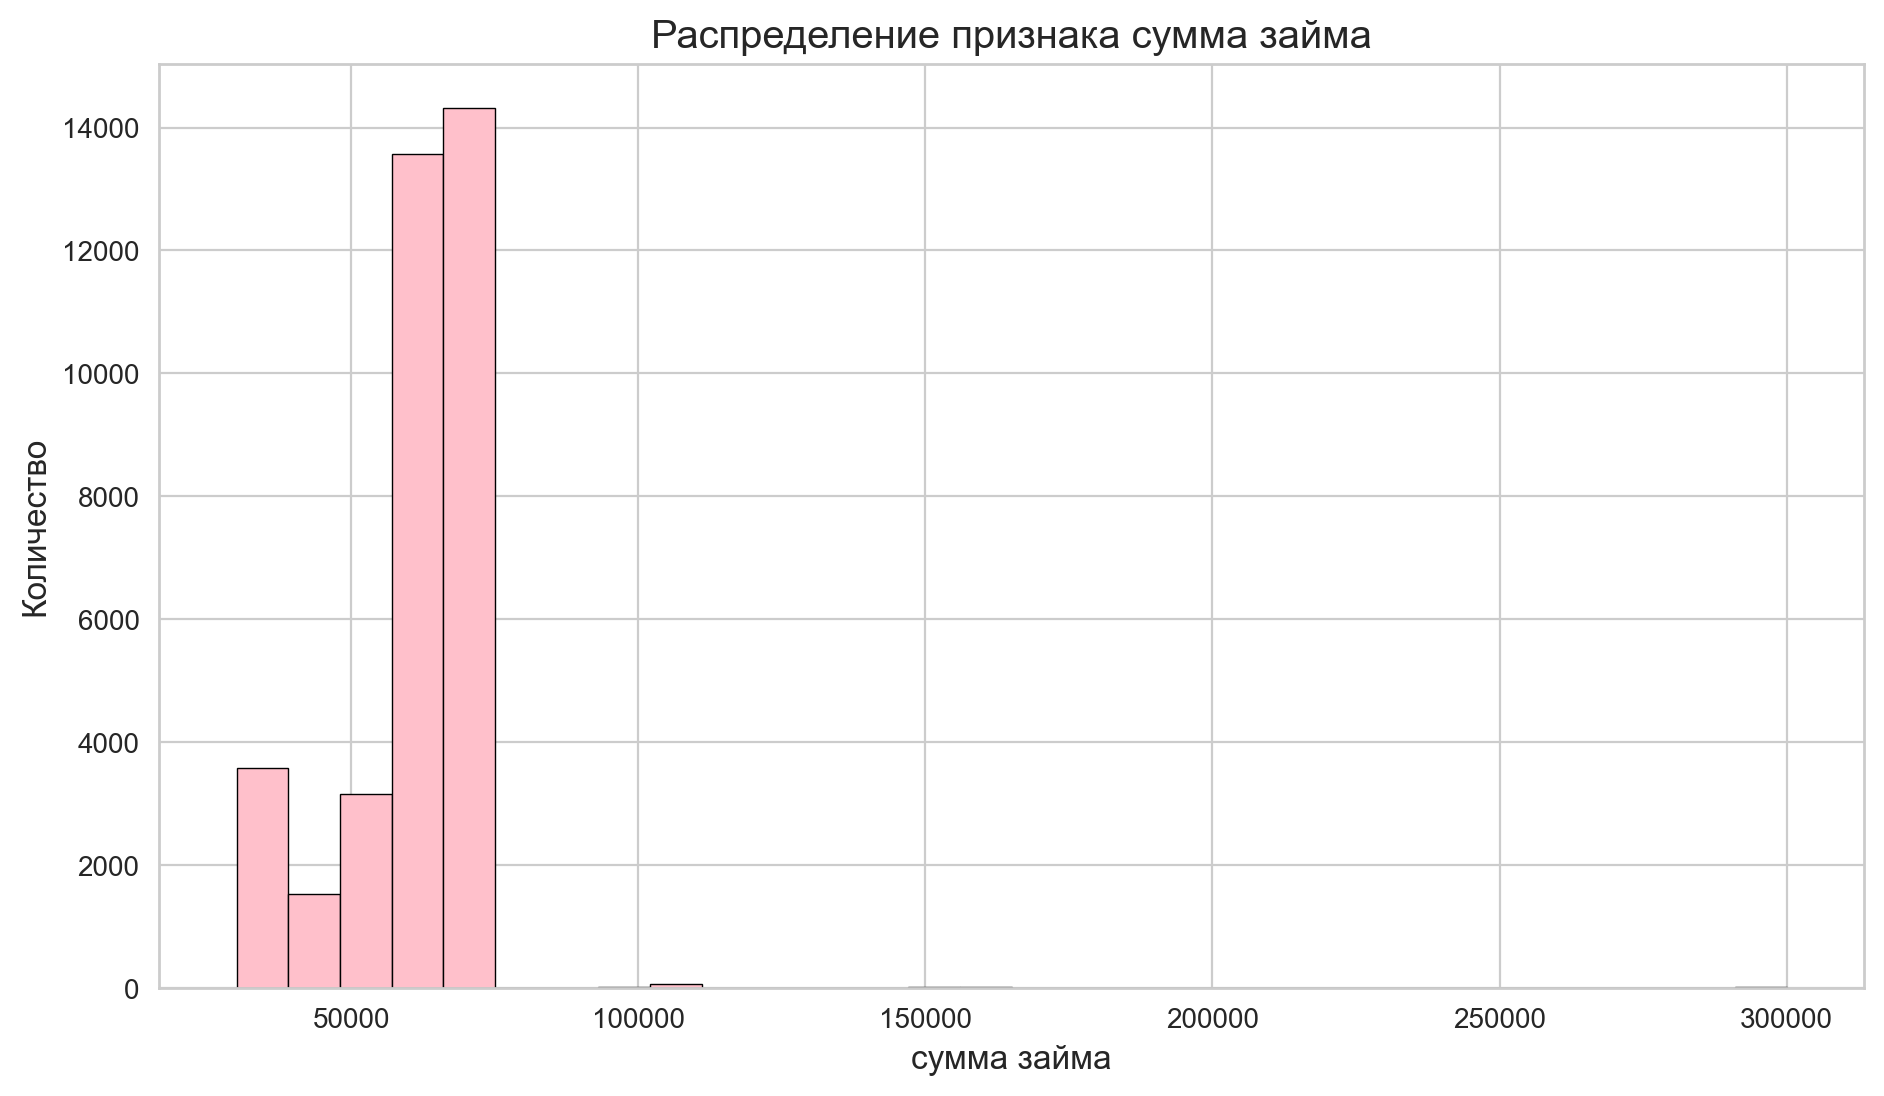

count    36375.00
mean     59756.15
std      12901.75
min      30000.00
25%      60000.00
50%      65000.00
75%      66000.00
max     300000.00
Name: amount, dtype: float64


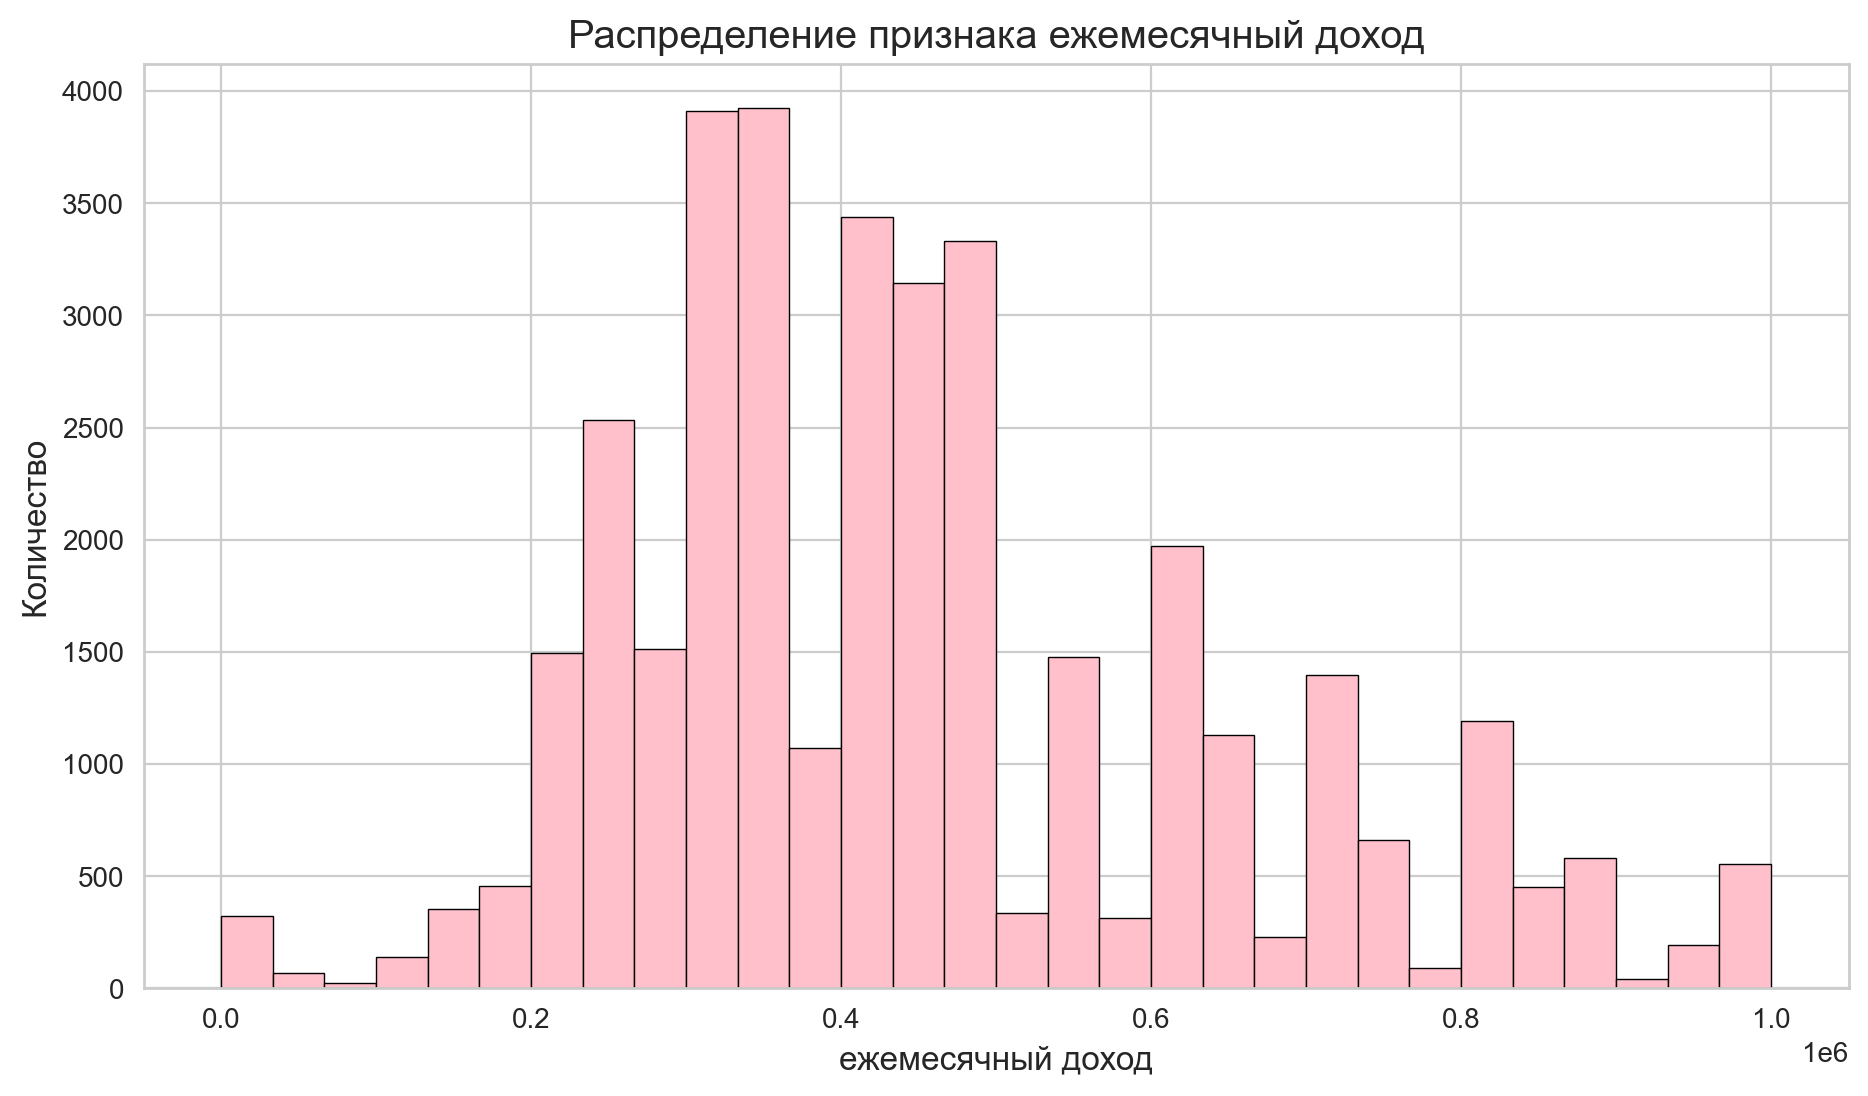

count     36375.00
mean     450784.61
std      194503.81
min           0.00
25%      300000.00
50%      400000.00
75%      550000.00
max     1000000.00
Name: monthly_income, dtype: float64


In [39]:
for i in range(len(num_col)):
    sns.set_style('whitegrid')
    plt.figure(figsize=(11, 6))
    plt.hist(data[num_col[i]], color = 'pink', edgecolor = 'black', bins = 30)
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.ylabel("Количество")
    plt.xlabel(titles_num[i])
    plt.show()
    print(data[num_col[i]].describe())

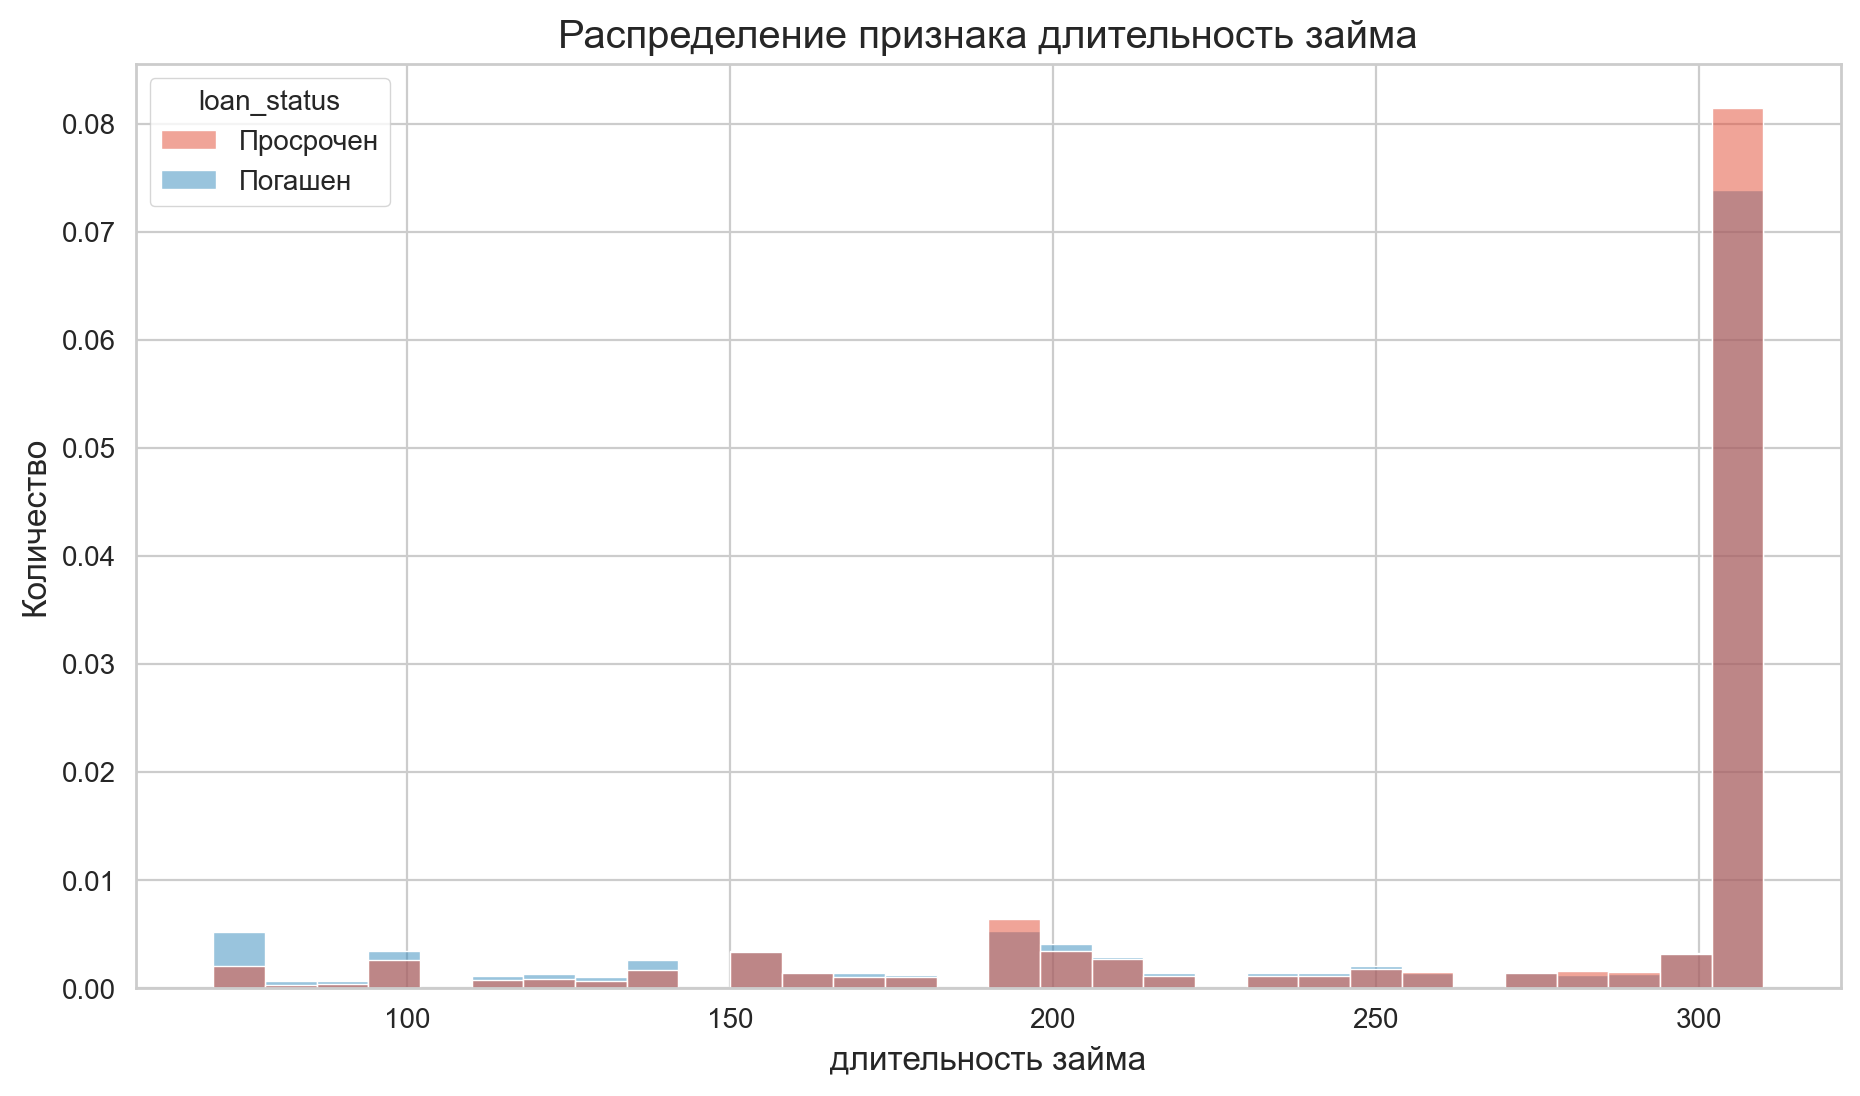

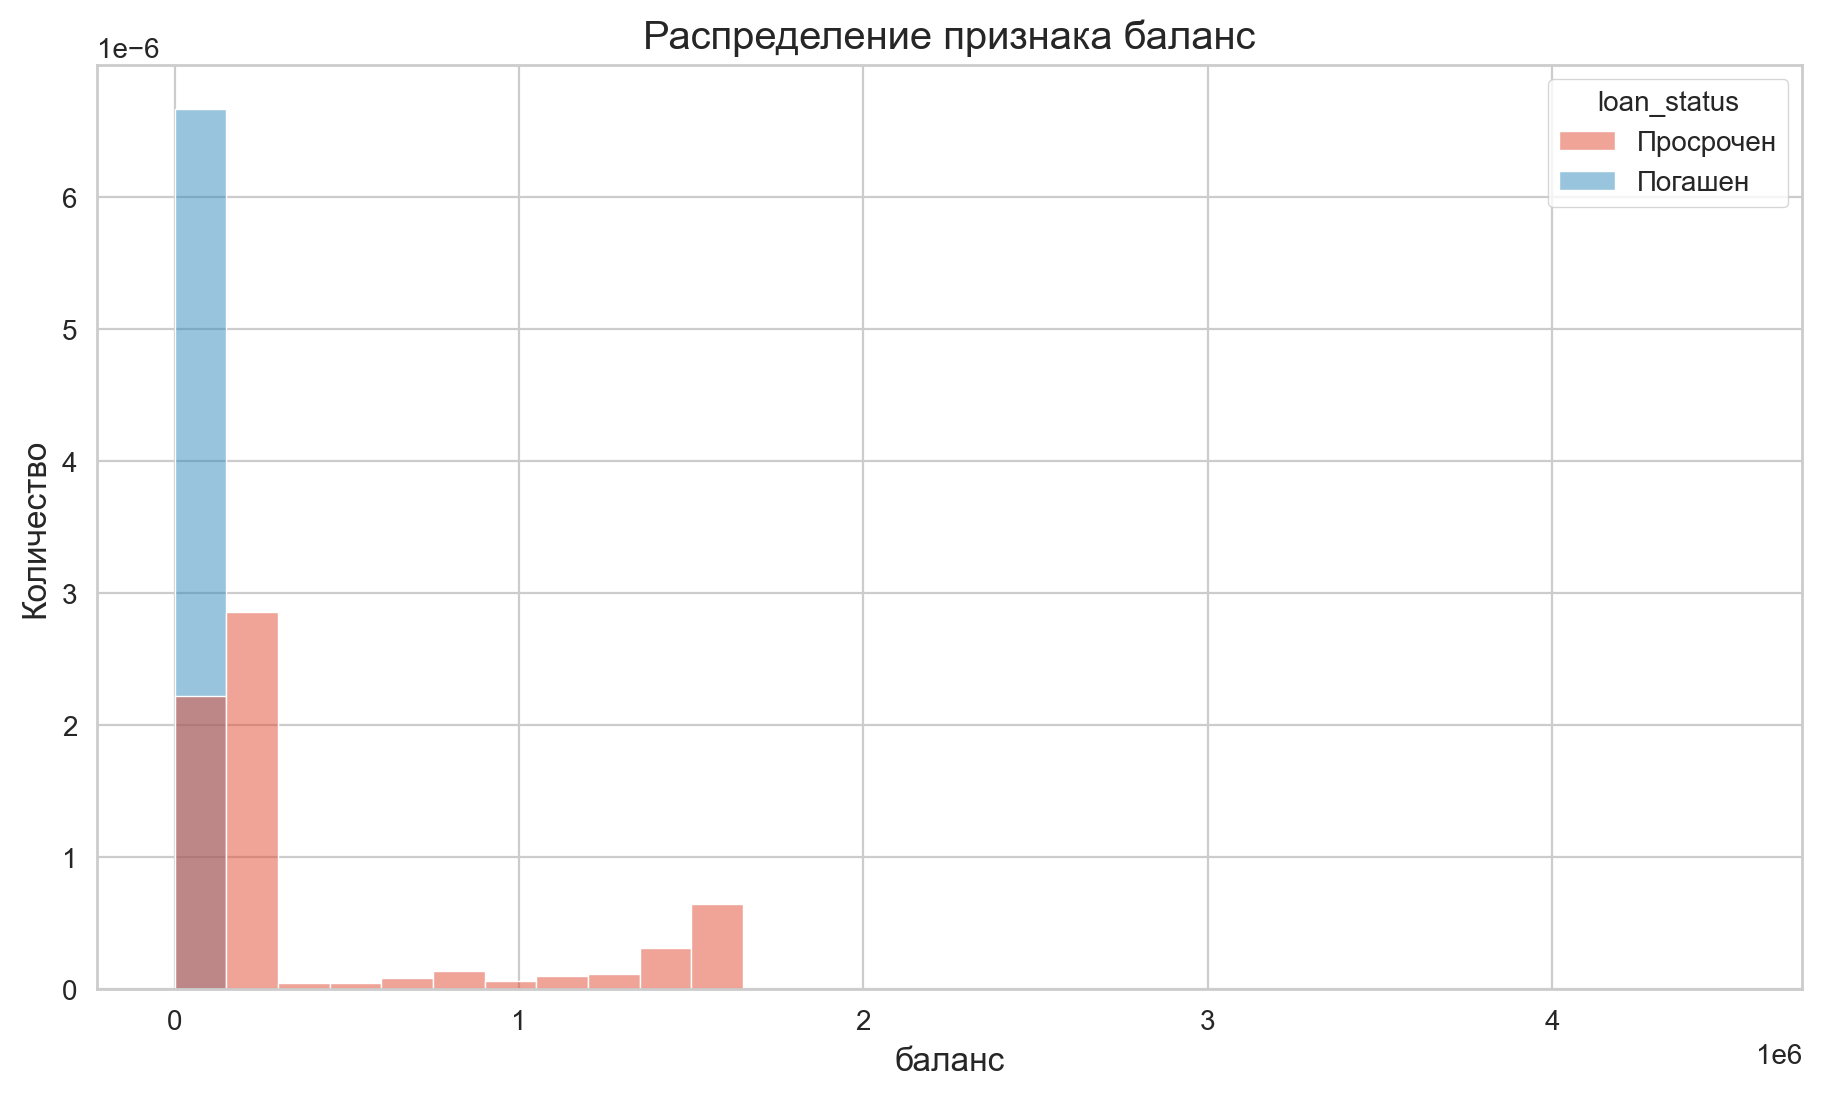

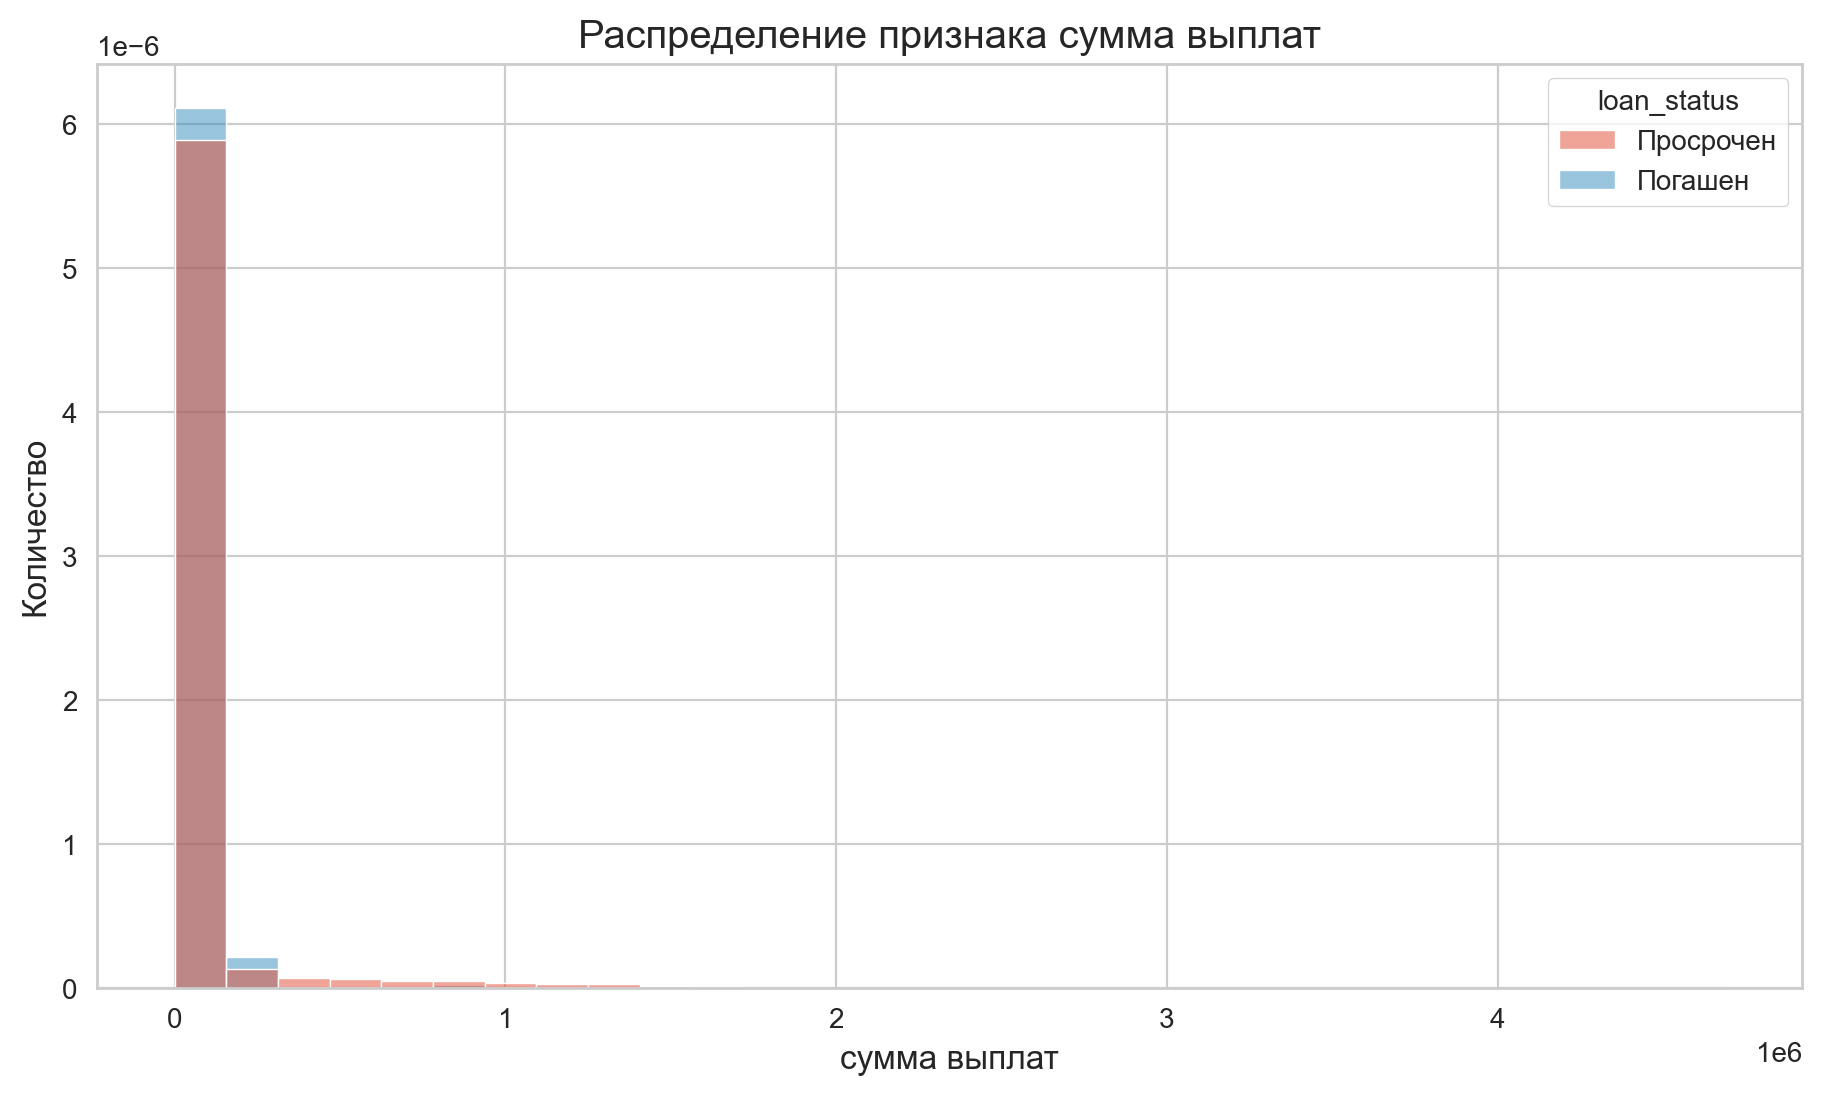

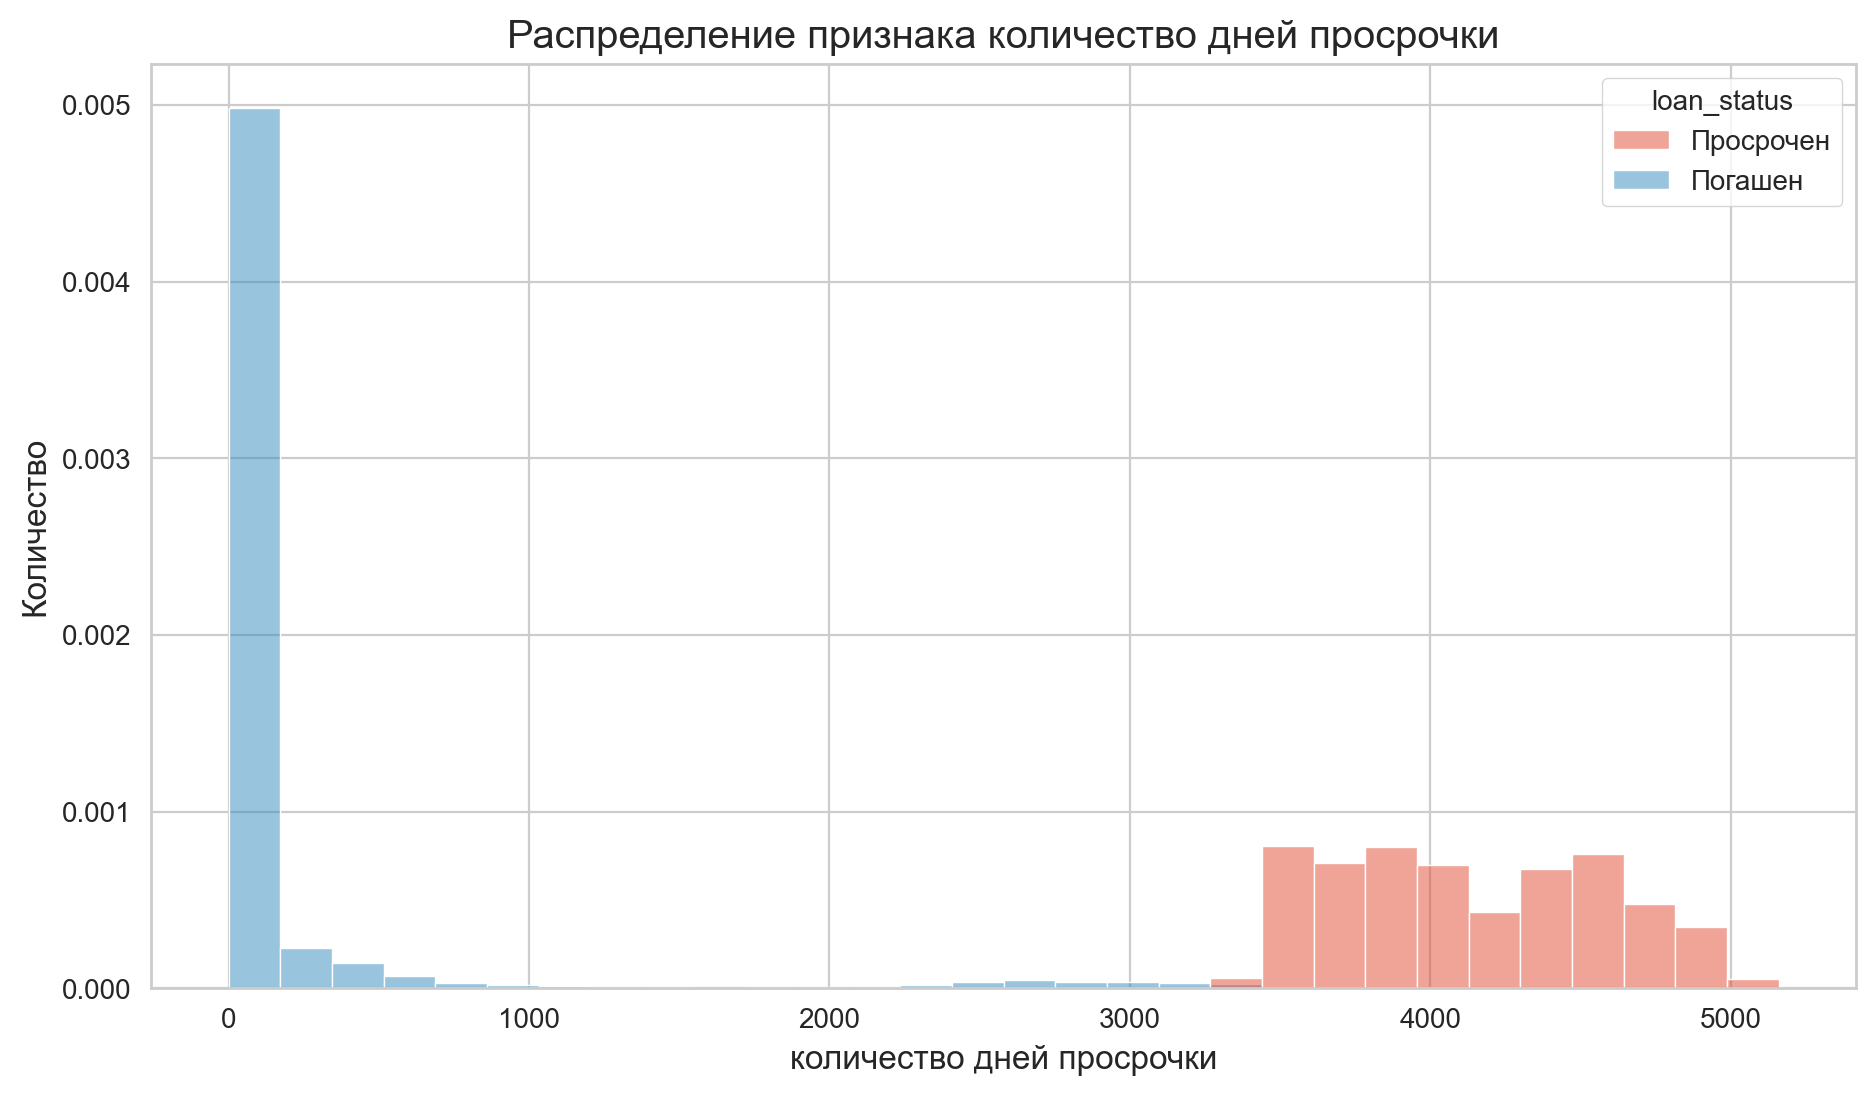

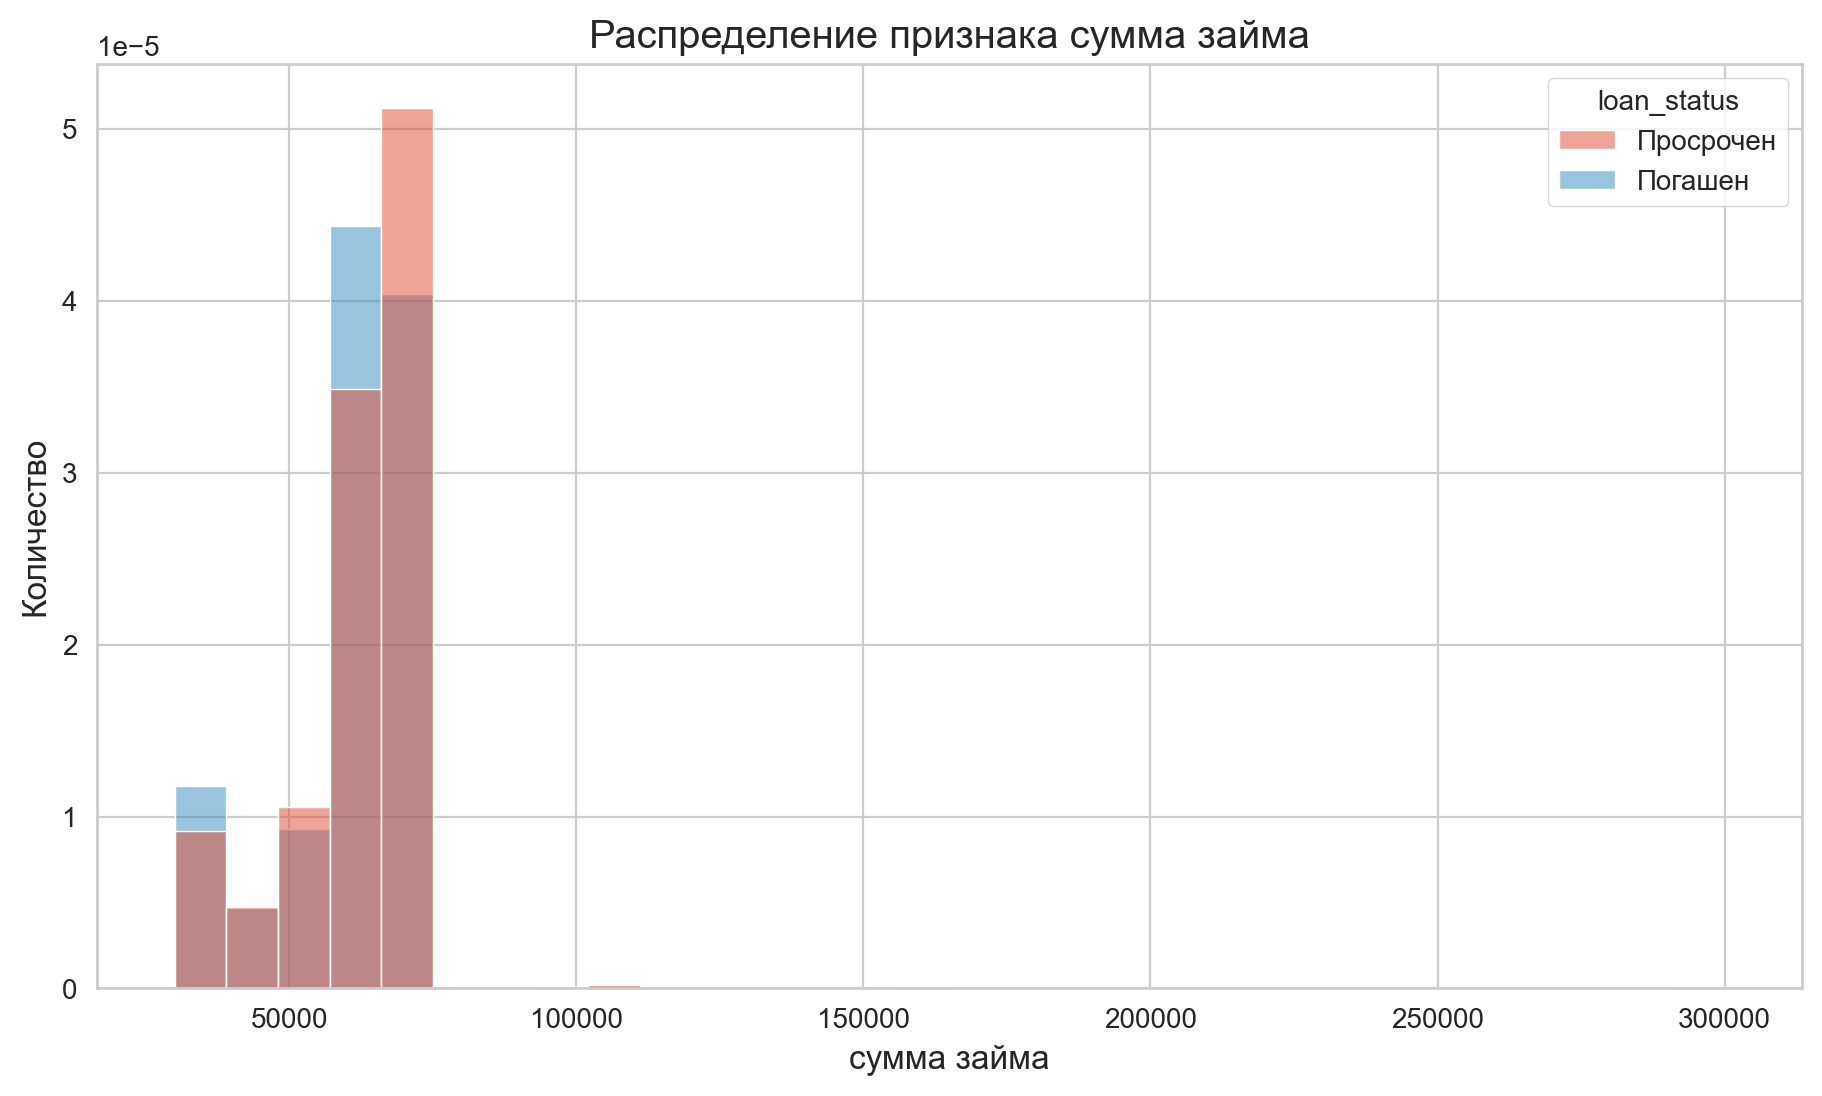

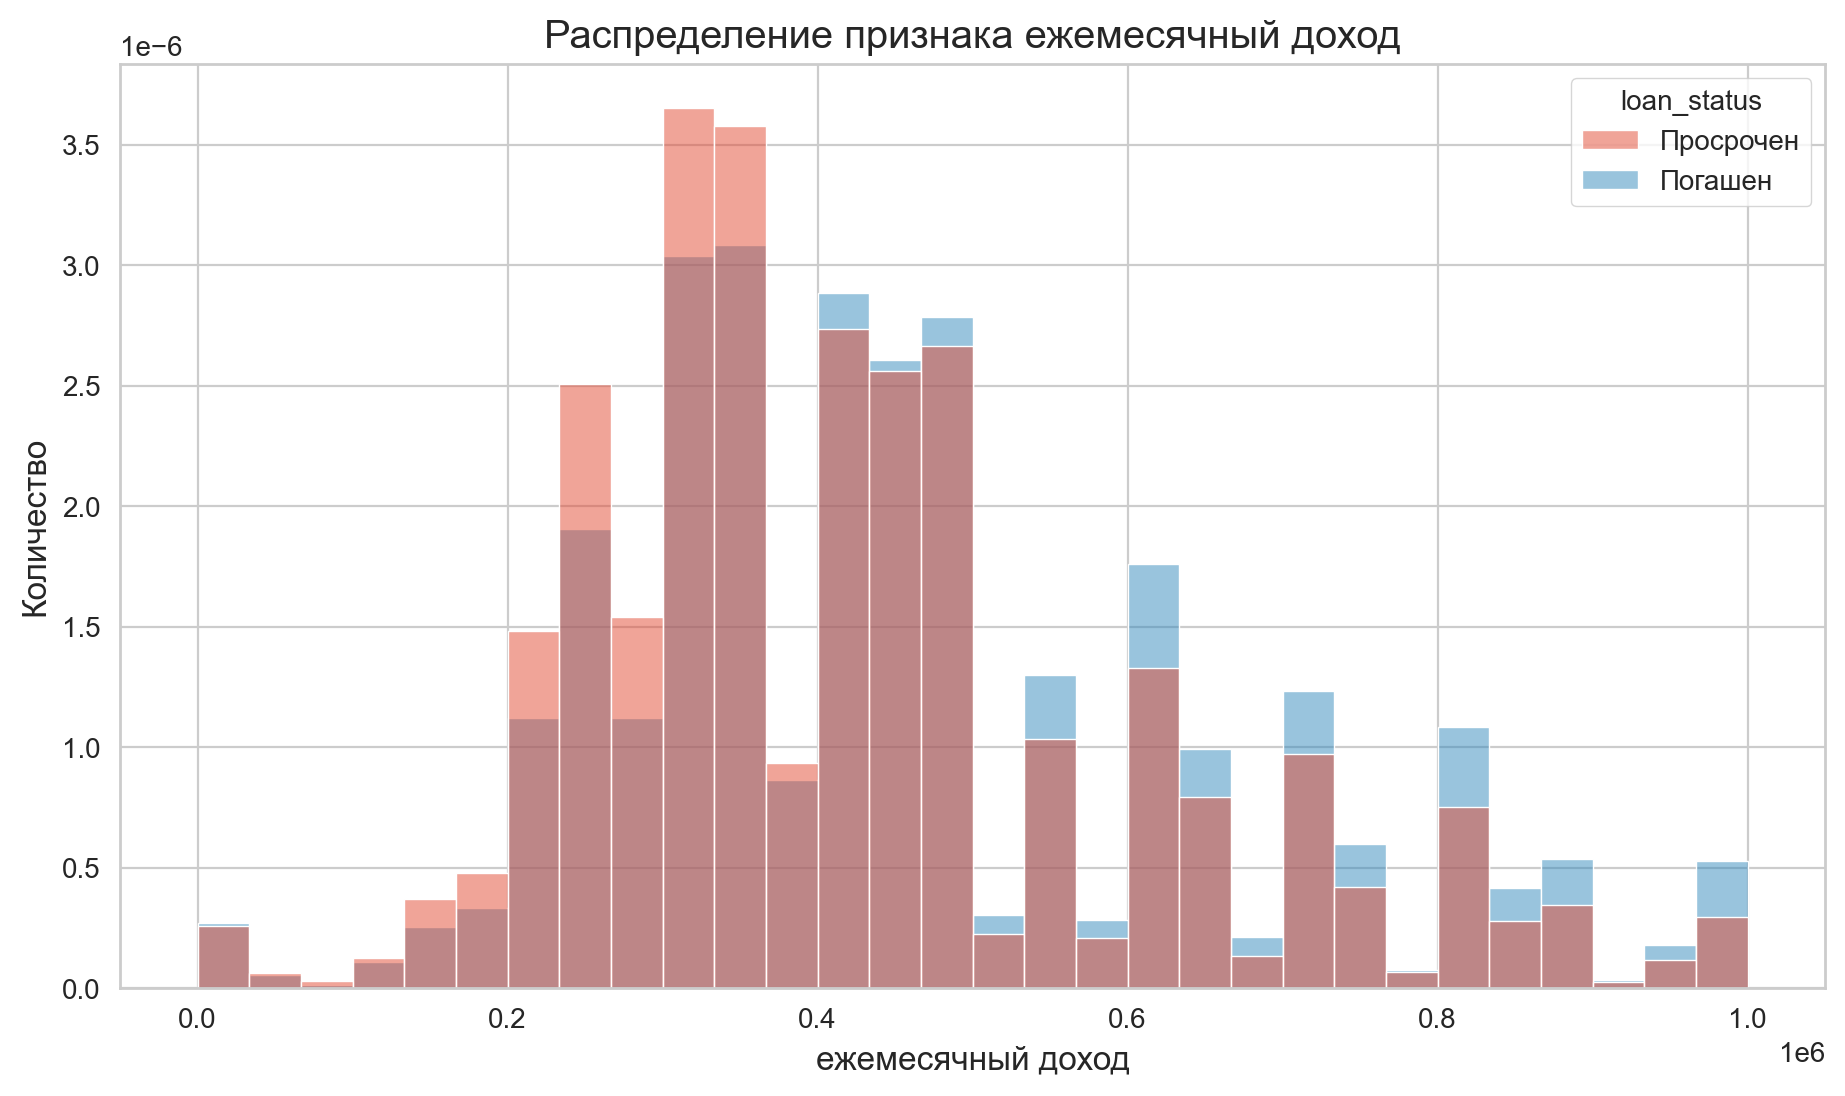

In [40]:
for i in range(len(num_col)):
    
    fig, axs = plt.subplots(figsize=(11, 6))
    sns.histplot(data=data, x= data[num_col[i]], hue="loan_status", stat="density", common_norm=False, bins = 30)
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.ylabel("Количество")
    plt.xlabel(titles_num[i])
    plt.show()
    

После анализа количественных признаков мы видим что в основном склонны к просрочке:
- клиенты с доходом меньше 400000,
- с суммой займа от 50 000 до 60 000 и 80000,

In [41]:
data.head()

,draft_id,issue_date,duration,retire_date,loan_status,balance,payment,day_of_delay,formula_id,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
1,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13,310.00,2021-06-13,Просрочен,163201.00,1799.00,3610.00,55,66000,торговля,среднее,2,другое,10,250000,рабочий
2,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,2021-05-08,310.00,2021-06-08,Просрочен,364518.00,885482.00,3660.00,55,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,0ebf262a-d27f-4d88-bae8-1e09322fb12f,2021-02-03,310.00,2021-03-06,Погашен,0.00,141050.00,860.00,54,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,adc23c19-d21b-4bb5-ad2b-6faccae5a045,2021-02-24,140.00,2021-03-10,Погашен,0.00,68400.00,0.00,54,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист
5,58c07d52-a219-4e0e-b04b-2437b5c10046,2021-02-06,310.00,2021-03-09,Погашен,0.00,78600.00,0.00,55,60000,строительство и недвижимость,среднее специальное,1,непредвиденные расходы,0,600000,рабочий


In [42]:
def spr(loan_status): 
    if loan_status == "Погашен":
        return 0
    return 1 

In [43]:
data['loan_status']=data['loan_status'].apply(spr)
data['loan_status'].unique()

array([1, 0], dtype=int64)

In [44]:
cat_col=['loan_status', 'activity_type', 'education', 'gender', 'loan_purpose', 'post']
titles_cat =  ['статус займа','вид деятельности','образование','пол','цель займа','занимаемая должность']

In [45]:
def bar_plot(df,col):
    plt.figure(figsize=(16,8))
    eplot=sns.barplot(data=df, x=col, y='percent', ci=None)
    for g in eplot.patches:
        eplot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

    plt.axhline(y=df['percent'].mean(), color='r', linestyle = '--')
    plt.title(f'Процент склонных к просрочке по признаку {col}')
    plt.xlabel(f' {col}')
    plt.xticks(rotation=90)
    plt.ylabel('Доля склонных к просрочке')
    plt.show()

In [46]:
activity = data.pivot_table(index='activity_type', values='loan_status', aggfunc=['count','sum'])
activity.columns = activity.columns.droplevel(level=1)
activity['percent']=activity['sum']/activity['count']*100
activity['activity_type']=activity.index
activity=activity.sort_values( by='percent', ascending = False)

activity

,count,sum,percent,activity_type
activity_type,,,,
строительство и недвижимость,2616,926,35.40,строительство и недвижимость
охранная деятельность,600,209,34.83,охранная деятельность
торговля,9225,3111,33.72,торговля
промышленность,4700,1584,33.70,промышленность
добывающий сектор,634,198,31.23,добывающий сектор
сервис и услуги,3746,1161,30.99,сервис и услуги
другое,4015,1243,30.96,другое
транспорт,2328,677,29.08,транспорт
культура и искусство,403,115,28.54,культура и искусство


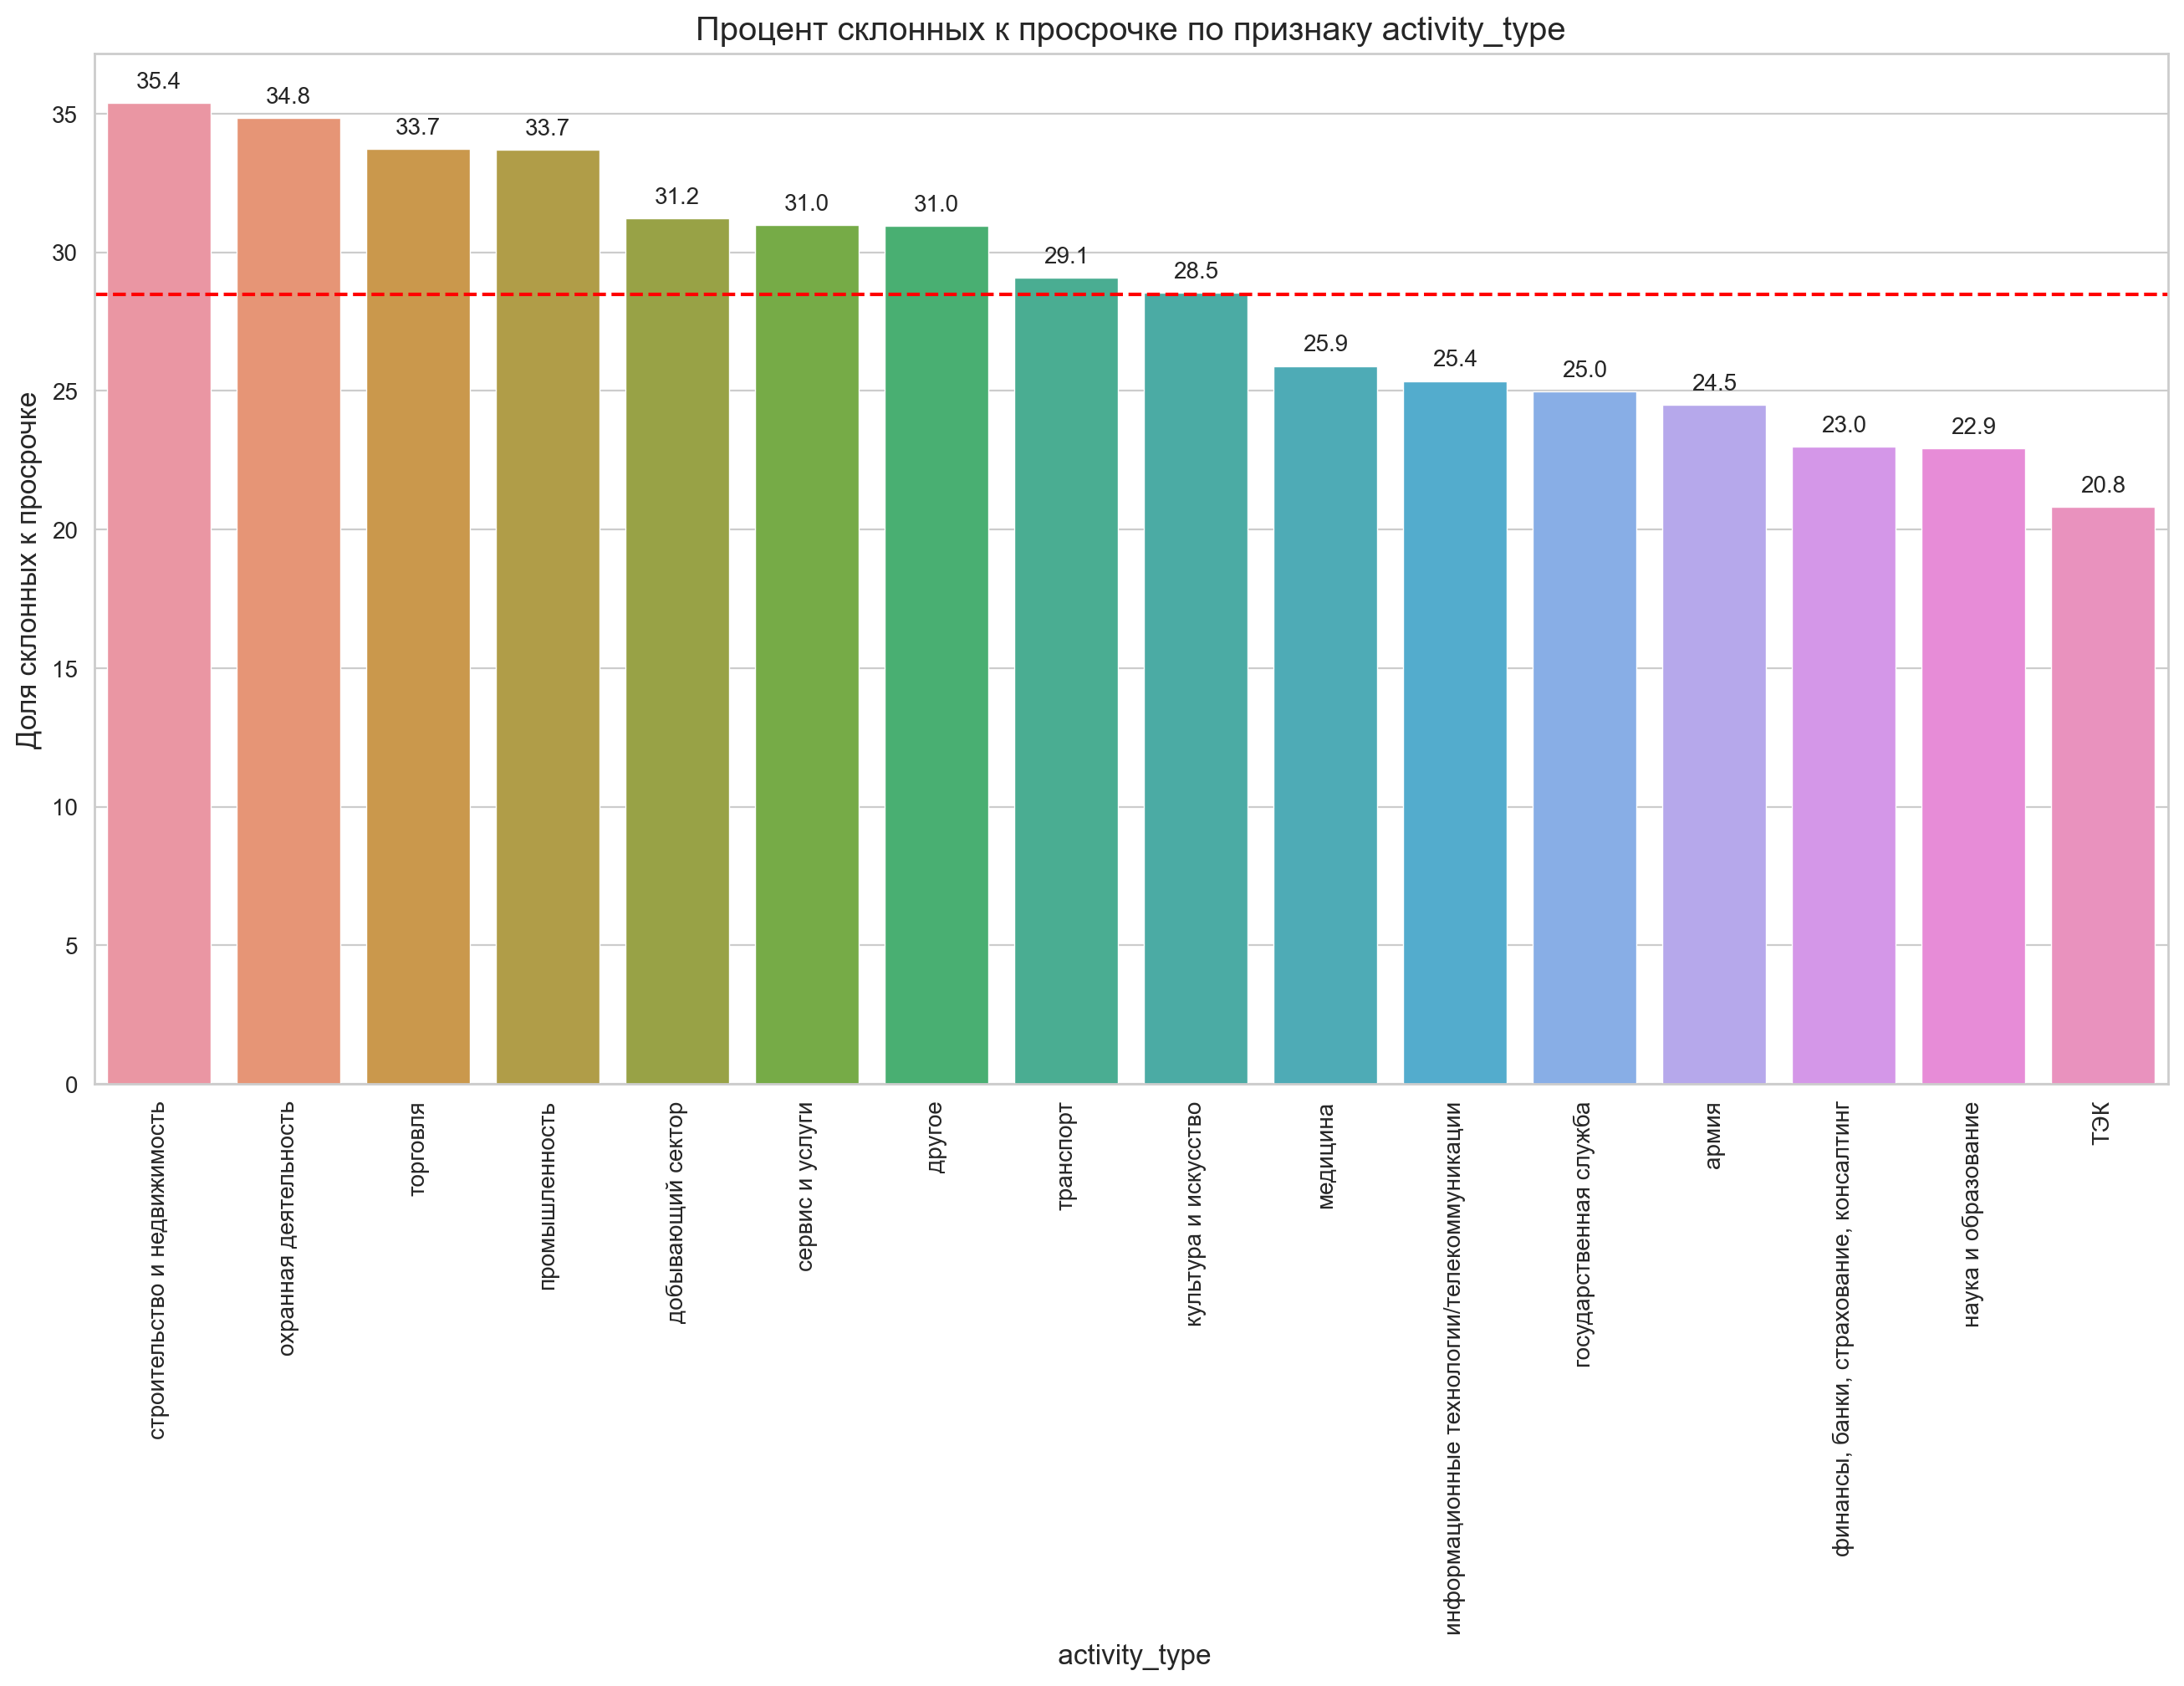

In [47]:
bar_plot(activity,'activity_type')

Также процент просроченных выплат по типам активности выглядит следующим образом:
- в строительстве и недвижимости больше всего просроченных выплат — 35,4 %
- далее идут охранная деятельность  - 34,8 %, торговля — 33,72 и промышленность 33,70

In [48]:
edu = data.pivot_table(index='education', values='loan_status', aggfunc=['count','sum'])
edu.columns = edu.columns.droplevel(level=1)
edu['percent']=edu['sum']/edu['count']*100
edu=edu.sort_values( by='percent', ascending = False)
edu['education']=edu.index
edu

,count,sum,percent,education
education,,,,
неполное среднее,683,282,41.29,неполное среднее
среднее,5169,1985,38.40,среднее
другое,32,11,34.38,другое
среднее специальное,15307,5258,34.35,среднее специальное
неполное высшее,3828,1021,26.67,неполное высшее
высшее,11356,2643,23.27,высшее


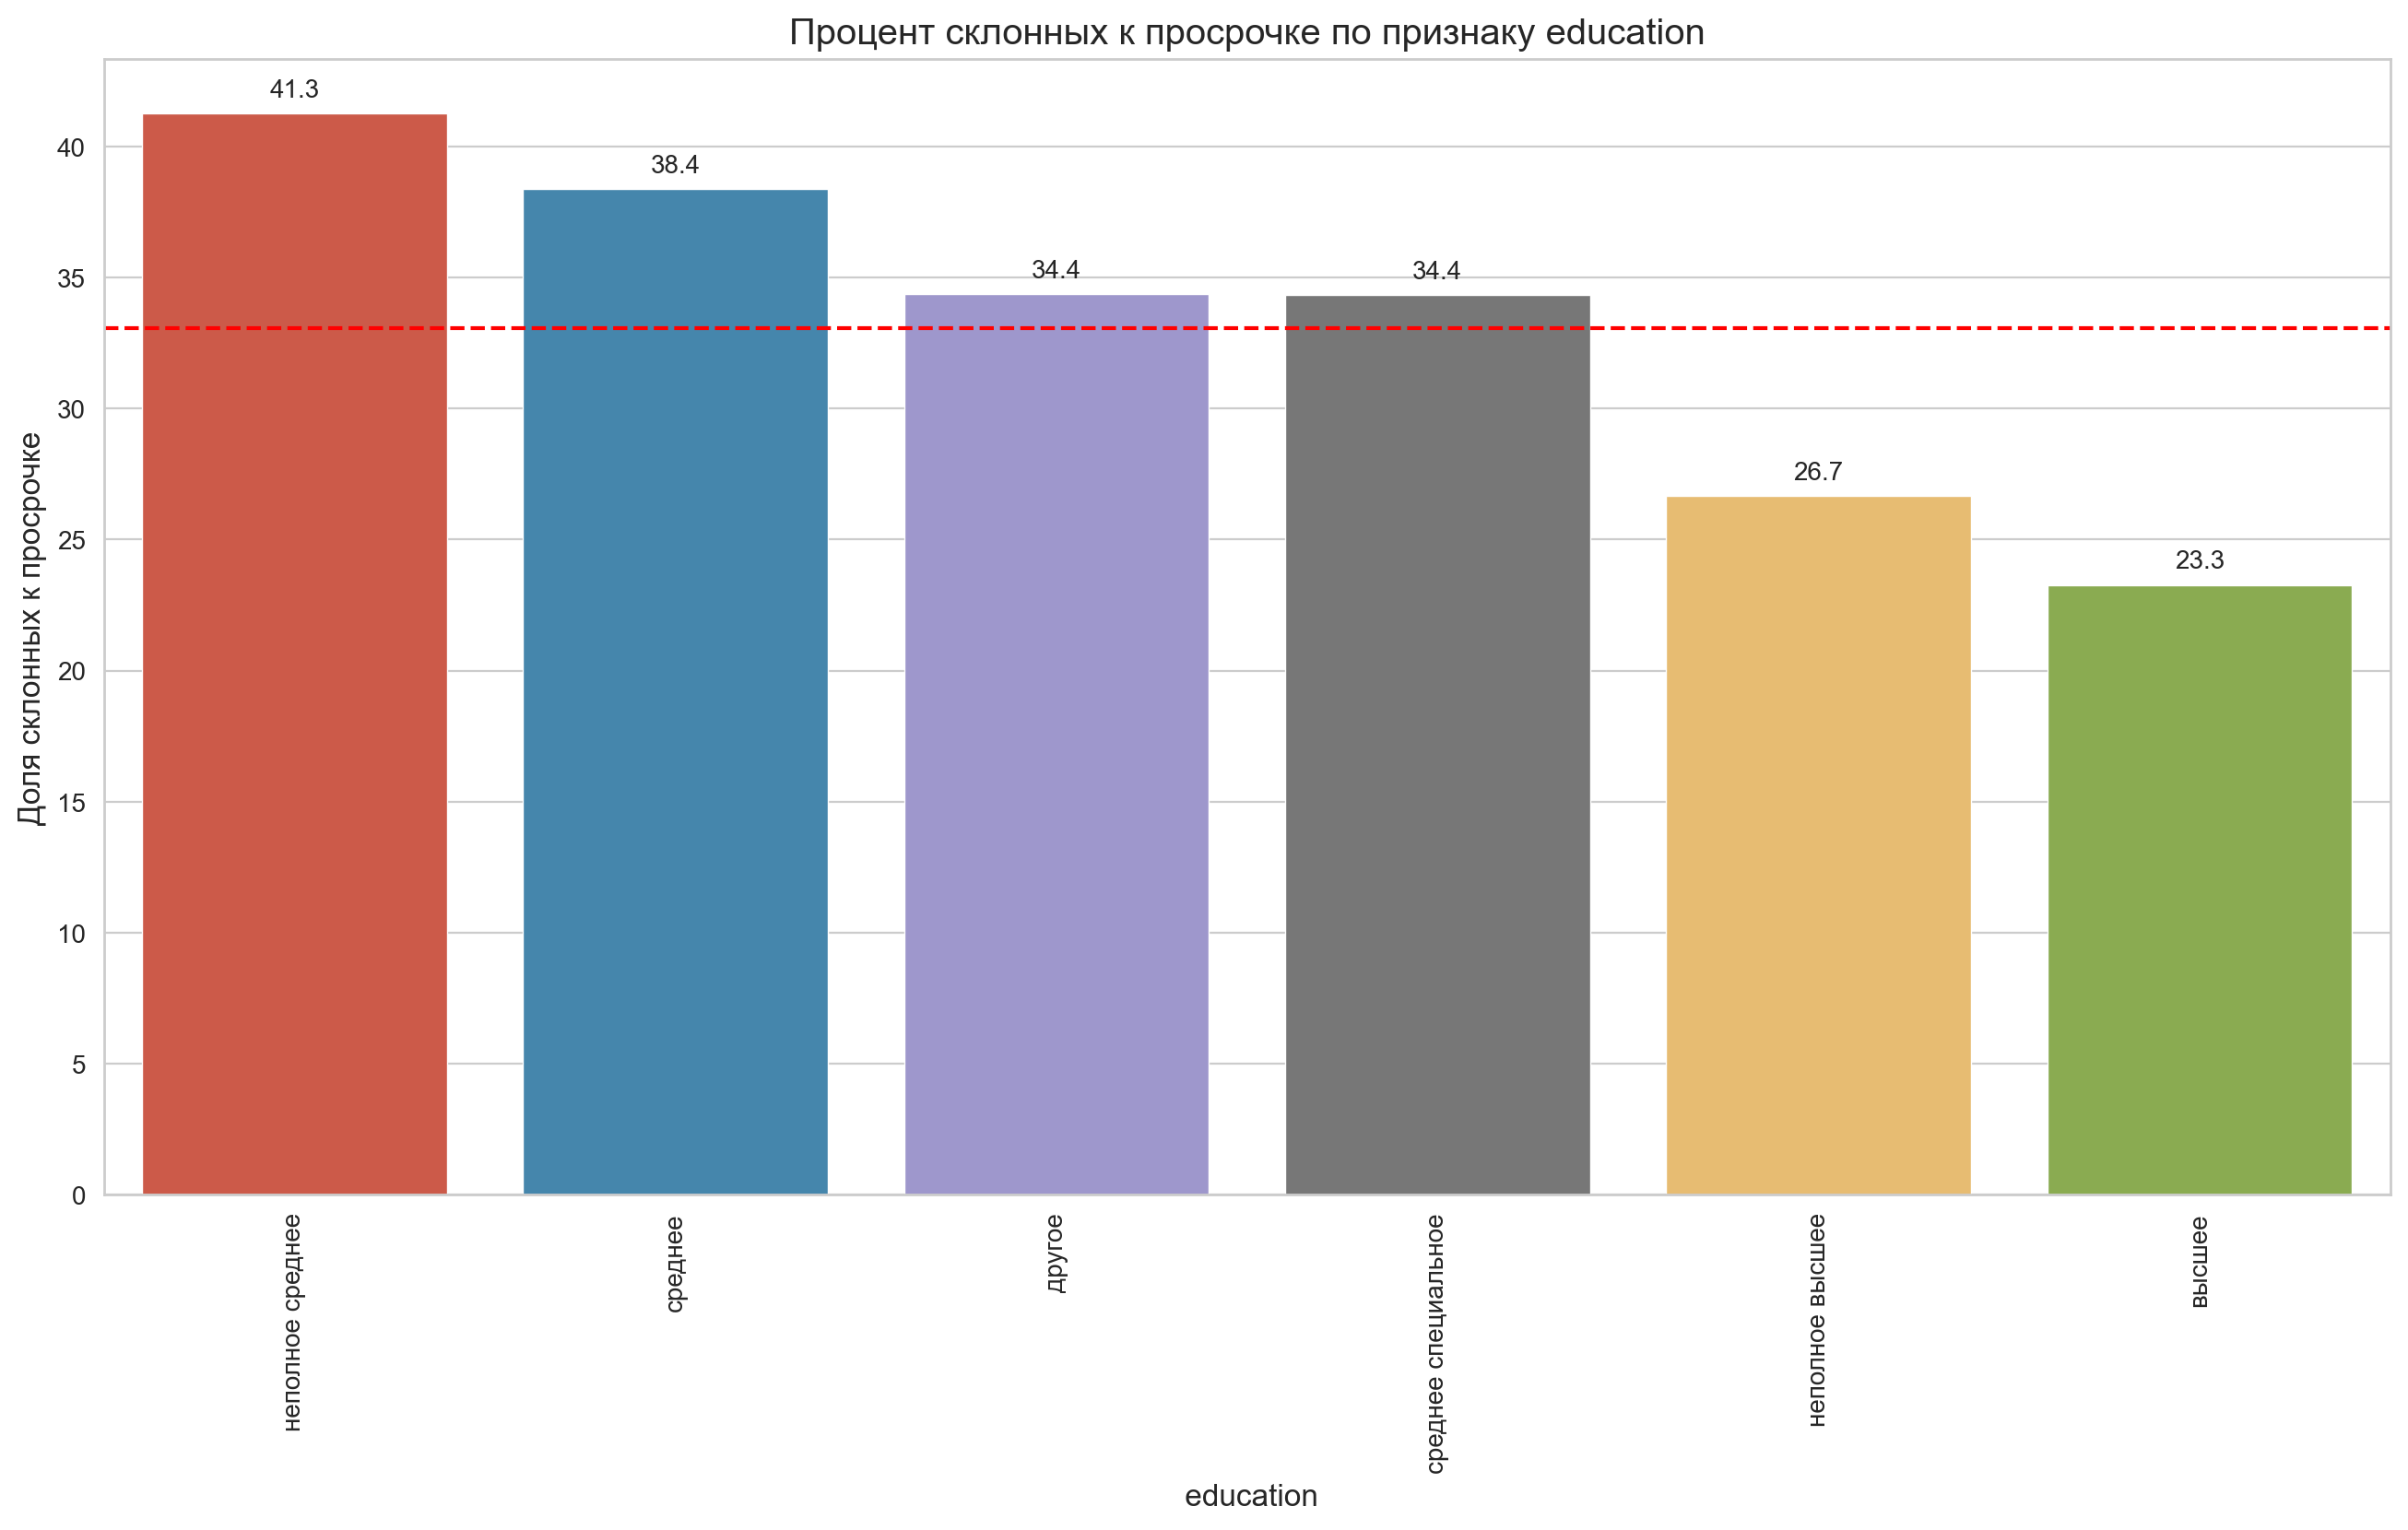

In [49]:
bar_plot(edu,'education')

Мы видим, что  клиенты с неполным среднем образованием менее дисциплинированы, процент просроченных выплат — 41,2%, наиболее дисциплинированы клиенты с высшим образованием, у них процент просрочки всего лишь 23,27%

In [50]:
gender = data.pivot_table(index='gender', values='loan_status', aggfunc=['count','sum'])
gender.columns = gender.columns.droplevel(level=1)
gender['percent']=gender['sum']/gender['count']*100
gender = gender.sort_values( by='percent', ascending = False)
gender['gender']=gender.index
gender

,count,sum,percent,gender
gender,,,,
3,20,14,70.00,3
4,22,14,63.64,4
1,17675,5473,30.96,1
2,18658,5699,30.54,2


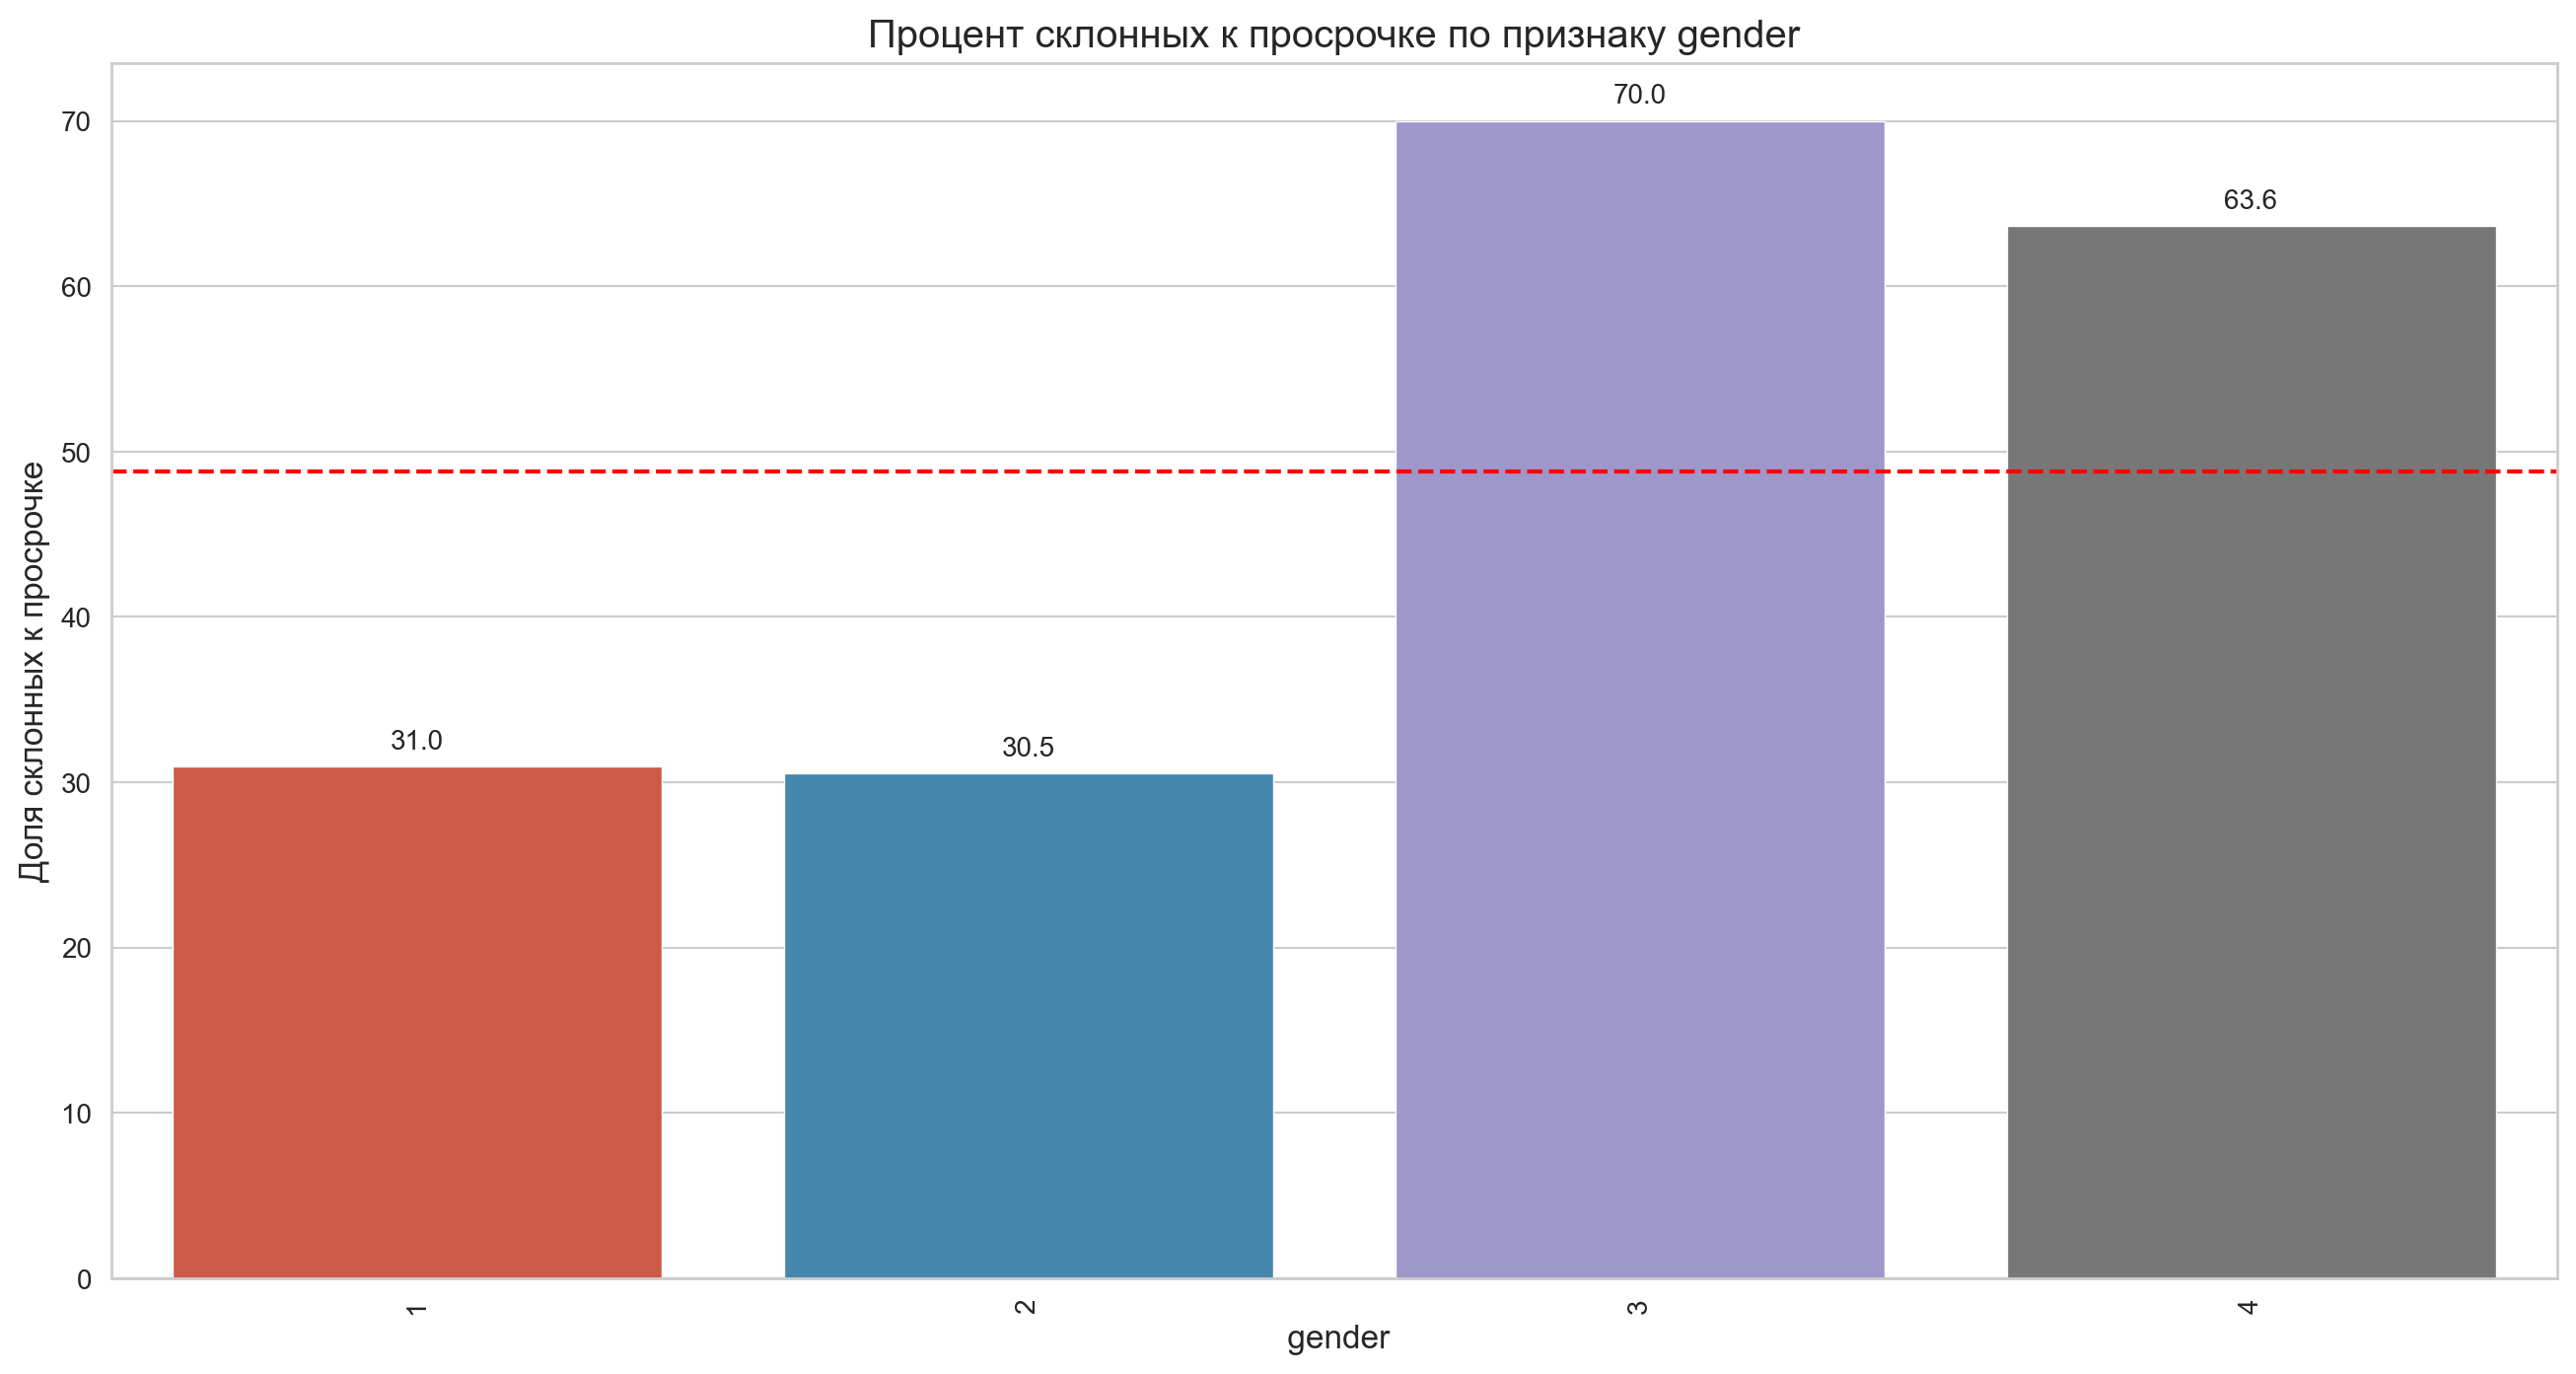

In [51]:
bar_plot(gender,'gender')

In [52]:
gender['gender'].unique()

array([3, 4, 1, 2], dtype=int64)

Сложно прокомментировать, учитывая что пола 2 а унас 4. Скажем так, пол под №3 более склонен к посрочке

In [53]:
loan_purpose = data.pivot_table(index='loan_purpose', values='loan_status', aggfunc=['count','sum'])
loan_purpose.columns = loan_purpose.columns.droplevel(level=1)
loan_purpose['percent']=loan_purpose['sum']/loan_purpose['count']*100
loan_purpose = loan_purpose.sort_values( by='percent', ascending = False)
loan_purpose['loan_purpose']=loan_purpose.index
loan_purpose

,count,sum,percent,loan_purpose
loan_purpose,,,,
покупка бытовой техники и электроники,2382,817,34.30,покупка бытовой техники и электроники
медицинские услуги,3791,1264,33.34,медицинские услуги
другое,5245,1673,31.90,другое
ремонт дома или автомобиля,5606,1773,31.63,ремонт дома или автомобиля
подарки,1937,609,31.44,подарки
бизнес,433,133,30.72,бизнес
ежедневные расходы,2894,856,29.58,ежедневные расходы
"путешествия, отдых",298,87,29.19,"путешествия, отдых"
непредвиденные расходы,12950,3754,28.99,непредвиденные расходы


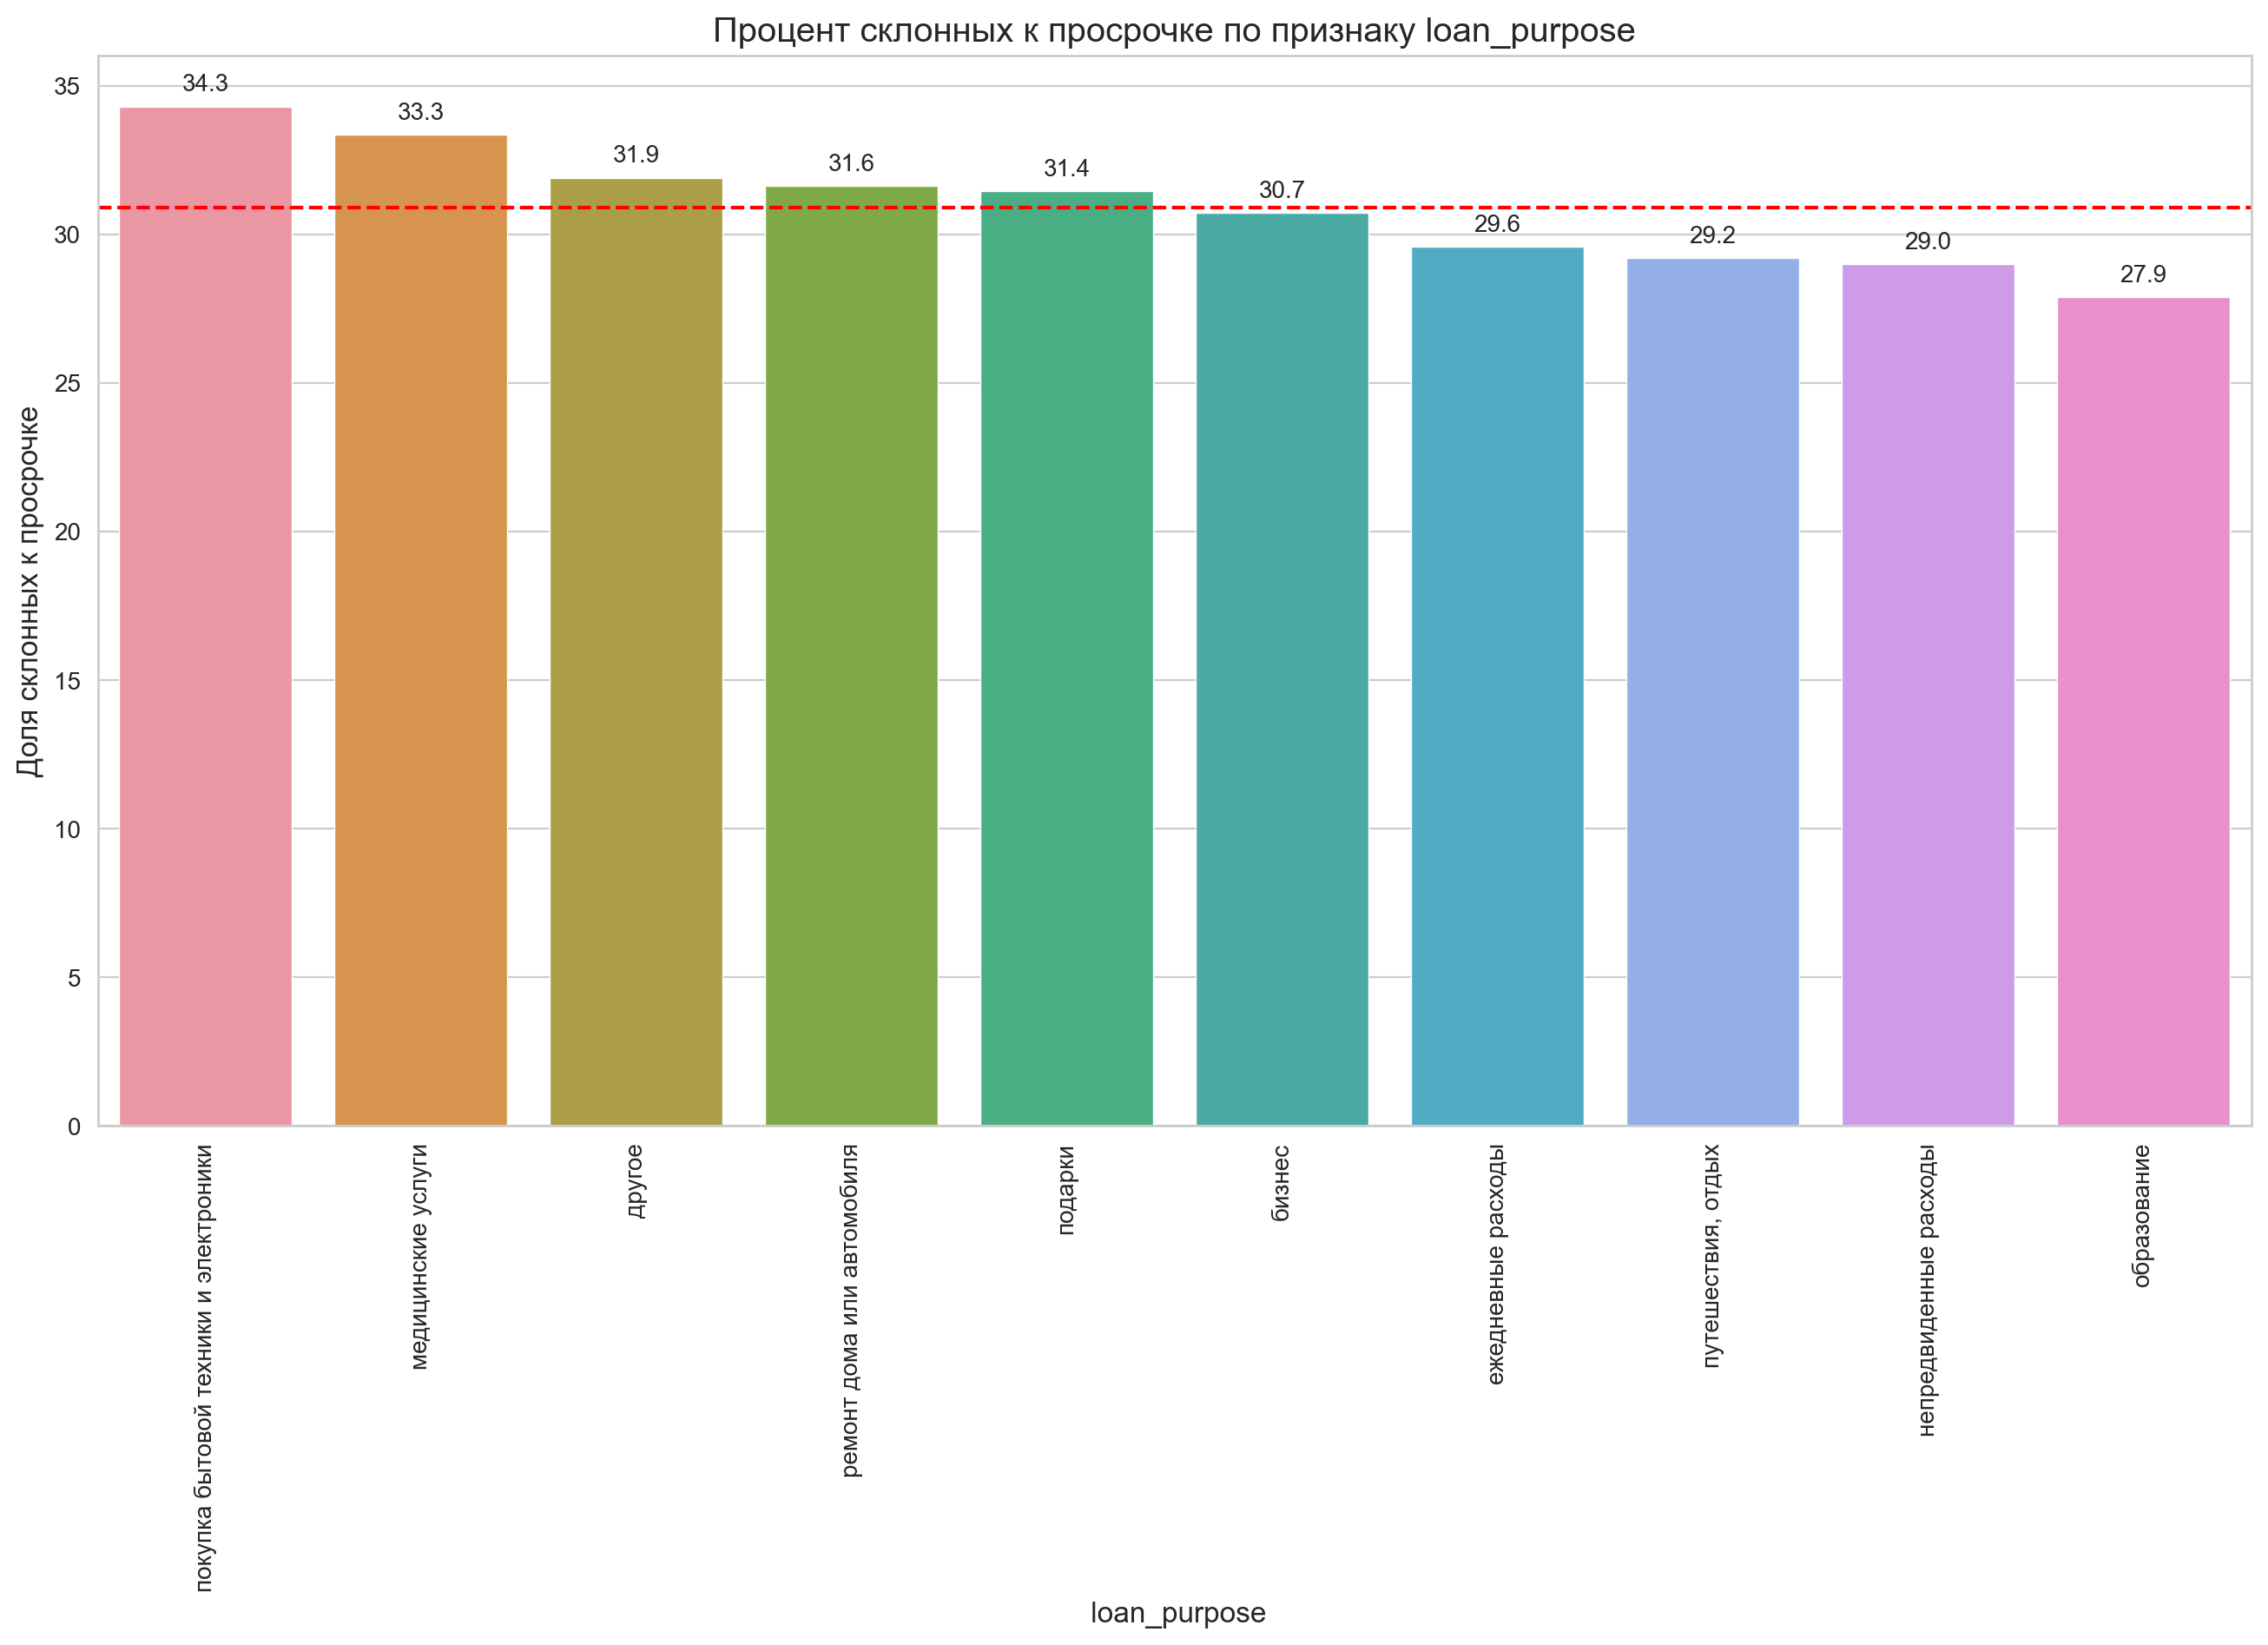

In [54]:
bar_plot(loan_purpose,'loan_purpose')

Больше всего просроченных выплат у клиентов с категориями целей покупка бытовой техники и электроники - 34,3 %,
далее медицинские услуги и на третем месте другое.


In [55]:
post = data.pivot_table(index='post', values='loan_status', aggfunc=['count','sum'])
post.columns = post.columns.droplevel(level=1)
post['percent']=post['sum']/post['count']*100
post = post.sort_values( by='percent', ascending = False)
post['post']=post.index
post

,count,sum,percent,post
post,,,,
главный врач,2,2,100.00,главный врач
рабочий,11845,4355,36.77,рабочий
главный бухгалтер,352,118,33.52,главный бухгалтер
водитель,1581,513,32.45,водитель
руководитель компании,1637,483,29.51,руководитель компании
служащий / специалист,16020,4428,27.64,служащий / специалист
начальник / руководитель,3108,853,27.45,начальник / руководитель
врач,109,29,26.61,врач
фармацевт,81,21,25.93,фармацевт


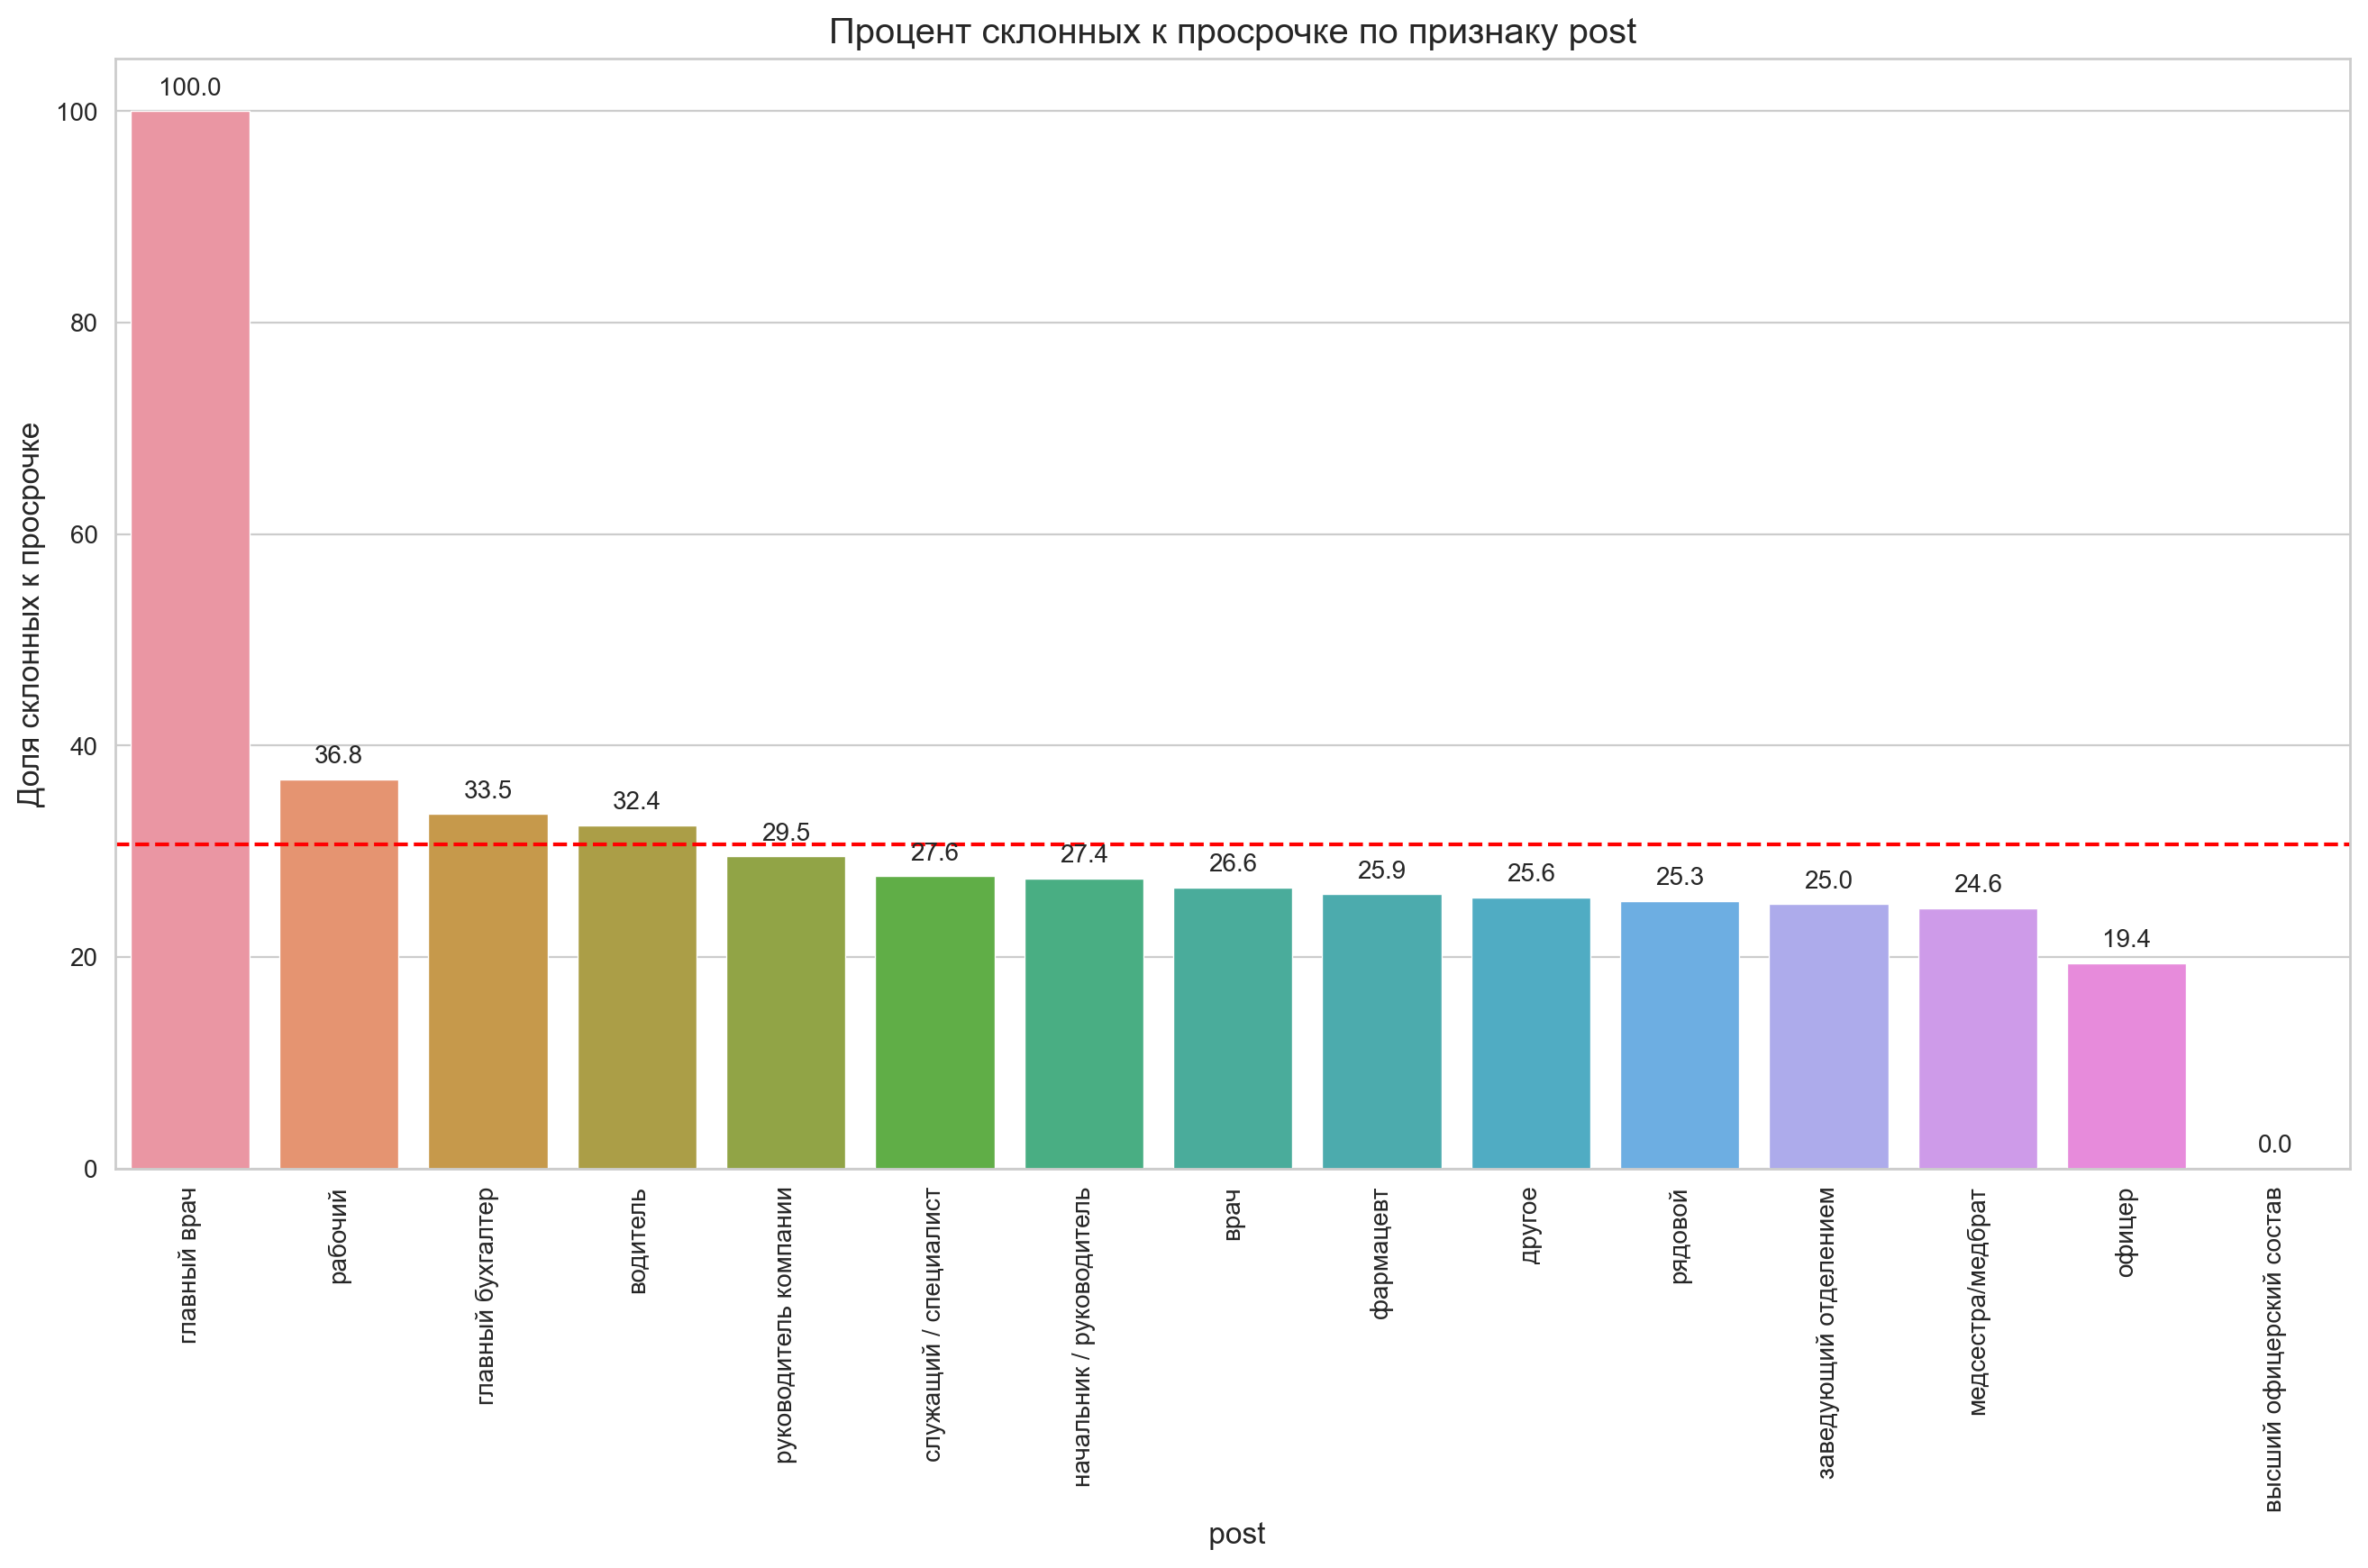

In [56]:
bar_plot(post,'post')

Странным образом 100% просрочка у главных врачей, хотя их всего 2,  скорее всего это аномалия. На втором и третьем месте соответственно рабочий и главный бухгалтер.

Посмотрим корреляцию признаков

In [57]:
data_c= data.copy()

In [58]:
data_c.drop(['draft_id'], axis= 1 , inplace= True )

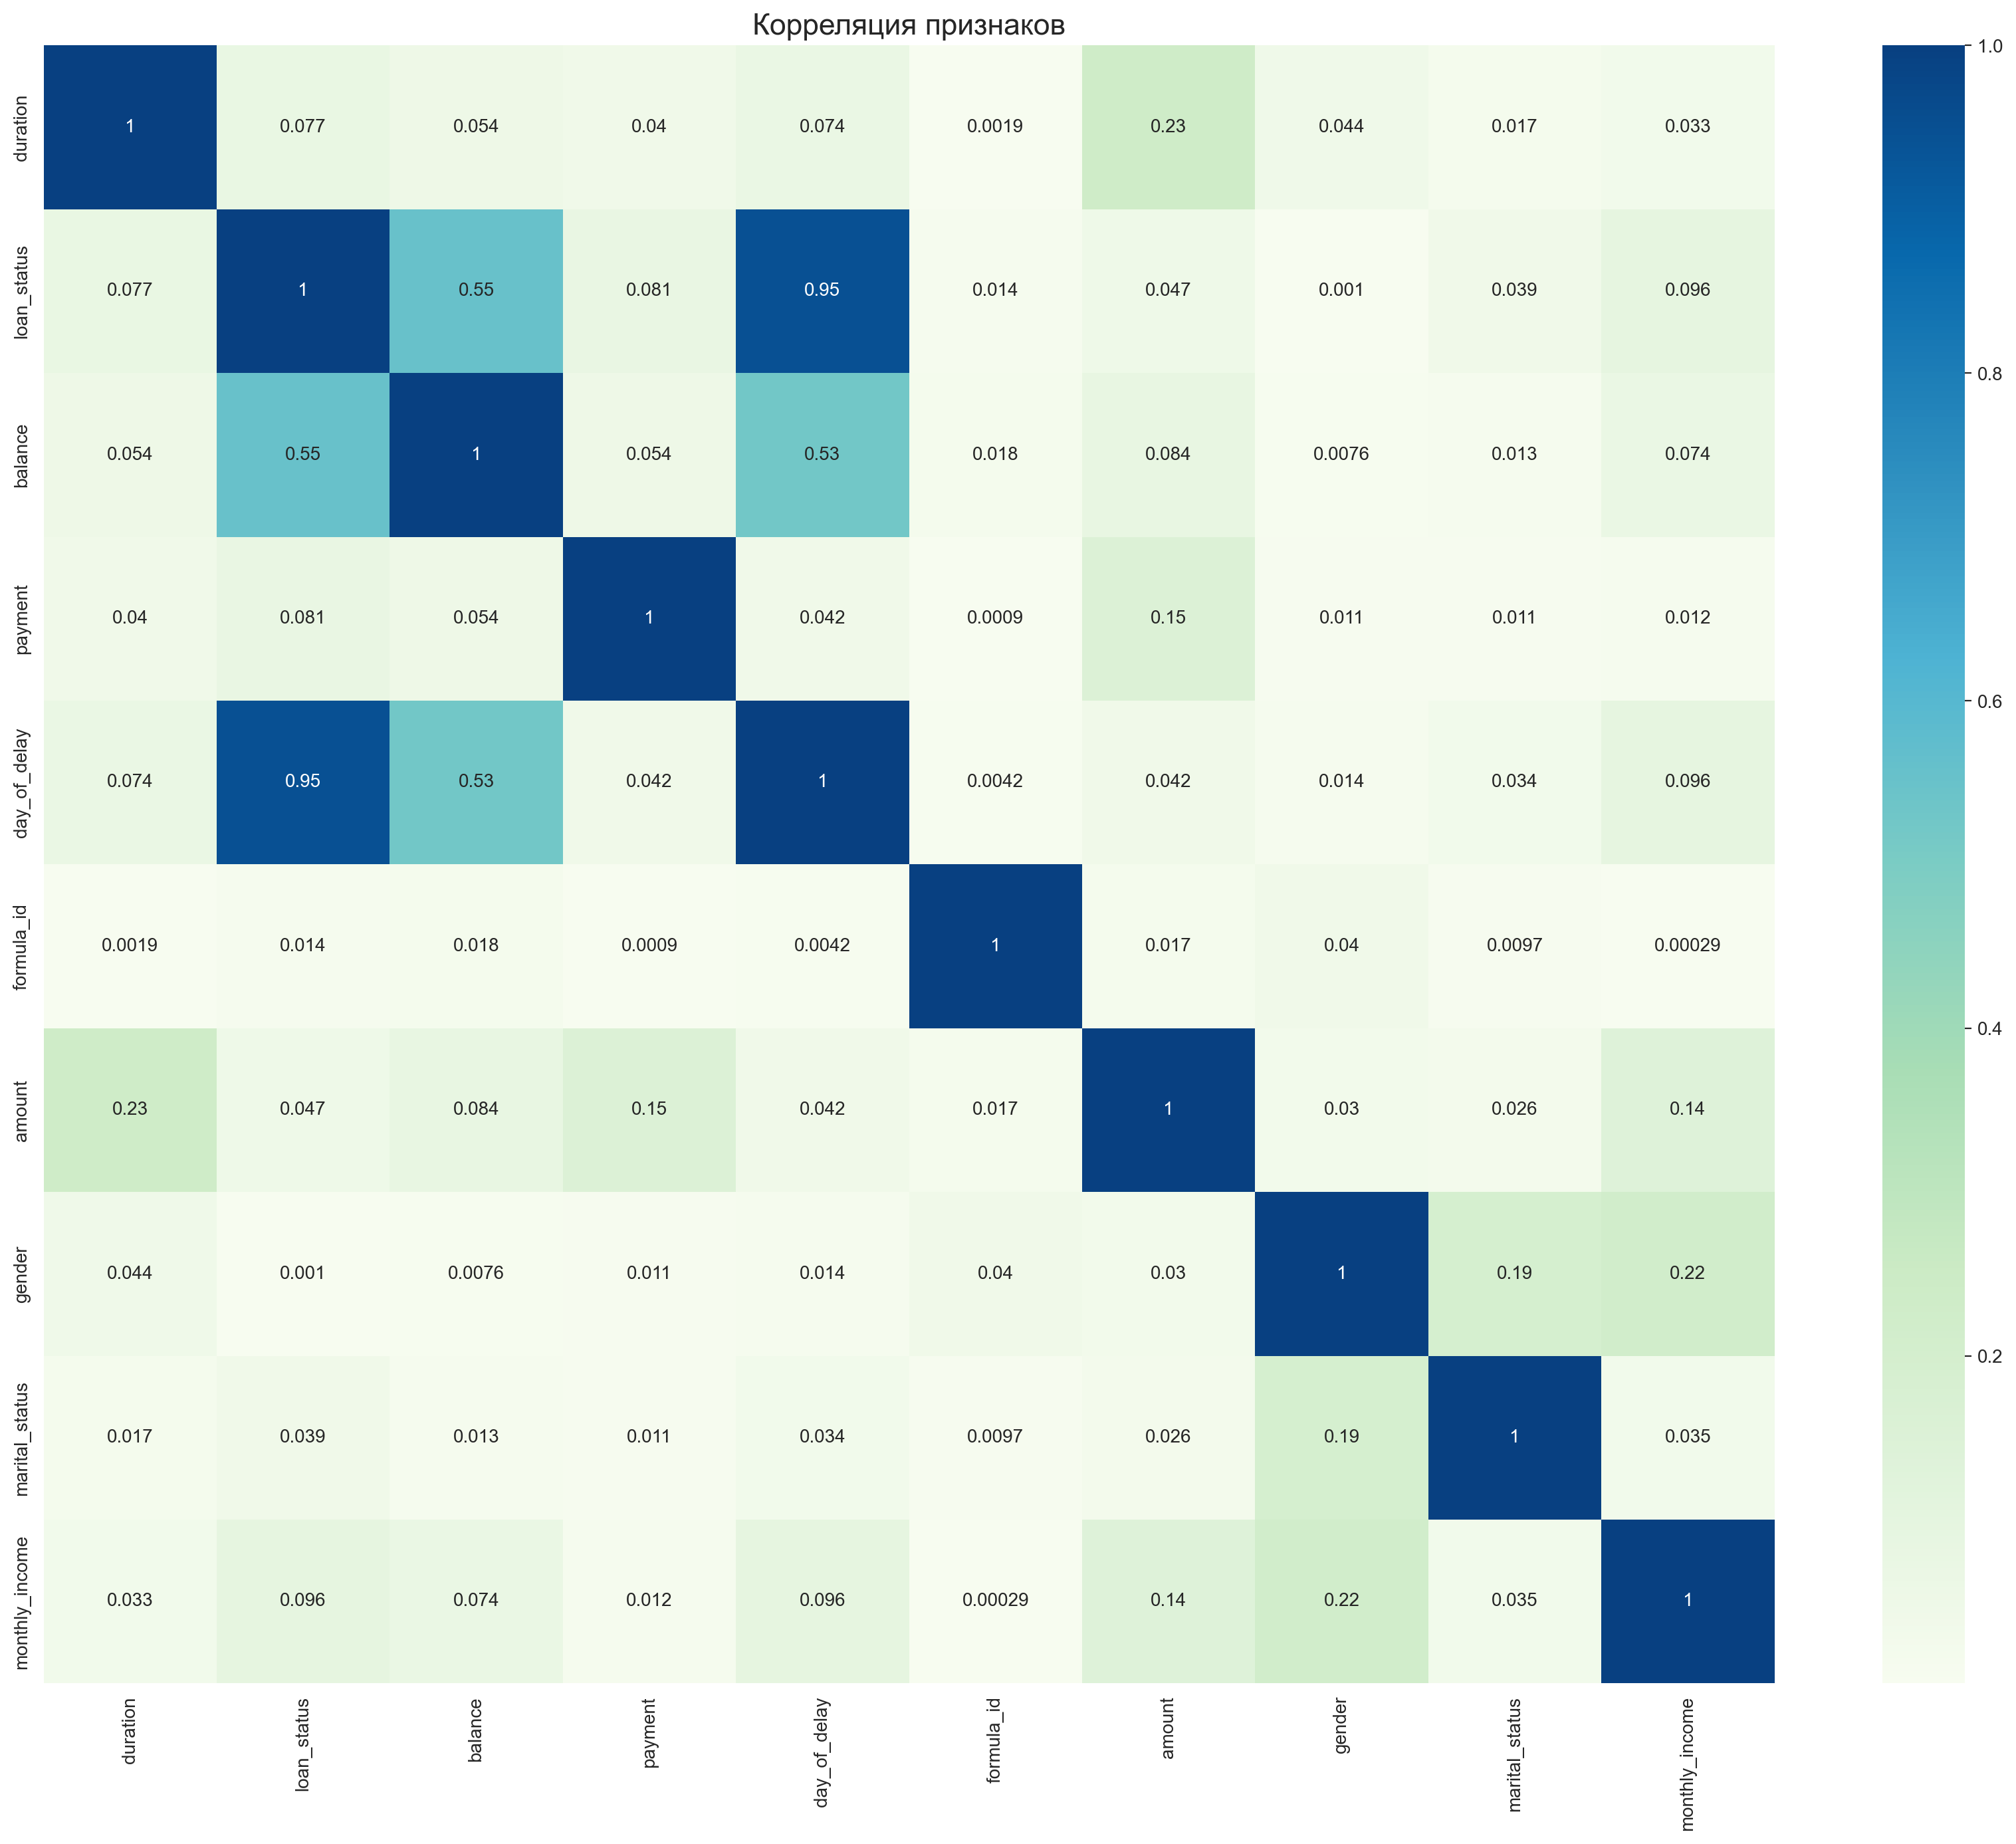

In [59]:
plt.figure(figsize=(21, 16))
fig = sns.heatmap(data_c.corr().abs(), cmap='GnBu', annot=True)
plt.title('Корреляция признаков', fontsize=16)
plt.setp(fig.get_xticklabels(), rotation=90)
plt.show()

Сегментацию пользователей будем проводить на основе машинного обучения. С использованием KMeans а также методом Давида-Болдуина и критерием Калински-Харабаса для определения оптимального количества кластеров в данных, так как они обеспечивают хорошую оценку качества кластеризации.

Метод Давида-Болдуина (DBI) измеряет степень сходства между кластерами в решении кластеризации. Он рассчитывается как среднее сходство каждого кластера с его наиболее похожим кластером. Индекс Давида-Болдуина варьируется от 0 до бесконечности, где низкое значение указывает на лучшее решение кластеризации.

Критерии Калински-Харабаса определяется как отношение между межкластерной дисперсией и общей дисперсией для заданного числа кластеров k. Чем больше это отношение, тем более схожи кластеры.

Возьмем оба этих метода для получения более точного представления о структуре данных. Они позволят выбрать оптимальное количество кластеров, основываясь на их эффективности в разделении данных.

In [60]:
data.head()

,draft_id,issue_date,duration,retire_date,loan_status,balance,payment,day_of_delay,formula_id,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
1,6df8c019-7172-4733-bab1-51d2400e0ec5,2021-05-13,310.00,2021-06-13,1,163201.00,1799.00,3610.00,55,66000,торговля,среднее,2,другое,10,250000,рабочий
2,5963f5ff-3d8b-499c-aafa-7aa9a0e6a98b,2021-05-08,310.00,2021-06-08,1,364518.00,885482.00,3660.00,55,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,0ebf262a-d27f-4d88-bae8-1e09322fb12f,2021-02-03,310.00,2021-03-06,0,0.00,141050.00,860.00,54,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,adc23c19-d21b-4bb5-ad2b-6faccae5a045,2021-02-24,140.00,2021-03-10,0,0.00,68400.00,0.00,54,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист
5,58c07d52-a219-4e0e-b04b-2437b5c10046,2021-02-06,310.00,2021-03-09,0,0.00,78600.00,0.00,55,60000,строительство и недвижимость,среднее специальное,1,непредвиденные расходы,0,600000,рабочий


In [61]:
# Перед тем как приступить к сегментизации сформируем новую таблицу только с выбранными столбцами.
data_segment = data[['amount', 'payment', 'gender', 'monthly_income']]

In [62]:
# Подготовим данные
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_segment)

In [63]:
# Оценим индексы Давида-Болдуина и Калински-Харабаса для различных значений k
best_k = 0
lowest_db = float("Inf")
lowest_ch = float("-Inf")

# Выберем диапазон для k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit_predict(scaled_data)

    db = davies_bouldin_score(scaled_data, model)
    ch = calinski_harabasz_score(scaled_data, model)

    if db < lowest_db and ch > lowest_ch:
        best_k = k
        lowest_db = db
        lowest_ch = ch

print("Подходящее количество кластеров: ", best_k)

Подходящее количество кластеров:  9


In [64]:
# Проведем кластеризацию с импользованием KMeans и разбивкой на 5 кластеров
km = KMeans(n_clusters=8, random_state=42)

labels = km.fit_predict(scaled_data)

In [65]:
# Сохраняем метки кластера в датасете
data['cluster_km'] = labels

# Выведем статистику по средним значениям и медианам
data.groupby('cluster_km').agg({
    'amount': ['median'],
    'payment':['median'],
    'gender': ['count'],
    'monthly_income': ['mean']
}).reset_index()

,cluster_km,amount,payment,gender,monthly_income
,,median,median,count,mean
0,0,65000.00,72600.00,4748,651504.87
1,1,65000.00,68640.00,9242,391650.69
2,2,66000.00,903244.00,710,421536.54
3,3,36000.00,39200.00,2895,389142.07
4,4,65000.00,71280.00,5184,740767.49
5,5,200000.00,201500.00,76,562541.05
6,6,36000.00,38150.00,2673,318900.31
7,7,66000.00,69300.00,10847,324803.16


In [66]:
# Вычислим количество пользователей в каждом кластере
user_counts = data['cluster_km'].value_counts()

# Вычислим количество пользователей, которые просрочили выплаты в каждом кластере
defolt_counts = data[data['loan_status'] == 1]['cluster_km'].value_counts()
# Вычислим долю оттока для каждого кластера
defolt_rates = round((defolt_counts / user_counts) * 100,2)

# Создаем сводную таблицу
final_table = pd.DataFrame({
    'User Count': user_counts,
    'Defolt Count': defolt_counts,
    'percent': defolt_rates
})
final_table.sort_values('percent', ascending=True, inplace=True)
final_table

,User Count,Defolt Count,percent
0,4748,1059,22.30
3,2895,719,24.84
4,5184,1340,25.85
5,76,21,27.63
6,2673,766,28.66
7,10847,3629,33.46
1,9242,3197,34.59
2,710,469,66.06


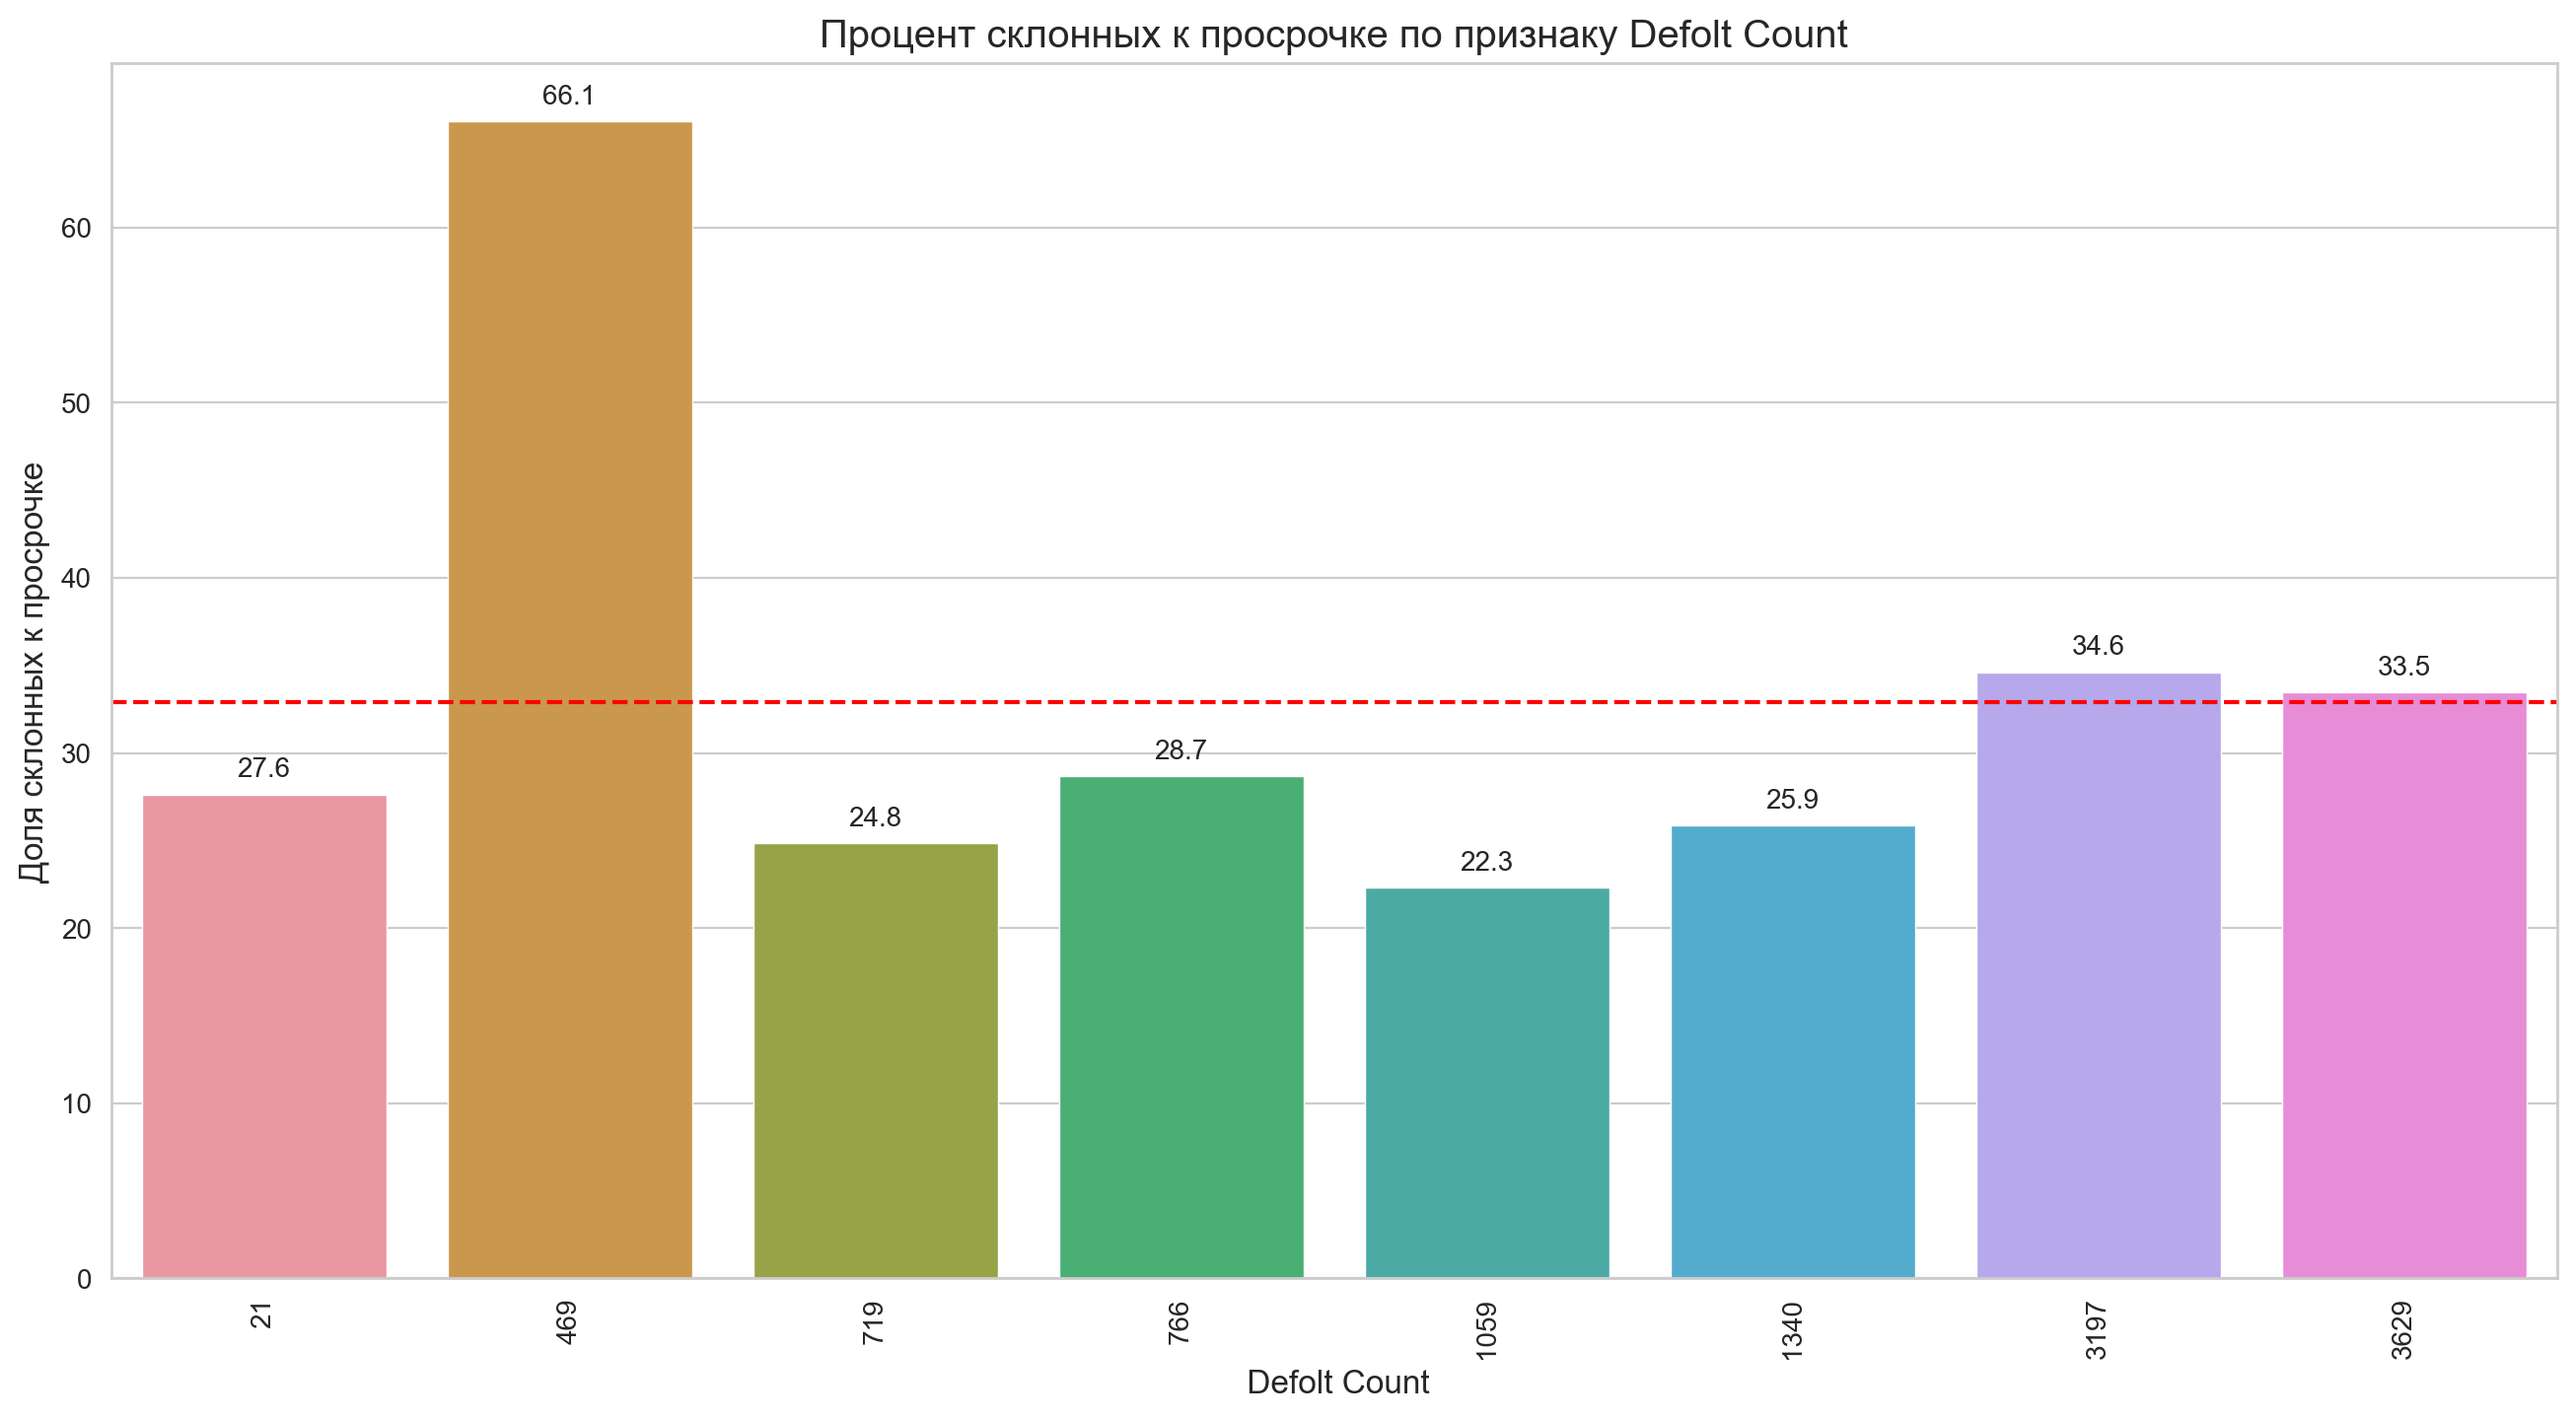

In [67]:
bar_plot(final_table,'Defolt Count')

**Вывод**
При анализе наших признаков мы можем создать портрет идеальных клиентов, где доля оттока будет мене 25%. А именно: 
- клиент с высшим образованием;
- профессия — заведующий отделением, медсестра, офицер;
- тип активности - государственная служба, армия , финансы, банки, страхование, консалтинг, наука и образование , ТЭК;


Также сегментацию пользователей провели на основе машинного обучения. С использованием KMeans а также методом Давида-Болдуина и критерием Калински-Харабаса для определения оптимального количества кластеров в данных, так как они обеспечивают хорошую оценку качества кластеризации.
Метод Давида-Болдуина (DBI) измеряет степень сходства между кластерами в решении кластеризации. Он рассчитывается как среднее сходство каждого кластера с его наиболее похожим кластером. Индекс Давида-Болдуина варьируется от 0 до бесконечности, где низкое значение указывает на лучшее решение кластеризации.
Критерии Калински-Харабаса определяется как отношение между межкластерной дисперсией и общей дисперсией для заданного числа кластеров k. Чем больше это отношение, тем более схожи кластеры.
Взяли оба этих метода для получения более точного представления о структуре данных. Они позволят выбрать оптимальное количество кластеров, основываясь на их эффективности в разделении данных.

Для получения сегментов мы выбрали такие критерии как:
- пол,
- сумма займа, которую выдали клиенту,
- сумма всех выплат по займу,
- ежемесячный доход клиента.

 С помощью вышеуказанного метода мы получили 7 сегментов , но в конечном итоге у нас остался только один который удовлетворил условию задания. Это сегмент, где:
- общее количество клиентов — 4780
- количество дефолтных клиентов — 1077
- в процентном соотношении — 22,5%
- медианная сумма займа в сегменте — 65000.00
- медианная сумма всех выплат по займу - 72600.00 
- средний ежемесячный доход клиента - 650781.40 .

## Подготовка данных<a name="preprocessing"></a>

Подготовим датасет для обучения модели убрав ненужные признаки.

In [68]:
data_c.head()

,issue_date,duration,retire_date,loan_status,balance,payment,day_of_delay,formula_id,amount,activity_type,education,gender,loan_purpose,marital_status,monthly_income,post
1,2021-05-13,310.00,2021-06-13,1,163201.00,1799.00,3610.00,55,66000,торговля,среднее,2,другое,10,250000,рабочий
2,2021-05-08,310.00,2021-06-08,1,364518.00,885482.00,3660.00,55,50000,сервис и услуги,высшее,2,другое,0,300000,рабочий
3,2021-02-03,310.00,2021-03-06,0,0.00,141050.00,860.00,54,65000,торговля,среднее специальное,2,покупка бытовой техники и электроники,10,450000,начальник / руководитель
4,2021-02-24,140.00,2021-03-10,0,0.00,68400.00,0.00,54,60000,сервис и услуги,среднее специальное,2,непредвиденные расходы,0,350000,служащий / специалист
5,2021-02-06,310.00,2021-03-09,0,0.00,78600.00,0.00,55,60000,строительство и недвижимость,среднее специальное,1,непредвиденные расходы,0,600000,рабочий


In [69]:
data_c.drop(['issue_date', 'duration', 'retire_date', 'formula_id'], axis= 1 , inplace= True)

In [70]:
data_c.columns

Index(['loan_status', 'balance', 'payment', 'day_of_delay', 'amount',
       'activity_type', 'education', 'gender', 'loan_purpose',
       'marital_status', 'monthly_income', 'post'],
      dtype='object')

In [71]:
RANDOM_STATE = 100
TEST_SIZE = 0.25

In [72]:
X = data_c.drop('loan_status', axis=1)
y = data_c['loan_status']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

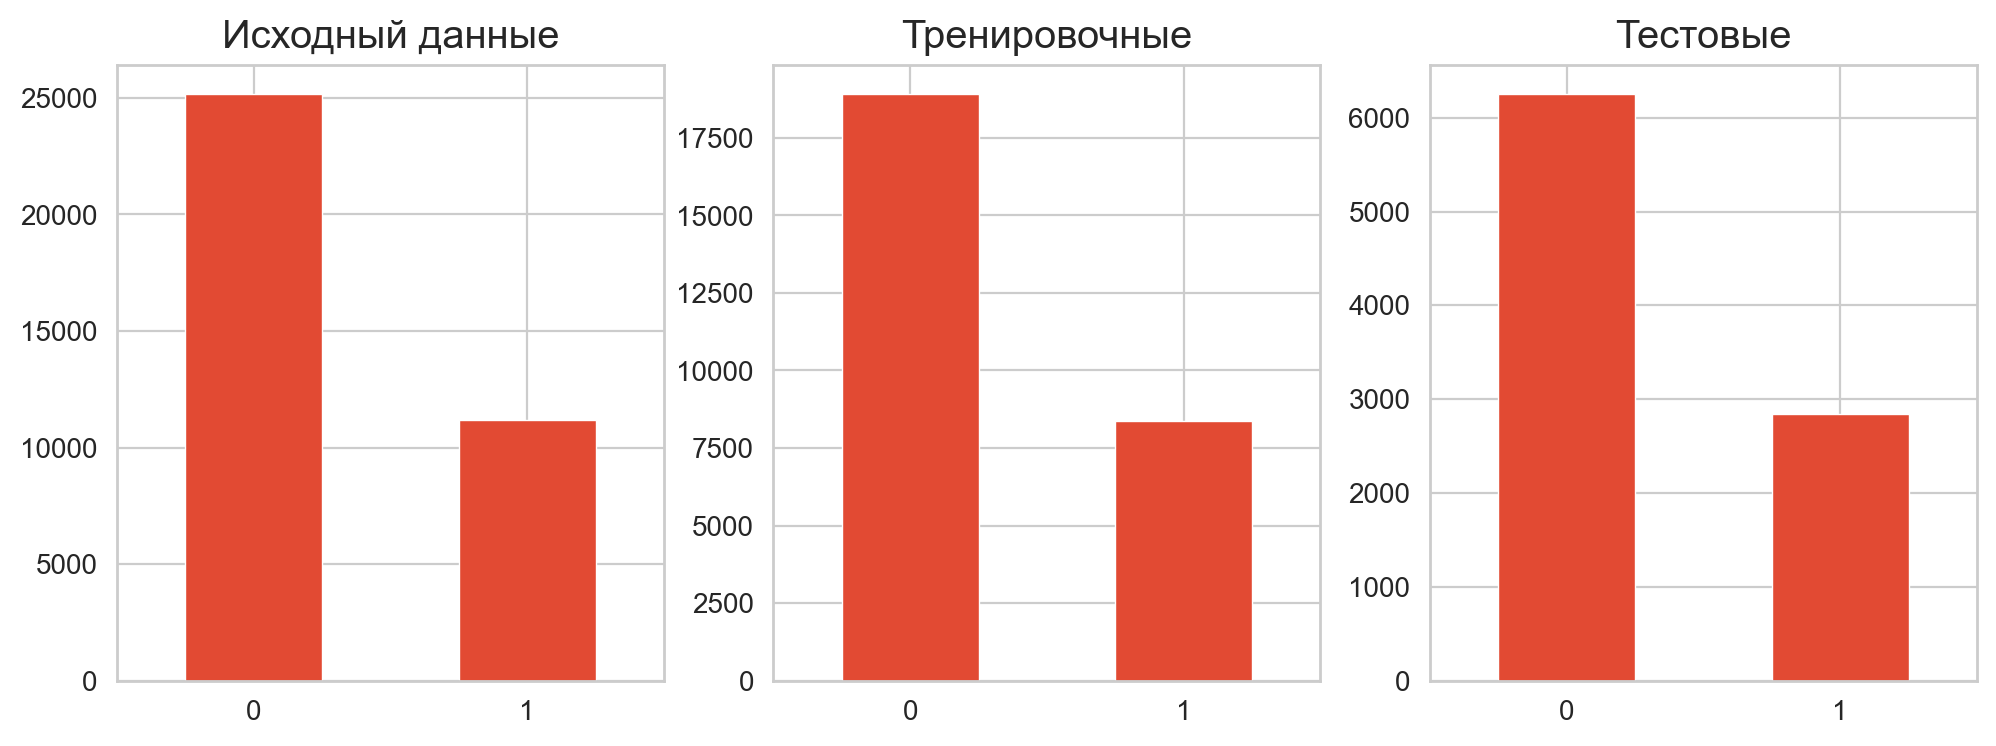

In [73]:
# визуализируем баланс целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходный данные")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Тренировочные")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Тестовые")
plt.show()

In [74]:
cat_col=[ 'activity_type', 'education', 'gender', 'loan_purpose', 'marital_status', 'post' ]
num_col=['balance', 'payment', 'day_of_delay', 'amount','monthly_income'] 


#категориальные
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col])
X_test_ohe = encoder.transform(X_test[cat_col])

encoder_col_names = encoder.get_feature_names_out()


In [75]:
#количественные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col])
X_test_scaled = scaler.transform(X_test[num_col])
#соединяем
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

## Обучение моделей машинного обучения<a name="learning"></a>

**LogisticRegression**

In [76]:
# обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)


print('accuracy: ',round(acc ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.999
recall:  0.998
precision:  0.998


**KNeighborsClassifier**

ROC-AUC =  1.0


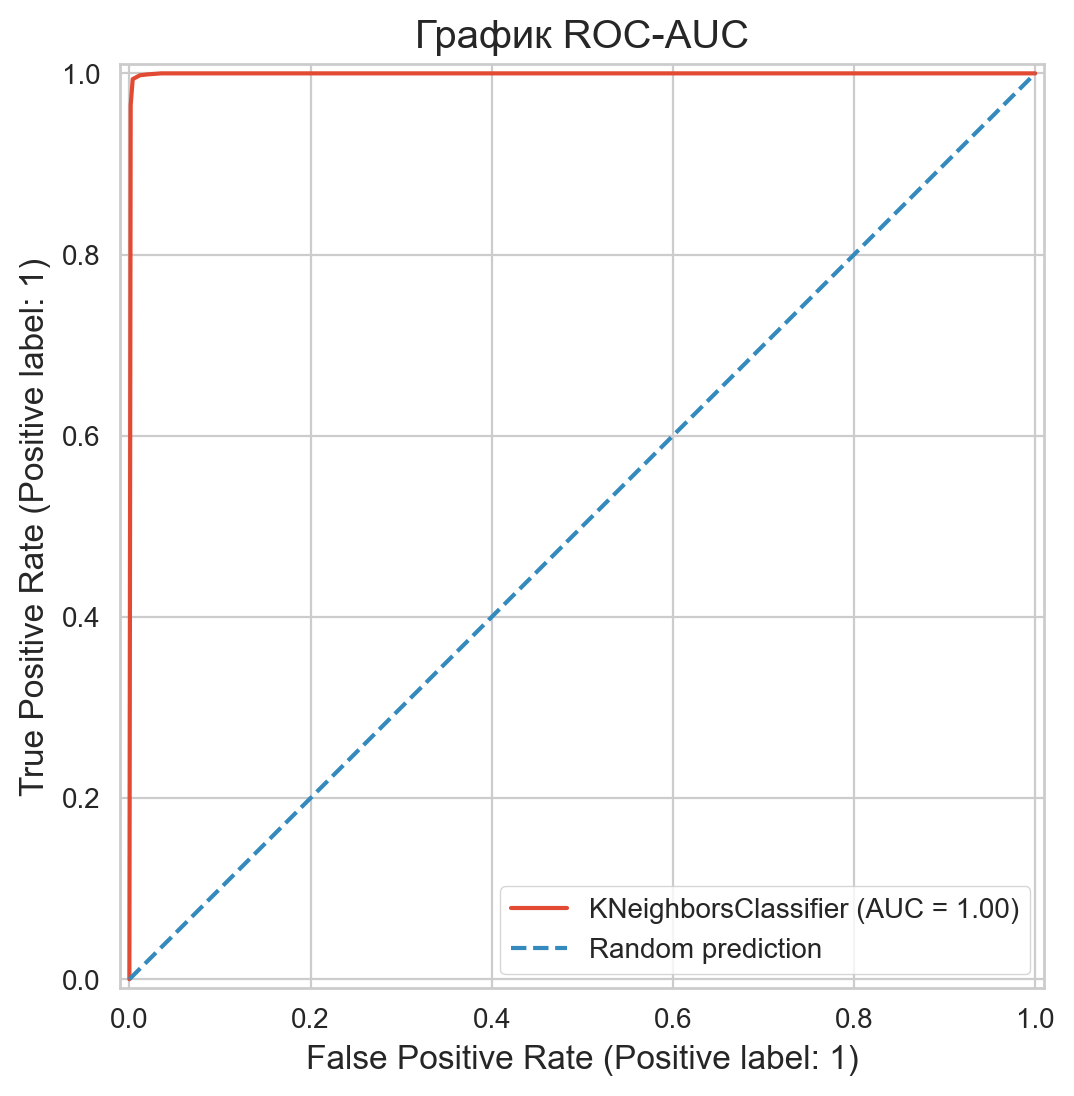

In [77]:
# создаём и обучаем модель kNN на тренировочных данных
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# получите оценки вероятностей на тестовой выборке
preds = model.predict(X_test)
y_pred_proba= model.predict_proba(X_test)[::,1]
# вычислите метрику ROC-AUC и выведите её на экран командой print()

roc_auc = roc_auc_score(y_test,y_pred_proba )
print('ROC-AUC = ', roc_auc.round(2))

# выведите на экран ROC-кривую методом from_estimator()
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

In [78]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float64)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [79]:
gini_predictions = gini(y_test, y_pred)
gini_max = gini(y_test, y_pred)
ngini= gini_normalized(y_test, y_pred)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.343, Max. Gini: 0.343, Normalized Gini: 0.997


**Выводы**

Мы провели  обучение наших моделей -LogisticRegression и KneighborsClassifier.
1. Для  LogisticRegression получили следующие результаты по  метрикам:
 -  accuracy:  0.999
 - recall:  0.998
 - precision:  0.998.

Что свидетельствует о высоком качестве модели. 

2. Для  KneighborsClassifier получили следующие результаты по  метрикам:
- Метрика ROC-AUC =  1.0

- Коэффициент Джини применяется для оценки моделей во многих сферах, в том числе в задачах банковского кредитования, страхования и целевом маркетинге.
Названный в честь итальянского статистика Коррадо Джини , коэффициент Джини — это способ измерения распределения доходов населения.
Значение коэффициента Джини варьируется от 0 до 1, где более высокие значения представляют большее неравенство в доходах и где:
    • 0 представляет идеальное равенство доходов (все имеют одинаковый доход)
    • 1 представляет собой идеальное неравенство доходов (все доходы принадлежат одному человеку).

Gini: 0.343, Max. Gini: 0.343, Normalized Gini: 0.997

## ОБЩИЕ ВЫВОДЫ <a name="resumefinal"></a>


Нам предоставлены данные по первичным клиентам за первую половину 21-го года.

Данные представлены в трёх таблицах:

1. Anket:

- DraftId – уникальный индентификатор заявки

- formula_id – номер модели, которая скорила заявку

- flagFC – флаг наличия ответа от партнера1

- flagEF– флаг наличия ответа от партнера2

- flagCKB– флаг наличия ответа от партнера3

- Amount – сумма займа, которую выдали клиенту

- ActivityType – вид деятельности

- Education – образование

- Gender – пол

- LoanPurpose – цель займа

- MaritalStatus – семейное положение

- MonthlyIncome – ежемесячный доход клиента

- Post – занимаемая должность

 

2. Payments:

- DraftId – уникальный индентификатор заявки

- ApprovalCreateTime – время, когда заявка была подана

- ApprovalAmount – одобренная сумма займа

- RequestAmount – запрашиваемая сумма займа

- FormulaId - номер модели, которая скорила заявку

- Answer – ответ по скорингу

- LoanAmount – сумма выданного займа

- IssueDate – дата выдачи займа

- Duration – количество дней на сколько выдан займ

- RetireDate – дата погашения по договору

- RealRetireDate – реальная дата погашения

- LoanStatus – статус займа

- Balance – сумма задолженность по займу

- Payment – сумма всех выплат по займу

- DayOfDelay – количество дней просрочки по займу

- Amount00 – сумма, выплаченная клиентом до нулевого дня просрочки

- Amount15 – сумма, выплаченная клиентом между 0 и 15 днем просрочки

- Amount30 – сумма, выплаченная клиентом между 15 и 30 днем просрочки


3. Данные в таблице ML являются признаками из кредитной истории клиента, которые помогут при построении модель

Мы загрузили датасеты, переименовали столбцы по правилам PEP8, удалили неизвестную колонку. Размер датасета: (182007, 22) . 

Далее провели поверхностный анализ датасетов. Предварительные выводы следующие:
1. Анализ Anket:
- были два явных дубликата, мы их удалили;
- незначительное число пропусков в activity_type и post , пока их оставим;
- в столбце monthly_income были выбросы, мы их удалили.

2. Анализ Payments:
- Оставили в датасете значения loan_amount больше ноля - только клиентов которые получили займ. 
- В датасете 6 колонок с пропусками где количество пропусков превышает 90%, они являются мало информативными для нашего исследования, удалим их

После объединения датасета -  удалили ненужные и дублирующие признаки. Также удалили пропуски. В конечном итоге у нас остался датасет размера: (36377, 17) 

Провели исследовательский анализ объединенного датасета и удалили явные выбросы.

- После анализа количественных признаков мы видим что в основном склонны к просрочке:
- клиенты с доходом меньше 400000,
- с суммой займа от 50 000 до 60 000 и 80000,

- Процент просроченных выплат по типам активности выглядит следующим образом:
- - в строительстве и недвижимости больше всего просроченных выплат — 35,4 %
- - далее идут охранная деятельность  - 34,8 %, торговля — 33,72% и промышленность 33,70%

- Клиенты с неполным среднем образованием менее дисциплинированы, процент просроченных выплат — 41,2%, наиболее дисциплинированы клиенты с высшим образованием, у них процент просрочки всего лишь 23,27% 

- Признак пол сложно прокомментировать, учитывая что пола 2 а унас 4. Скажем так, пол под №3 более склонен к посрочке 

- По целям кредита, больше всего просроченных выплат у клиентов с категориями целей покупка бытовой техники и электроники - 34,3 %, далее медицинские услуги и на третем месте другое.

- По занятости: странным образом 100% просрочка у главных врачей, хотя их всего 2, скорее всего это аномалия. На втором и третьем месте соответственно рабочий и главный бухгалтер. 

Можем создать портрет идеальных клиентов, где доля оттока будет мене 25%. А именно: 
- клиент с высшим образованием;
- профессия — заведующий отделением, медсестра, офицер;
- тип активности - государственная служба, армия , финансы, банки, страхование, консалтинг, наука и образование , ТЭК;


Также сегментацию пользователей провели на основе машинного обучения. С использованием KMeans а также методом Давида-Болдуина и критерием Калински-Харабаса для определения оптимального количества кластеров в данных, так как они обеспечивают хорошую оценку качества кластеризации.
Метод Давида-Болдуина (DBI) измеряет степень сходства между кластерами в решении кластеризации. Он рассчитывается как среднее сходство каждого кластера с его наиболее похожим кластером. Индекс Давида-Болдуина варьируется от 0 до бесконечности, где низкое значение указывает на лучшее решение кластеризации.
Критерии Калински-Харабаса определяется как отношение между межкластерной дисперсией и общей дисперсией для заданного числа кластеров k. Чем больше это отношение, тем более схожи кластеры.
Взяли оба этих метода для получения более точного представления о структуре данных. Они позволят выбрать оптимальное количество кластеров, основываясь на их эффективности в разделении данных.

Для получения сегментов мы выбрали такие критерии как:
- пол,
- сумма займа, которую выдали клиенту,
- сумма всех выплат по займу,
- ежемесячный доход клиента.

 С помощью вышеуказанного метода мы получили 8 сегментов , но в конечном итоге у нас остался только один который удовлетворил условию задания. Это сегмент, где:
- общее количество клиентов — 4748
- количество дефолтных клиентов — 1077
- в процентном соотношении — 22,3%
- медианная сумма займа в сегменте — 65000.00
- медианная сумма всех выплат по займу - 72600.00 
- средний ежемесячный доход клиента - 651504.87 .


Далее провели  обучение наших моделей -LogisticRegression и KneighborsClassifier.
1. Для  LogisticRegression получили следующие результаты по  метрикам:
 -  accuracy:  0.999
 - recall:  0.998
 - precision:  0.998.

Что свидетельствует о высоком качестве модели. 

2. Для  KneighborsClassifier получили следующие результаты по  метрикам:
- Метрика ROC-AUC =  1.0

- Коэффициент Джини применяется для оценки моделей во многих сферах, в том числе в задачах банковского кредитования, страхования и целевом маркетинге.
Названный в честь итальянского статистика Коррадо Джини , коэффициент Джини — это способ измерения распределения доходов населения.
Значение коэффициента Джини варьируется от 0 до 1, где более высокие значения представляют большее неравенство в доходах и где:
    • 0 представляет идеальное равенство доходов (все имеют одинаковый доход)
    • 1 представляет собой идеальное неравенство доходов (все доходы принадлежат одному человеку).

Gini: 0.343, Max. Gini: 0.343, Normalized Gini: 0.997




При проведенном анализе возникало определенное количество вопросов, которые помогли улучшить качество модели, хоть она и показывает как на трейне так и на тестовой выборке хорошие результаты. 